In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import fastf1
import fastf1.plotting
import math
from datetime import timedelta
import matplotlib as mpl

from matplotlib.collections import LineCollection
from adjustText import adjust_text

import geopandas as gpd

fastf1.plotting.setup_mpl()

In [2]:
def getDuration(x):
    min=x.min()
    max=x.max()
    return max-min

import math
def rotate_matrix (x, y, angle, x_shift=0, y_shift=0, units="DEGREES"):
    """
    Rotates a point in the xy-plane counterclockwise through an angle about the origin
    https://en.wikipedia.org/wiki/Rotation_matrix
    :param x: x coordinate
    :param y: y coordinate
    :param x_shift: x-axis shift from origin (0, 0)
    :param y_shift: y-axis shift from origin (0, 0)
    :param angle: The rotation angle in degrees
    :param units: DEGREES (default) or RADIANS
    :return: Tuple of rotated x and y
    """

    # Shift to origin (0,0)
    x = x - x_shift
    y = y - y_shift

    # Convert degrees to radians
    if units == "DEGREES":
        angle = math.radians(angle)

    # Rotation matrix multiplication to get rotated x & y
    xr = (x * math.cos(angle)) - (y * math.sin(angle)) + x_shift
    yr = (x * math.sin(angle)) + (y * math.cos(angle)) + y_shift

    return xr, yr
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

In [2]:
schedule = fastf1.get_event_schedule(2021)

req         WARNING 	DEFAULT CACHE ENABLED! (421.61 MB) C:\Users\haryo\AppData\Local\Temp\fastf1


In [3]:
import matplotlib as mpl
year = 2021
wknd = 9
ses = 'R'
driver = 'RIC'
colormap = mpl.cm.plasma

In [4]:
session = fastf1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [5]:
import numpy as np
#Now, we create a set of line segments so that we can color them individually. This creates the points as a N x 1 x 2 array so that we can stack points together easily to get the segments. The segments array for line collection needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

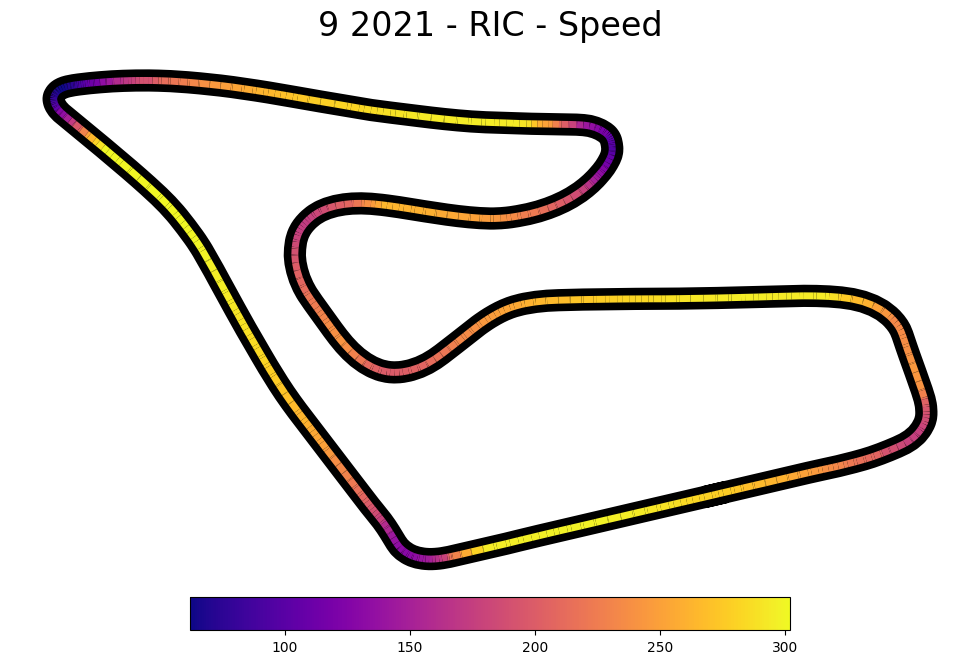

In [27]:
from matplotlib.collections import LineCollection
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = mpl.colors.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])

legend = mpl.colorbar.ColorbarBase(cbaxes, norm=norm, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

start coding myself

In [2]:
aus_2024=fastf1.get_session(2024,'australia','r')
aus_2024.load()
circuit_info = aus_2024.get_circuit_info()

req         WARNING 	DEFAULT CACHE ENABLED! (137.1 MB) /Users/nendra/Library/Caches/fastf1
core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '2

In [20]:
alo_lap=pd.DataFrame()
rus_lap=pd.DataFrame()
for i in range(50,58):
    alo_lap_s=aus_2024.laps.pick_driver('ALO').pick_lap(i).get_telemetry()
    rus_lap_s=aus_2024.laps.pick_driver('RUS').pick_lap(i).get_telemetry()
    alo_lap_s['lapNumber']=i
    rus_lap_s['lapNumber']=i
    alo_lap=pd.concat([alo_lap,alo_lap_s])
    rus_lap=pd.concat([rus_lap,rus_lap_s])
#simplify, ambil dari method pick drivers aja

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

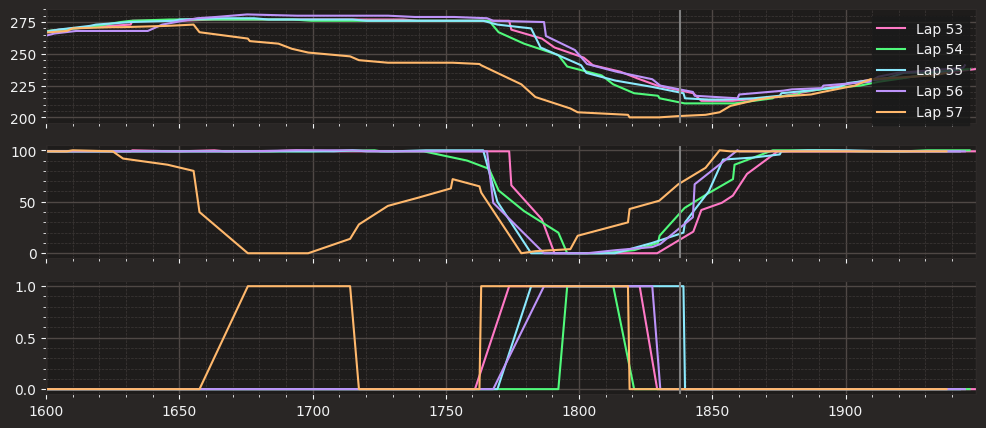

In [7]:
#todo:buat lebih simple!

alo_lap_limit=alo_lap.query('(Distance>1500) & (Distance<1949)')
fig,axs=plt.subplots(3,1,figsize=(12,5),sharex=True)
for i in range(53,58):
    axs[0].plot(alo_lap_limit[alo_lap_limit['lapNumber']==i]['Distance'],alo_lap_limit[alo_lap_limit['lapNumber']==i]['Speed'],label=f'Lap {i}')
for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance']):
    axs[0].axvline(x=dist,color='gray')
for i in range(53,58):
    axs[1].plot(alo_lap_limit[alo_lap_limit['lapNumber']==i]['Distance'],alo_lap_limit[alo_lap_limit['lapNumber']==i]['Throttle'],label=f'Lap {i}')
for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance']):
    axs[1].axvline(x=dist,color='gray')
for i in range(53,58):
    axs[2].plot(alo_lap_limit[alo_lap_limit['lapNumber']==i]['Distance'],alo_lap_limit[alo_lap_limit['lapNumber']==i]['Brake'],label=f'Lap {i}')
for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance']):
    axs[2].axvline(x=dist,color='gray')     
for ax in axs:
    ax.set_xlim([1600, 1949])  
axs[0].legend()

plt.show()

/var/folders/zk/r760srvd3r16_9wrdyh4d82w0000gn/T/ipykernel_17206/1601680988.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs2.annotate(round(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').min()[0],1),(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').idxmin(),rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').min()))
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError 

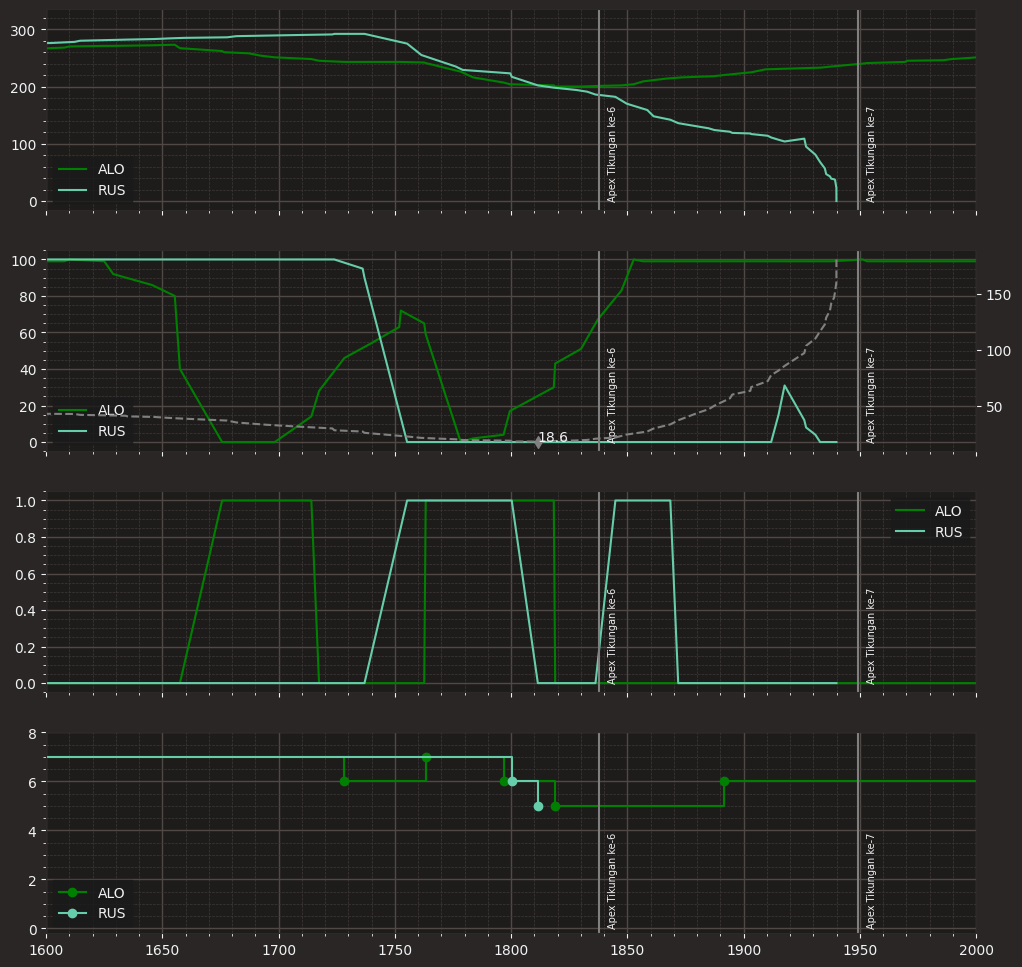

In [8]:
#todo:buat lebih simple!

fig,axs=plt.subplots(4,1,figsize=(12,12),sharex=True)
axs[0].plot(alo_lap[alo_lap['lapNumber']==57]['Distance'],alo_lap[alo_lap['lapNumber']==57]['Speed'],label=f'ALO',c='g')
axs[0].plot(rus_lap[rus_lap['lapNumber']==57]['Distance'],rus_lap[rus_lap['lapNumber']==57]['Speed'],label=f'RUS',c='mediumaquamarine')



axs[1].plot(alo_lap[alo_lap['lapNumber']==57]['Distance'],alo_lap[alo_lap['lapNumber']==57]['Throttle'],label=f'ALO',c='g')
axs[1].plot(rus_lap[rus_lap['lapNumber']==57]['Distance'],rus_lap[rus_lap['lapNumber']==57]['Throttle'],label=f'RUS',c='mediumaquamarine')
axs2=axs[1].twinx()
axs2.plot(rus_lap[rus_lap['lapNumber']==57]['Distance'],rus_lap[rus_lap['lapNumber']==57]['DistanceToDriverAhead'],label=f'Jarak ALO vs RUS',c='gray',linestyle='--')

axs2.scatter(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').idxmin(),rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').min(),marker='d',color='gray')
axs2.annotate(round(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').min()[0],1),(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').idxmin(),rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').min()))
axs[2].plot(alo_lap[alo_lap['lapNumber']==57]['Distance'],alo_lap[alo_lap['lapNumber']==57]['Brake'],label=f'ALO',c='g')
axs[2].plot(rus_lap[rus_lap['lapNumber']==57]['Distance'],rus_lap[rus_lap['lapNumber']==57]['Brake'],label=f'RUS',c='mediumaquamarine')


alo_gear=pd.DataFrame(alo_lap[alo_lap['lapNumber']==57][['Distance','nGear']])
rus_gear=pd.DataFrame(rus_lap[rus_lap['lapNumber']==57][['Distance','nGear']])
alo_gear['gearShift']=alo_gear['nGear'].diff()
alo_gear.loc[2,'gearShift']=1
rus_gear['gearShift']=rus_gear['nGear'].diff()
rus_gear.loc[2,'gearShift']=1
axs[3].step(alo_gear[alo_gear['gearShift']!=0]['Distance'],alo_gear[alo_gear['gearShift']!=0]['nGear'],label=f'ALO',c='g',marker='o',where='post')
axs[3].step(rus_gear[rus_gear['gearShift']!=0]['Distance'],rus_gear[rus_gear['gearShift']!=0]['nGear'],label=f'RUS',c='mediumaquamarine',marker='o',where='post')


for ax in axs:
    for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance'].loc[aus_2024.get_circuit_info().corners['Number'].isin([6,7])]):
        ax.axvline(x=dist,color='gray')
        ax.text(dist+4, 0, f"Apex Tikungan ke-{i+6}", rotation=90, verticalalignment='bottom',fontsize=7)
    ax.set_xlim(1600,2000)
    ax.legend()
axs[3].set_ylim(-0.2,8)
    
plt.show()

/var/folders/zk/r760srvd3r16_9wrdyh4d82w0000gn/T/ipykernel_17206/836395219.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs2.annotate(round(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').min()[0],1),
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and

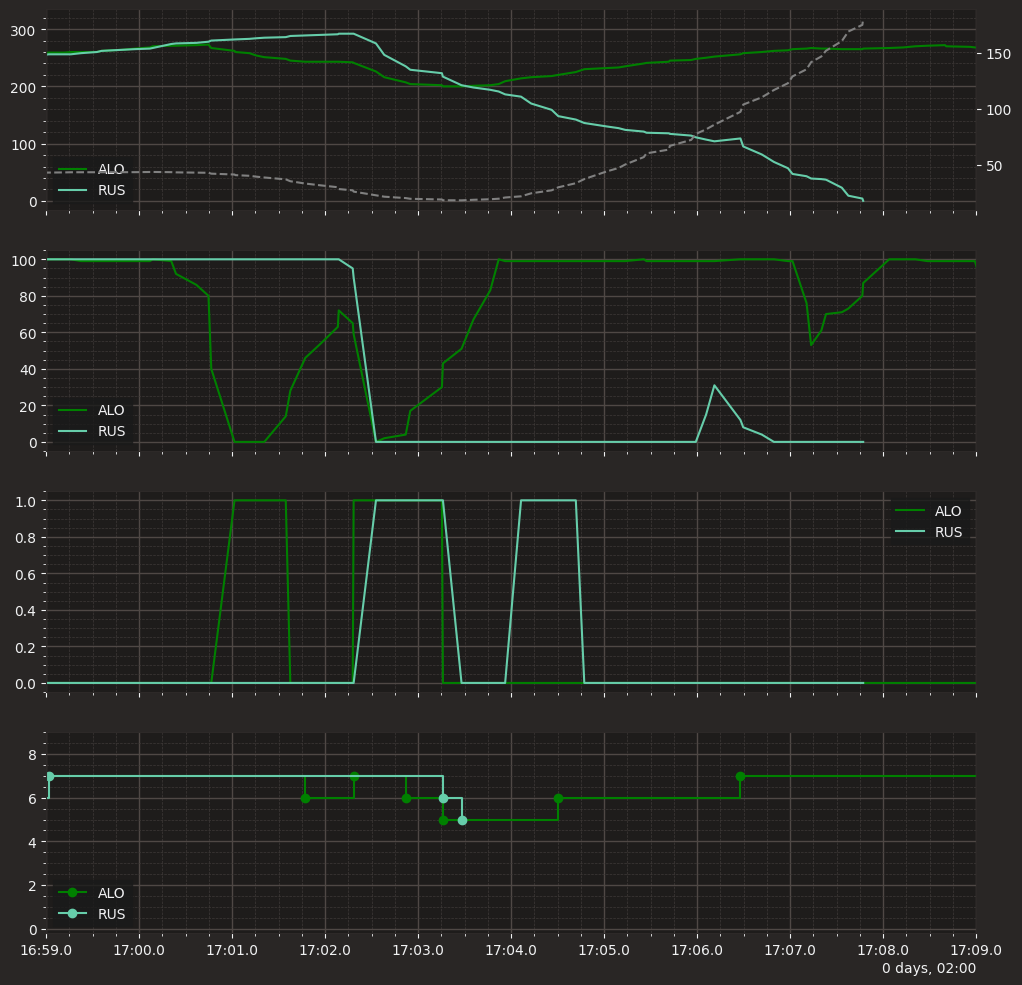

In [9]:
#todo:buat lebih simple!

from datetime import timedelta

fig,axs=plt.subplots(4,1,figsize=(12,12),sharex=True)
axs[0].plot(alo_lap[alo_lap['lapNumber']==57]['SessionTime'],alo_lap[alo_lap['lapNumber']==57]['Speed'],label=f'ALO',c='g')
axs[0].plot(rus_lap[rus_lap['lapNumber']==57]['SessionTime'],rus_lap[rus_lap['lapNumber']==57]['Speed'],label=f'RUS',c='mediumaquamarine')



axs[1].plot(alo_lap[alo_lap['lapNumber']==57]['SessionTime'],alo_lap[alo_lap['lapNumber']==57]['Throttle'],label=f'ALO',c='g')
axs[1].plot(rus_lap[rus_lap['lapNumber']==57]['SessionTime'],rus_lap[rus_lap['lapNumber']==57]['Throttle'],label=f'RUS',c='mediumaquamarine')
axs2=axs[0].twinx()
axs2.plot(rus_lap[rus_lap['lapNumber']==57]['SessionTime'],rus_lap[rus_lap['lapNumber']==57]['DistanceToDriverAhead'],label=f'Jarak ALO vs RUS',c='gray',linestyle='--')

axs2.scatter(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').idxmin(),
             rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').min(),
             marker='d',
             color='gray')
axs2.annotate(round(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').min()[0],1),
              (rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').idxmin(),
               rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').min()))
axs[2].plot(alo_lap[alo_lap['lapNumber']==57]['SessionTime'],alo_lap[alo_lap['lapNumber']==57]['Brake'],label=f'ALO',c='g')
axs[2].plot(rus_lap[rus_lap['lapNumber']==57]['SessionTime'],rus_lap[rus_lap['lapNumber']==57]['Brake'],label=f'RUS',c='mediumaquamarine')


alo_gear=pd.DataFrame(alo_lap[alo_lap['lapNumber']==57][['SessionTime','nGear']])
rus_gear=pd.DataFrame(rus_lap[rus_lap['lapNumber']==57][['SessionTime','nGear']])
alo_gear['gearShift']=alo_gear['nGear'].diff()
alo_gear.loc[2,'gearShift']=1
rus_gear['gearShift']=rus_gear['nGear'].diff()
rus_gear.loc[2,'gearShift']=1
axs[3].step(alo_gear[alo_gear['gearShift']!=0]['SessionTime'],alo_gear[alo_gear['gearShift']!=0]['nGear'],label=f'ALO',c='g',marker='o',where='post')
axs[3].step(rus_gear[rus_gear['gearShift']!=0]['SessionTime'],rus_gear[rus_gear['gearShift']!=0]['nGear'],label=f'RUS',c='mediumaquamarine',marker='o',where='post')


for ax in axs:
    #for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance'].loc[aus_2024.get_circuit_info().corners['Number'].isin([6,7])]):
    #    ax.axvline(x=dist,color='gray')
    #    ax.text(dist+4, 0, f"Apex Tikungan ke-{i+6}", rotation=90, verticalalignment='bottom',fontsize=7)
    ax.set_xlim(timedelta(hours=2,minutes=16,seconds=59),timedelta(hours=2,minutes=17,seconds=9))
    ax.legend()
axs[3].set_ylim(-0.2,9)
    
plt.show()

In [21]:
alorus_tyre=pd.DataFrame(aus_2024.laps.pick_drivers(['ALO','RUS']))[['Driver','LapNumber','Compound','TyreLife','Stint','FreshTyre']]
alorus_tyre=alorus_tyre.drop(alorus_tyre[alorus_tyre['LapNumber']>57].index)
alorus_tyre=alorus_tyre.groupby(['Driver','Compound','Stint','FreshTyre']).agg({'LapNumber':'count','TyreLife':'max'}).sort_values(by=['Driver','Stint']).reset_index()
#alorus_tyre=alorus_tyre[['Driver','Compound']].value_counts().to_frame().reset_index()

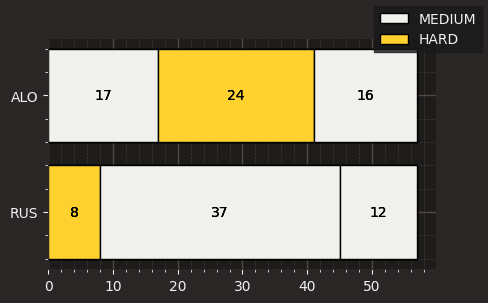

In [85]:
fig,ax=plt.subplots(figsize=(5,3))
for driver in alorus_tyre['Driver']:
    driver_stints = alorus_tyre.loc[alorus_tyre["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        bars=ax.barh(
            y=driver,
            width=row["LapNumber"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True,
            label=row['Compound']
        )
        
        ax.bar_label(bars, label_type='center', color='black')
        
        previous_stint_end += row["LapNumber"]
ax.invert_yaxis()
fig.legend(driver_stints['Compound'].unique())
plt.show()

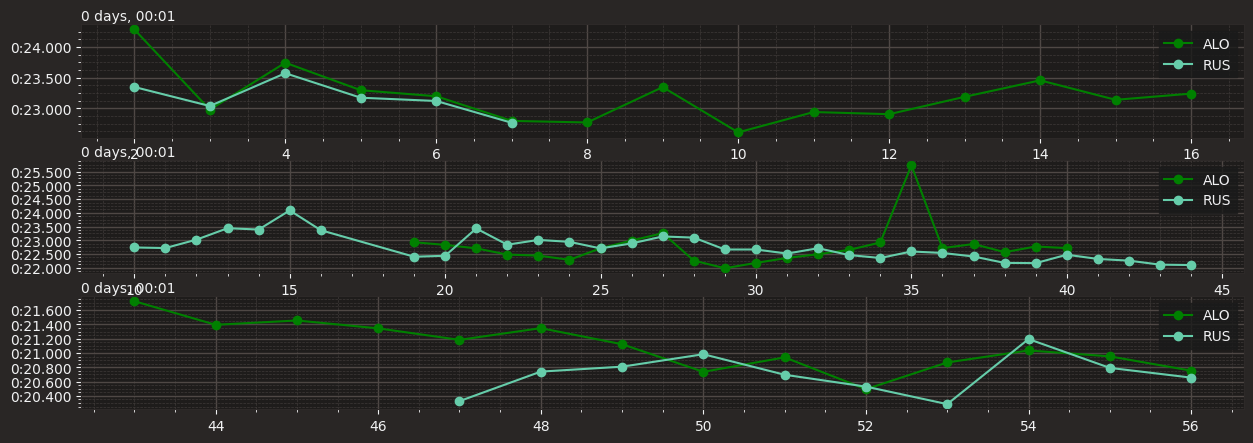

In [32]:
laptimes=aus_2024.laps.pick_wo_box().pick_accurate().pick_laps(range(2,57)).pick_drivers(['ALO','RUS'])[['Driver','LapTime','LapNumber','Compound','Stint']]
fig,ax=plt.subplots(3,1,figsize=(15,5))
for i,drv in laptimes.groupby(['Driver','Stint']):
    num=int(i[1])-1
    if i[0]=='ALO':
        color='g'
    else:
        color='mediumaquamarine'
    ax[num].plot(drv['LapNumber'],drv['LapTime'],label=i[0],c=color,marker='o')
    ax[num].legend()

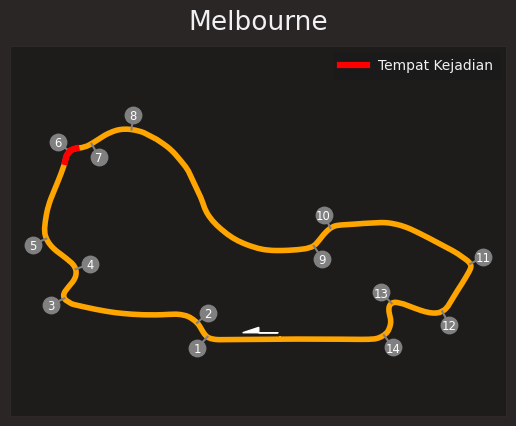

In [93]:
lap = aus_2024.laps.pick_fastest()
pos = lap.get_pos_data()
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1],linewidth=4,c='orange')

offset_vector = [700, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')
    

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
    


rotrack_highlight=rotated_track[(rotated_track[:,0]>-11000)&(rotated_track[:,0]<-8850)&(rotated_track[:,1]>6300)&(rotated_track[:,1]<7100)]
plt.plot(rotrack_highlight[:, 0], rotrack_highlight[:, 1],linewidth=4.5,c='red',label='Tempat Kejadian')
plt.arrow(rotated_track[0,0],rotated_track[0,1]+300,-900,0,color='white',shape='left',head_width=500)
plt.legend()

plt.title(aus_2024.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

In [23]:
aus_alorus=pd.DataFrame(aus_2024.laps.pick_accurate().pick_wo_box()).query("Driver in ['ALO','RUS']")[['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time','Compound']].melt(id_vars=['Compound','Driver','LapTime'],value_vars=['Sector1Time','Sector2Time','Sector3Time'],var_name='Sectors',value_name='Time')

<Axes: xlabel='Driver', ylabel='LapTime'>

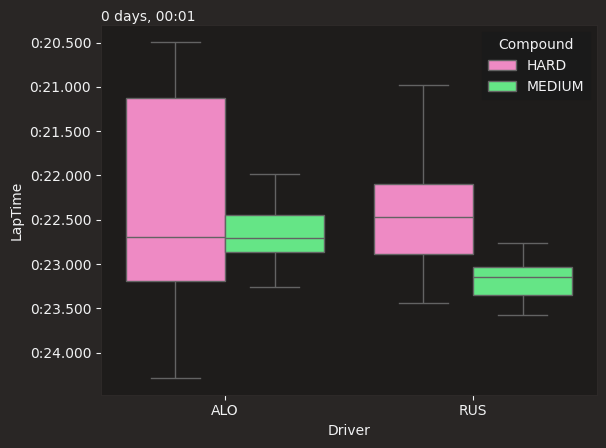

In [30]:
sns.boxplot(data=aus_alorus,x='Driver',y='LapTime',hue='Compound',showfliers=False)

In [125]:
alorus_telem=pd.DataFrame()
for drv in jap_practice_2024.drivers:
    tmp_df=pd.DataFrame(jap_practice_2024.laps.pick_driver(drv).pick_fastest().get_telemetry())
    tmp_df['drvNum']=float(jap_practice_2024.get_driver(drv).DriverNumber)
    tmp_df['tc']='#'+jap_practice_2024.get_driver(drv).TeamColor
    tmp_df['drv']=jap_practice_2024.get_driver(drv).Abbreviation
    alorus_telem=pd.concat([alorus_telem,tmp_df])

#alorus_telem=alorus_telem.query("DRS in [0,1,2,3,8]")

alorus_telem.loc[:,'miniSect']=np.round(alorus_telem['RelativeDistance'].to_numpy()/(1/25))

alorus_speed=alorus_telem[['Speed','miniSect','drv','drvNum','tc']]

dfSpeed=alorus_speed.sort_values('Speed').drop_duplicates(subset='miniSect', keep='last').sort_values('miniSect').reset_index(drop=True)
listProp=dfSpeed[['drv','tc']].value_counts(['drv','tc'],normalize=True).reset_index()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [126]:
single_lap = pd.DataFrame(jap_practice_2024.laps.pick_driver('PER').pick_fastest().get_telemetry())[['X','Y','RelativeDistance']]
single_lap['miniSect']=single_lap['RelativeDistance'].apply(lambda x: int(x/(1/25)))
single_lap=single_lap.merge(dfSpeed,on='miniSect')
single_lap=single_lap.merge(single_lap[['drv']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'id'}),on='drv')#id dari 0
single_lap['tc']=single_lap['drv'].apply(lambda x:'#'+jap_practice_2024.get_driver(x).TeamColor)
single_lap=single_lap.merge(single_lap[['tc']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'idTeam'}),on='tc')#id dari 0

listProp['dc']=listProp['drv'].apply(fastf1.plotting.driver_color)
circuit_info = jap_practice_2024.get_circuit_info()
circuit_info.rotation

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


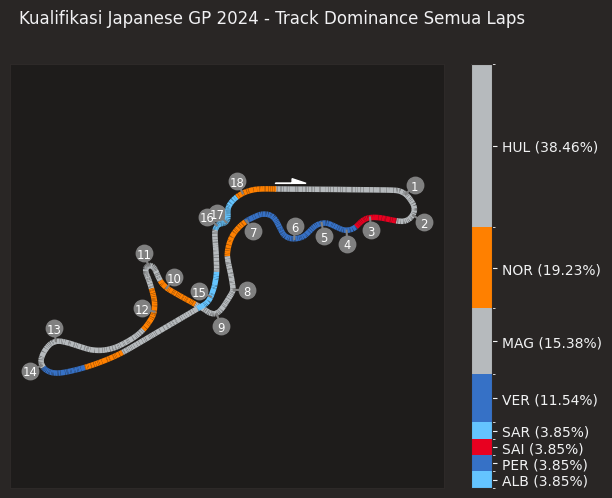

In [130]:
from matplotlib.colors import BoundaryNorm, ListedColormap
circuit_info = jap_practice_2024.get_circuit_info()
circRot=circuit_info.rotation
x,y=rotate_matrix(single_lap['X'].values,single_lap['Y'].values,circRot)


listProp.sort_values('proportion',inplace=True)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_avg=single_lap['idTeam'].to_numpy().astype(float)

#teamColor=single_lap[['id','tc']].drop_duplicates()
cmap = ListedColormap(single_lap['tc'].drop_duplicates().to_list())
lc_comp = LineCollection(segments, norm=plt.Normalize(0, cmap.N), cmap=cmap)
lc_comp.set_array(fastest_avg)
lc_comp.set_linewidth(4)


fig,ax=plt.subplots(figsize=(7,5.5))
    

fig.suptitle(
        f"Kualifikasi Japanese GP 2024 - Track Dominance Semua Laps"
    )
        
ax.add_collection(lc_comp)
ax.axis('equal')
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

offset_vector = [700, 0] 
# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=math.radians(circRot))

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=math.radians(circRot))

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')
    

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
plt.arrow(x[0],y[0]+300,+900,0,color='white',shape='right',head_width=500)
bounds=[i*10 for i in(listProp.sort_values('proportion')['proportion'].to_list())]
bounds.insert(0,0)
boundsx=[]
mem=0
for i in bounds:
    i+=mem
    mem=i
    boundsx.append(i)


cmap = ListedColormap(listProp['tc'].to_list())
norm = BoundaryNorm(boundsx, cmap.N)

cbar=fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ax=ax,spacing='proportional')
initial=0
ticksList=[]
for i in listProp['proportion']:
    if i!=0:
        ticksList.append((((i*10)/2)+initial))
        initial+=i*10

cbar.set_ticks(ticksList)
#listProp['bounds']=boundsx
labels=[]
for j,k in listProp.iterrows():
    label=f'{k["drv"]} ({round(k["proportion"]*100,2)}%)'
    labels.append(label)

cbar.set_ticklabels(labels)#ambil driver name dari variabel!!!
plt.xticks([])
plt.yticks([])
plt.show()

In [463]:
listProp['ticks']=ticksList
listProp['bounds']=boundsx[1:]
listProp

drv       tc  proportion       dc     ticks     bounds
3  ALB  #64C4FF    0.041667  #005aff  0.208333   0.416667
4  HAM  #27F4D2    0.041667  #00d2be  0.625000   0.833333
5  PIA  #FF8000    0.041667  #ff8700  0.625000   1.250000
6  SAI  #E80020    0.041667  #ff8181  0.625000   1.666667
7  SAR  #64C4FF    0.041667  #012564  0.625000   2.083333
8  VER  #3671C6    0.041667  #fcd700  0.625000   2.500000
1  MAG  #B6BABD    0.166667  #ffffff  1.250000   4.166667
2  NOR  #FF8000    0.166667  #eeb370  2.500000   5.833333
0  HUL  #B6BABD    0.416667  #cacaca  3.750000  10.000000

Max. amount of fuel an F1 car can have is 110kg and they use pretty much all of it (1kg is required to still be in the car at the end of the race if I'm not mistaken). If a race has 57 laps it means that estimated fuel consumption during 1 lap is 110kg/57laps or about 2kg/lap meaning that the car is lighter by 2 kg after every lap. It is estimated that 1kg of weight = about 30-35ms.

2kg * 35ms = 65ms - so the car gets faster by this amount each lap

In [7]:
#POC fuel corrected laptime

df=(aus_2024.laps['LapNumber']-1)*(105/aus_2024.total_laps)*35

df[:]=df[::-1]
df=df.apply(lambda x: timedelta(milliseconds=x))
(aus_2024.laps['LapTime'])-df

0     0 days 00:01:23.846362
1     0 days 00:01:20.550724
2     0 days 00:01:19.630086
3                        NaT
4     0 days 00:01:33.945810
               ...          
993   0 days 00:01:20.199000
994   0 days 00:01:20.563914
995   0 days 00:01:20.230276
996   0 days 00:01:25.191638
997   0 days 00:02:04.363000
Length: 998, dtype: timedelta64[ns]

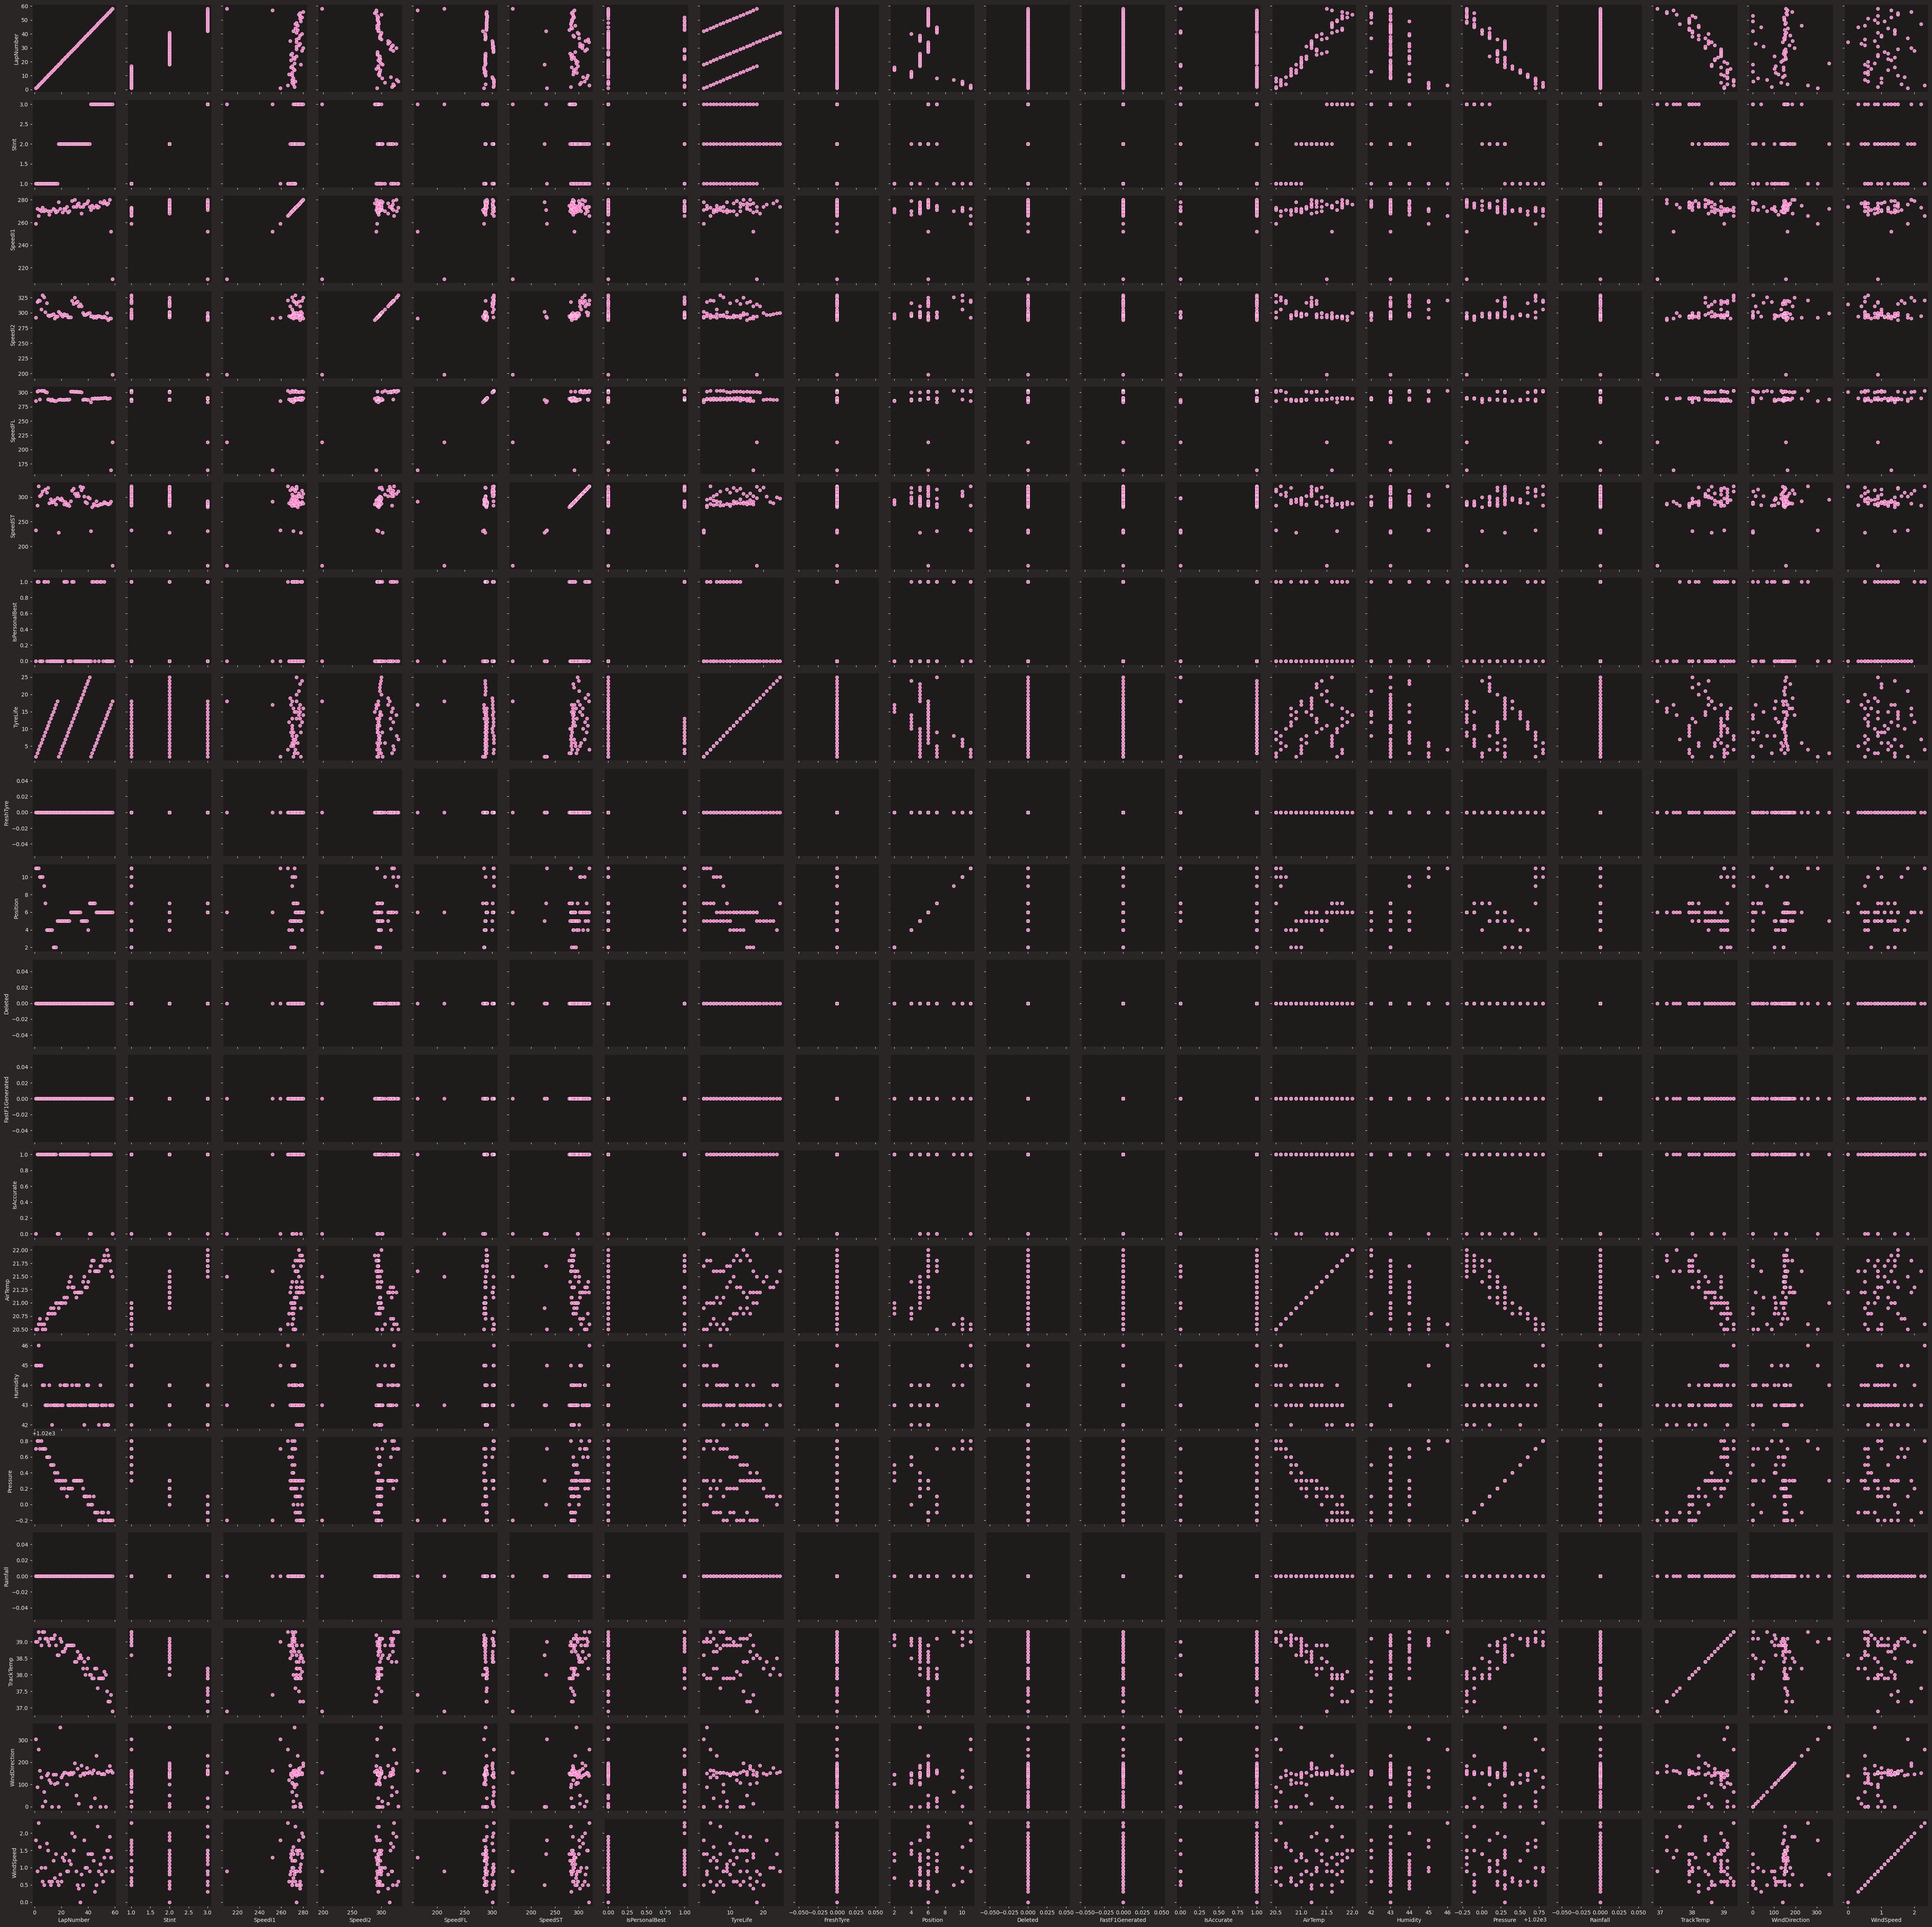

In [13]:
#EKSPLORASI DATA CUACA
test=pd.merge_asof(aus_2024.laps.pick_driver('ALO'),aus_2024.weather_data,on='Time',direction='nearest')
g=sns.PairGrid(data=test)
g.map(sns.scatterplot)

In [189]:
aus_2024_q=fastf1.get_session(2024,'australia','q')
aus_2024_q.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.3.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']


In [190]:
test=pd.DataFrame(aus_2024_q.laps)

In [262]:
allDF=pd.DataFrame()
for drv in aus_2024_q.drivers:
    dfx=aus_2024_q.laps.pick_driver(drv).pick_accurate().pick_wo_box().pick_fastest().get_telemetry()[['Speed','DRS']]
    
    dfx['drvName']=aus_2024.get_driver(drv).Abbreviation
    dfx['teamName']=aus_2024.get_driver(drv).TeamName
    dfx['teamColor']='#'+aus_2024.get_driver(drv).TeamColor
    allDF=pd.concat([allDF,dfx])
allDF.head()

#allDF=allDF.query("DRS in [0,1,2,3,8]")
#allDF.drop('DRS',axis=1,inplace=True)

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

Speed  DRS drvName         teamName teamColor
2    315   12     VER  Red Bull Racing   #3671C6
3    316   12     VER  Red Bull Racing   #3671C6
4    317   12     VER  Red Bull Racing   #3671C6
5    318   12     VER  Red Bull Racing   #3671C6
6    319   12     VER  Red Bull Racing   #3671C6

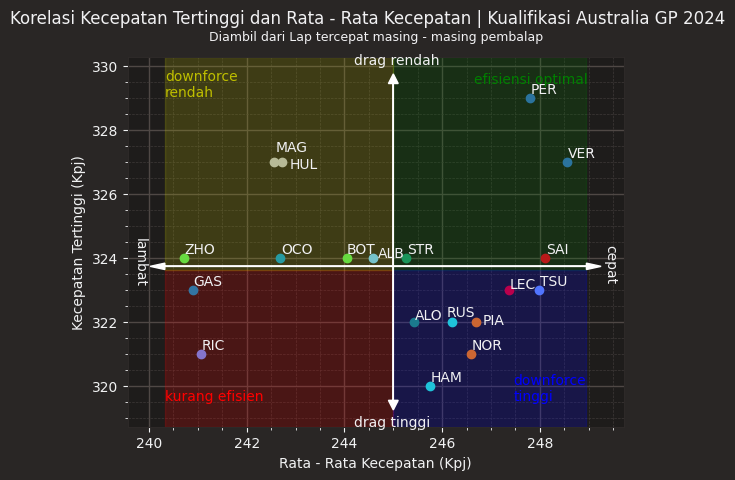

In [290]:
from adjustText import adjust_text
test=allDF.groupby(['drvName','teamName','teamColor']).agg(maxSpeed=('Speed','max'),avgSpeed=('Speed','mean')).reset_index()
fig,ax=plt.subplots()

[ax.scatter(row['avgSpeed'],row['maxSpeed'],color=row['teamColor']) for i,row in test.iterrows()]
texts=[ax.annotate(row['drvName'],[row['avgSpeed'],row['maxSpeed']]) for i,row in test.iterrows()]
#ax.axvline(test['avgSpeed'].mean(),color='lightgray')
#ax.axhline(test['maxSpeed'].mean(),color='lightgray')
xlims=ax.get_xlim()
ylims=ax.get_ylim()
maxSpeed_center=(test['maxSpeed'].mean()-min(ylims))/(max(ylims)-min(ylims))

ax.axvspan(xmin=test['avgSpeed'].mean(),xmax=max(xlims),ymin=maxSpeed_center,color='g',alpha=0.2)
ax.axvspan(xmax=test['avgSpeed'].mean(),xmin=min(xlims),ymax=maxSpeed_center,color='r',alpha=0.2)
ax.axvspan(xmax=test['avgSpeed'].mean(),xmin=min(xlims),ymin=maxSpeed_center,color='y',alpha=0.2)
ax.axvspan(xmin=test['avgSpeed'].mean(),xmax=max(xlims),ymax=maxSpeed_center,color='b',alpha=0.2)

ax.arrow(test['avgSpeed'].mean(),min(ylims),0,max(ylims)-min(ylims),color='white',head_width=0.2)
ax.arrow(test['avgSpeed'].mean(),max(ylims),0,-(max(ylims)-min(ylims)),color='white',head_width=0.2)
ax.arrow(min(xlims),test['maxSpeed'].mean(),max(xlims)-min(xlims),0,color='white',head_width=0.2)
ax.arrow(max(xlims),test['maxSpeed'].mean(),-(max(xlims)-min(xlims)),0,color='white',head_width=0.2)

ax.text(max(xlims)+0.4,test['maxSpeed'].mean()+0.7,'cepat',rotation=270,rotation_mode='anchor')
ax.text(min(xlims)-0.6,test['maxSpeed'].mean()+0.9,'lambat',rotation=270,rotation_mode='anchor')

ax.text(test['avgSpeed'].mean()-.8,max(ylims)+.6,'drag rendah')
ax.text(test['avgSpeed'].mean()-.8,min(ylims)-0.8,'drag tinggi')

ax.text(min(xlims),min(ylims),'kurang efisien',color='r')
ax.text(max(xlims)-1.5,min(ylims),'downforce\ntinggi',color='b')
ax.text(min(xlims),max(ylims)-0.4,'downforce\nrendah',color='y')
ax.text(max(xlims)-2.3,max(ylims),'efisiensi optimal',color='g')

ax.set_xlabel('Rata - Rata Kecepatan (Kpj)')
ax.set_ylabel('Kecepatan Tertinggi (Kpj)')
adjust_text(texts)
plt.suptitle('Korelasi Kecepatan Tertinggi dan Rata - Rata Kecepatan | Kualifikasi Australia GP 2024')
plt.title('Diambil dari Lap tercepat masing - masing pembalap',fontsize=9)

plt.show()

In [25]:
maxSpeeds=pd.DataFrame()
for drv in aus_2024.drivers:
    dfx=pd.DataFrame(aus_2024.laps.pick_wo_box().pick_driver(drv).get_telemetry()[['DRS','Speed']])
    dfx['drvName']=aus_2024.get_driver(drv).Abbreviation
    maxSpeeds=pd.concat([maxSpeeds,dfx])


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [57]:
test=maxSpeeds.sort_values(['drvName','Speed'],ascending=[True,False]).drop_duplicates(subset=['drvName','Speed']).groupby('drvName').head(15).reset_index(drop=True)
test.head()

DRS  Speed drvName
0   12    332     ALB
1   12    331     ALB
2   12    330     ALB
3   12    329     ALB
4   12    328     ALB

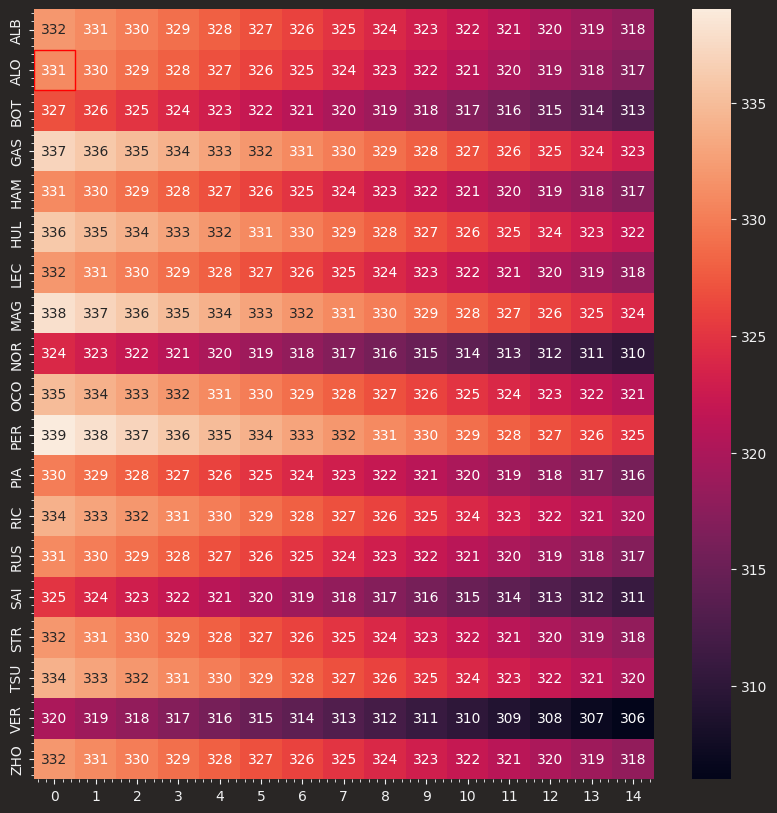

In [86]:
from matplotlib.patches import Rectangle 
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(pd.DataFrame(test['Speed'].to_numpy().astype('int64').reshape(len(test['drvName'].unique()),15)).set_index(test['drvName'].unique()),annot=True,ax=ax,fmt='g')
ax.add_patch( Rectangle((0, 1), 
                        1, 1, 
                        fc ='none',  
                        ec ='r', 
                        lw = 1) ) 

In [ ]:
import pandas as pd
import os
from sqlalchemy import create_engine
engine=create_engine(os.environ.get('stbdb_url'))
conn=engine.connect()

query='''
SELECT * FROM telemetry_test
'''
testx=pd.read_sql(query,conn)
import matplotlib.pyplot as plt
from adjustText import adjust_text
testx['speed']=testx['speed'].astype(int)
testx=testx[testx['speed']>=200]
test=testx[['driver_num','speed']].groupby('driver_num').agg(maxSpeed=('speed','max'),avgSpeed=('speed','mean')).reset_index()
fig,ax=plt.subplots()

[ax.scatter(row['avgSpeed'],row['maxSpeed']) for i,row in test.iterrows()]
texts=[ax.annotate(row['driver_num'],[row['avgSpeed'],row['maxSpeed']]) for i,row in test.iterrows()]
#ax.axvline(test['avgSpeed'].mean(),color='lightgray')
#ax.axhline(test['maxSpeed'].mean(),color='lightgray')
xlims=ax.get_xlim()
ylims=ax.get_ylim()
maxSpeed_center=(test['maxSpeed'].mean()-min(ylims))/(max(ylims)-min(ylims))

ax.axvspan(xmin=test['avgSpeed'].mean(),xmax=max(xlims),ymin=maxSpeed_center,color='g',alpha=0.2)
ax.axvspan(xmax=test['avgSpeed'].mean(),xmin=min(xlims),ymax=maxSpeed_center,color='r',alpha=0.2)
ax.axvspan(xmax=test['avgSpeed'].mean(),xmin=min(xlims),ymin=maxSpeed_center,color='y',alpha=0.2)
ax.axvspan(xmin=test['avgSpeed'].mean(),xmax=max(xlims),ymax=maxSpeed_center,color='b',alpha=0.2)

ax.arrow(test['avgSpeed'].mean(),min(ylims),0,max(ylims)-min(ylims),color='white',head_width=0.2)
ax.arrow(test['avgSpeed'].mean(),max(ylims),0,-(max(ylims)-min(ylims)),color='white',head_width=0.2)
ax.arrow(min(xlims),test['maxSpeed'].mean(),max(xlims)-min(xlims),0,color='white',head_width=0.2)
ax.arrow(max(xlims),test['maxSpeed'].mean(),-(max(xlims)-min(xlims)),0,color='white',head_width=0.2)

ax.text(max(xlims)+0.4,test['maxSpeed'].mean()+0.7,'cepat',rotation=270,rotation_mode='anchor')
ax.text(min(xlims)-0.6,test['maxSpeed'].mean()+0.9,'lambat',rotation=270,rotation_mode='anchor')

ax.text(test['avgSpeed'].mean()-.8,max(ylims)+.6,'drag rendah')
ax.text(test['avgSpeed'].mean()-.8,min(ylims)-0.8,'drag tinggi')

ax.text(min(xlims),min(ylims),'kurang efisien',color='r')
ax.text(max(xlims)-1.5,min(ylims),'downforce\ntinggi',color='b')
ax.text(min(xlims),max(ylims)-0.4,'downforce\nrendah',color='y')
ax.text(max(xlims)-2.3,max(ylims),'efisiensi optimal',color='g')

ax.set_xlabel('Rata - Rata Kecepatan (Kpj)')
ax.set_ylabel('Kecepatan Tertinggi (Kpj)')
adjust_text(texts)
plt.suptitle('Korelasi Kecepatan Tertinggi dan Rata - Rata Kecepatan | Latihan Japan GP 2024')
plt.title('Diambil dari Lap tercepat masing - masing pembalap',fontsize=9)

plt.show()

In [9]:
jap_practice_2024=fastf1.get_session(2024,'japan','q')

In [10]:
jap_practice_2024.load()

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.3.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '55', '14', '81', '44', '16', '63', '22', '3', '27', '77', '23', '31', '18', '10', '20', '2', '24']


In [11]:
fastest_practice=pd.DataFrame()
for drv in jap_practice_2024.drivers:
    df_temp=pd.DataFrame(jap_practice_2024.laps.pick_driver(drv).pick_accurate().pick_wo_box().pick_fastest().get_telemetry())
    df_temp['drvName']=jap_practice_2024.get_driver(drv).Abbreviation
    df_temp['teamName']=jap_practice_2024.get_driver(drv).TeamName
    df_temp['teamColor']='#'+jap_practice_2024.get_driver(drv).TeamColor
    fastest_practice=pd.concat([fastest_practice,df_temp])


drs_group=fastest_practice[['drvName','teamName','teamColor','Speed']].groupby(['drvName','teamName','teamColor']).agg(maxSpeed=('Speed','max'),avgSpeed=('Speed','mean')).reset_index().sort_values(by='avgSpeed')
    
fastest_practice[['drvName','teamName','teamColor','Speed','DRS']][fastest_practice['DRS'].isin([0,1,2,3,5,8,9,11,13])].groupby(['drvName','teamName','teamColor']).agg(maxSpeednoDRS=('Speed','max'),avgSpeednoDRS=('Speed','mean'))

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

maxSpeednoDRS  avgSpeednoDRS
drvName teamName        teamColor                              
ALB     Williams        #64C4FF              319     223.393939
ALO     Aston Martin    #229971              316     226.355628
BOT     Kick Sauber     #52e252              319     225.537721
GAS     Alpine          #0093cc              316     223.595710
HAM     Mercedes        #27F4D2              313     225.990180
HUL     Haas F1 Team    #B6BABD              321     224.658147
LEC     Ferrari         #E80020              316     227.506515
MAG     Haas F1 Team    #B6BABD              317     222.741776
NOR     McLaren         #FF8000              314     229.064103
OCO     Alpine          #0093cc              318     223.450658
PER     Red Bull Racing #3671C6              319     227.513776
PIA     McLaren         #FF8000              313     227.803514
RIC     RB              #6692FF              319     224.714514
RUS     Mercedes        #27F4D2              316     226.089431
SAI     Ferrari         #E80020              318     226.750804
SAR     Williams        #64C4FF              319     223.183835
STR     Aston Martin    #229971              316     224.301738
TSU     RB              #6692FF              322     224.921348
VER     Red Bull Racing #3671C6              319     227.836601
ZHO     Kick Sauber     #52e252              316     225.384365

In [12]:
drvLaps=jap_practice_2024.laps[['DriverNumber','LapNumber']].groupby('DriverNumber').max()

In [14]:
all_quali=pd.DataFrame()
for drv in jap_practice_2024.drivers:
    laps=jap_practice_2024.laps.pick_driver(drv)
    
    for i in range(1,int(drvLaps[drvLaps.index==drv]['LapNumber'].iloc[0])):
        try:
            df_temp=pd.DataFrame(laps.pick_lap(i).pick_accurate().pick_wo_box().get_telemetry())
            df_temp['drvName']=jap_practice_2024.get_driver(drv).Abbreviation
            df_temp['teamName']=jap_practice_2024.get_driver(drv).TeamName
            df_temp['teamColor']='#'+jap_practice_2024.get_driver(drv).TeamColor
            df_temp['LapNumber']=i
            all_quali=pd.concat([all_quali,df_temp])
        except:
            continue

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [15]:
all_quali['miniSect']=(np.round(all_quali['RelativeDistance'].to_numpy()/(1/2))+1).astype(int)

In [16]:
first_set=all_quali[['drvName','Time','miniSect','LapNumber']].groupby(['drvName','miniSect','LapNumber']).agg(getDuration).reset_index()
theoretical_best_minisectors=first_set[['drvName','Time','miniSect']].groupby(['drvName','miniSect']).min().reset_index()
sum_tbest_minisectors=theoretical_best_minisectors.groupby('drvName').agg(IdealmSTime=('Time','sum'))

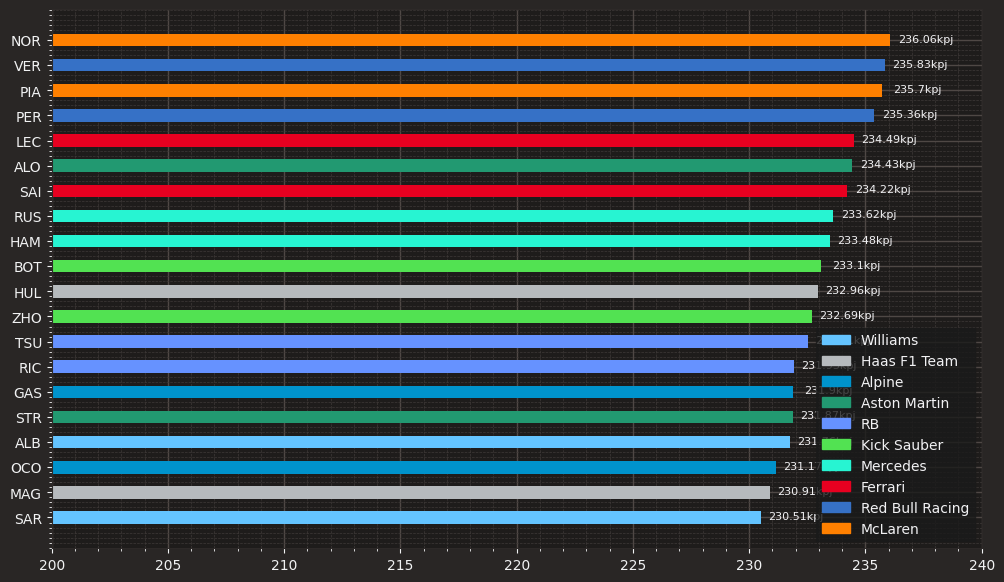

In [17]:
fig,ax=plt.subplots(figsize=(12,7))
ax.barh(drs_group['drvName'],drs_group['avgSpeed'],color=drs_group['teamColor'],height=0.5)
rects = ax.patches

# Make some labels.
labels = [f"{round(i,2)}kpj" for i in drs_group['avgSpeed']]


for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_width()*1.0065, rect.get_y()+0.1, label, ha="center", va="bottom",fontsize=8
    )
ax.set_xlim((200,240))

colors = drs_group[['teamName','teamColor']].drop_duplicates().set_index('teamName').to_dict()['teamColor']
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)

plt.show()

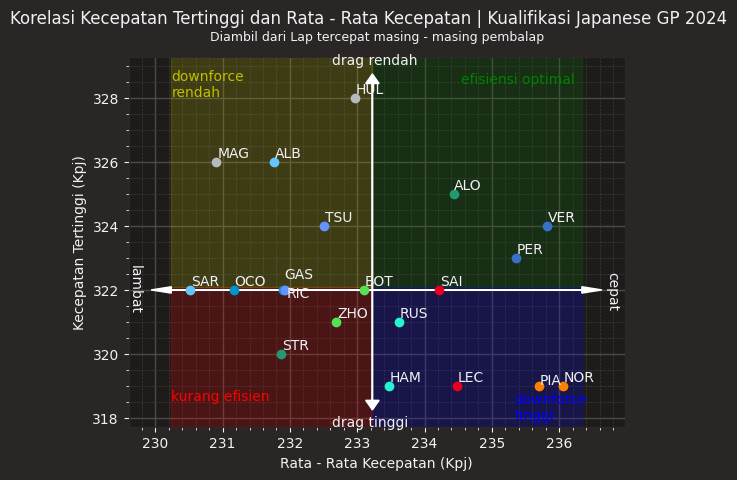

In [18]:
from adjustText import adjust_text
test=fastest_practice.groupby(['drvName','teamName','teamColor']).agg(maxSpeed=('Speed','max'),avgSpeed=('Speed','mean')).reset_index()
fig,ax=plt.subplots()

[ax.scatter(row['avgSpeed'],row['maxSpeed'],color=row['teamColor'],zorder=10) for i,row in test.iterrows()]
texts=[ax.annotate(row['drvName'],[row['avgSpeed'],row['maxSpeed']],zorder=10) for i,row in test.iterrows()]
#ax.axvline(test['avgSpeed'].mean(),color='lightgray')
#ax.axhline(test['maxSpeed'].mean(),color='lightgray')
xlims=ax.get_xlim()
ylims=ax.get_ylim()
maxSpeed_center=(test['maxSpeed'].mean()-min(ylims))/(max(ylims)-min(ylims))

ax.axvspan(xmin=test['avgSpeed'].mean(),xmax=max(xlims),ymin=maxSpeed_center,color='g',alpha=0.2)
ax.axvspan(xmax=test['avgSpeed'].mean(),xmin=min(xlims),ymax=maxSpeed_center,color='r',alpha=0.2)
ax.axvspan(xmax=test['avgSpeed'].mean(),xmin=min(xlims),ymin=maxSpeed_center,color='y',alpha=0.2)
ax.axvspan(xmin=test['avgSpeed'].mean(),xmax=max(xlims),ymax=maxSpeed_center,color='b',alpha=0.2)

ax.arrow(test['avgSpeed'].mean(),min(ylims),0,max(ylims)-min(ylims),color='white',head_width=0.2)
ax.arrow(test['avgSpeed'].mean(),max(ylims),0,-(max(ylims)-min(ylims)),color='white',head_width=0.2)
ax.arrow(min(xlims),test['maxSpeed'].mean()-0.3,max(xlims)-min(xlims),0,color='white',head_width=0.2)
ax.arrow(max(xlims),test['maxSpeed'].mean()-0.3,-(max(xlims)-min(xlims)),0,color='white',head_width=0.2)

ax.text(max(xlims)+0.4,test['maxSpeed'].mean()+0.3,'cepat',rotation=270,rotation_mode='anchor')
ax.text(min(xlims)-0.6,test['maxSpeed'].mean()+0.5,'lambat',rotation=270,rotation_mode='anchor')

ax.text(test['avgSpeed'].mean()-.6,max(ylims)+.6,'drag rendah')
ax.text(test['avgSpeed'].mean()-.6,min(ylims)-0.8,'drag tinggi')
props=dict(boxstyle='round',facecolor='w',alpha=0.5)
ax.text(min(xlims),min(ylims),'kurang efisien',color='r')
ax.text(max(xlims)-1,min(ylims)-0.6,'downforce\ntinggi',color='b')
ax.text(min(xlims),max(ylims)-0.4,'downforce\nrendah',color='y')
ax.text(max(xlims)-1.8,max(ylims),'efisiensi optimal',color='g')

ax.set_xlabel('Rata - Rata Kecepatan (Kpj)')
ax.set_ylabel('Kecepatan Tertinggi (Kpj)')
adjust_text(texts)
plt.suptitle('Korelasi Kecepatan Tertinggi dan Rata - Rata Kecepatan | Kualifikasi Japanese GP 2024')
plt.title('Diambil dari Lap tercepat masing - masing pembalap',fontsize=9)

plt.show()

In [19]:
testx=jap_practice_2024.laps.pick_accurate().pick_wo_box()[['LapTime','Driver','DriverNumber']].groupby(['Driver','DriverNumber']).agg(bestLap=('LapTime','min'),avgLap=('LapTime','mean')).reset_index()
testx['color']=testx['DriverNumber'].apply(lambda x: '#'+jap_practice_2024.get_driver(x).TeamColor)

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,Normalizer

scaler=StandardScaler()
testx['bestLapSecs']=testx['bestLap'].dt.total_seconds()
testx['avgLapSecs']=testx['avgLap'].dt.total_seconds()

train=testx[['bestLapSecs','avgLapSecs']]
transformed=scaler.fit_transform(train)
clustering = DBSCAN(eps=0.44, min_samples=4).fit_predict(transformed)
testx['clustering']=clustering
testx['clustering']=testx['clustering'].astype(str)
testx['Pengelompokan']=testx['clustering'].replace(['1','2','0','-1'],['leaders','backmarkers','midfield','siap siap wilhelmus'])


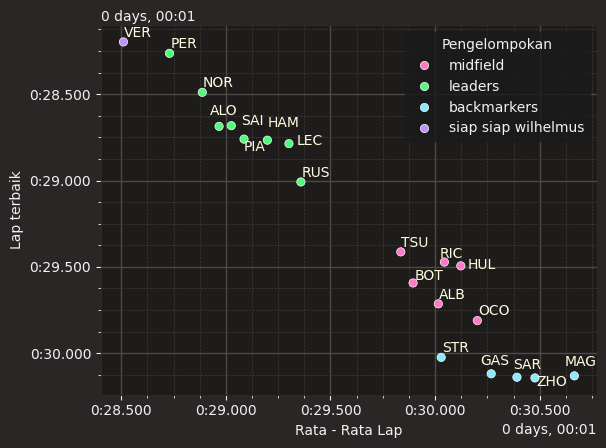

In [21]:
fig,ax=plt.subplots()
sns.scatterplot(data=testx,x='avgLap',y='bestLap',hue='Pengelompokan',zorder=10,ax=ax)
texts=[ax.annotate(row['Driver'],[row['avgLap'],row['bestLap']],zorder=10,color='lightyellow') for i,row in testx.iterrows()]
#lines=ax.plot([0, 1], [0.19, 1.21], transform=ax.transAxes,label='Garis Konsistensi',color='w',zorder=9)
ylims=ax.get_ylim()
xlims=ax.get_xlim()
centre=(max(xlims)/2,max(ylims)/2)

#ax.fill_between([0,1],[0.19, 1.21],transform=ax.transAxes,alpha=0.3,color='g',zorder=8)
#ax.fill_between([1,0],[1.21,1.21],[1.21,0.19],transform=ax.transAxes,alpha=0.3,color='r',zorder=8)
ax.set_xlabel('Rata - Rata Lap')
ax.set_ylabel('Lap terbaik')
props=dict(boxstyle='round',facecolor='w',alpha=0.5)
#ax.text(0.1,0.7,'Berpotensi lebih lambat',transform=ax.transAxes,bbox=props,zorder=9,color='black')
#ax.text(0.6,0.3,'Berpotensi lebih cepat',transform=ax.transAxes,bbox=props,zorder=8,color='black')
adjust_text(texts)
colors = drs_group[['teamName','teamColor']].drop_duplicates().set_index('teamName').to_dict()['teamColor']
labels = list(colors.keys())[::-1]
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#fig.legend(handles, labels)
#ax.legend().set_zorder(10)

In [22]:
allLaps=pd.DataFrame(jap_practice_2024.laps.pick_accurate().pick_wo_box()[['Driver','DriverNumber','LapTime','Sector1Time','Sector2Time','Sector3Time','Compound','Team']])

fast_agg=allLaps[['Driver','DriverNumber','LapTime','Sector1Time','Sector2Time','Sector3Time','Team']].groupby(['Driver','DriverNumber','Team']).agg(BestLap=('LapTime','min'),BestS1=('Sector1Time','min'),BestS2=('Sector2Time','min'),BestS3=('Sector3Time','min'))

fast_agg['TheoreticalBest']=fast_agg['BestS1']+fast_agg['BestS2']+fast_agg['BestS3']
fast_agg.reset_index(inplace=True)
fast_agg=fast_agg.merge(sum_tbest_minisectors, left_on='Driver', right_on='drvName')
fast_agg.sort_values(by='BestLap',inplace=True)

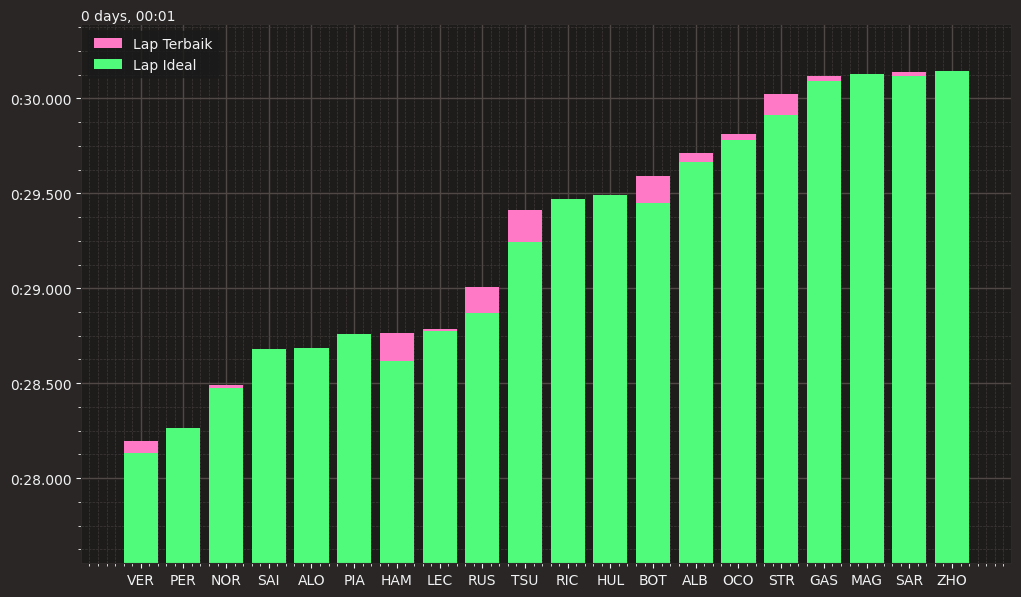

In [23]:
fig,ax=plt.subplots(figsize=(12,7))
ax.bar(fast_agg['Driver'],fast_agg['BestLap'],label='Lap Terbaik')
ax.bar(fast_agg['Driver'],fast_agg['TheoreticalBest'],label='Lap Ideal')
#ax.bar(fast_agg['Driver'],fast_agg['IdealmSTime'],label='Ideal minisect lap')
y1,y2=ax.get_ylim()
y1=y2*0.925
y2=y2*0.955
ax.set_ylim(y1,y2)
ax.legend()

In [24]:
teamColor=[]
for i in fast_agg['DriverNumber']:
    teamColor.append('#'+jap_practice_2024.get_driver(i).TeamColor)
fast_agg['teamColor']=teamColor

    

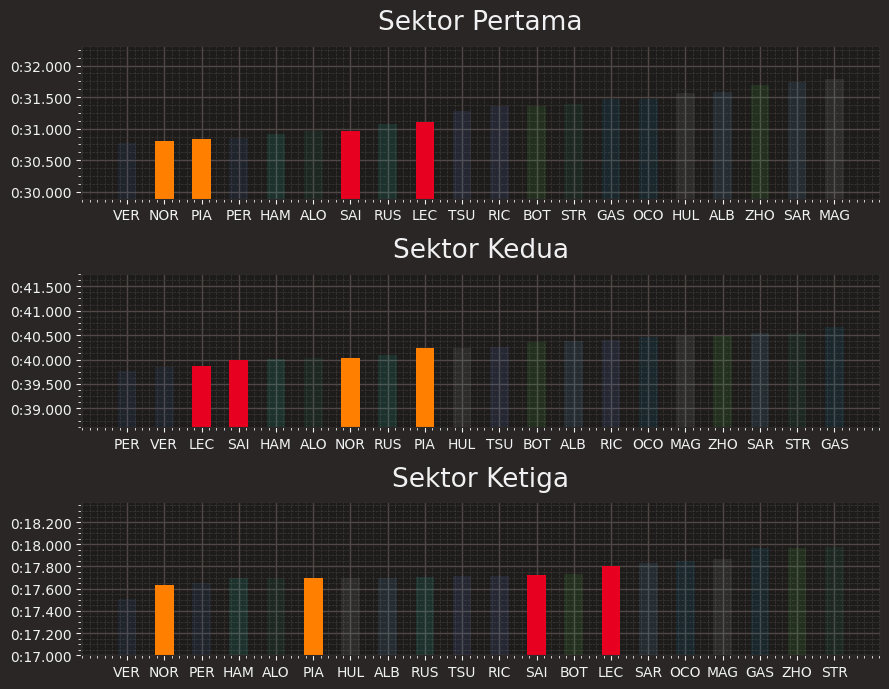

In [26]:
fig,ax=plt.subplots(3,1,figsize=(9,7))
fast_agg.sort_values('BestS1',inplace=True)
for i,row in fast_agg.iterrows():
    if row['Team'] in ['Ferrari','McLaren']:
        alphaVar=1
    else:
        alphaVar=0.1
    #bottom=np.zeros(len(fast_agg)).astype('<m8[ns]')
    ax[0].bar(x=row['Driver'],height=row['BestS1'],width=0.5,color=row['teamColor'],alpha=alphaVar)
    #bottom+=row['BestS1'].to_numpy()
    y1,y2=ax[0].get_ylim()
    y1=y2*0.925
    #y2=y2*0.955
    ax[0].set_ylim(y1,y2)
fast_agg.sort_values('BestS2',inplace=True)
for i,row in fast_agg.iterrows():
    if row['Team'] in ['Ferrari','McLaren']:
        alphaVar=1
    else:
        alphaVar=0.1
    ax[1].bar(x=row['Driver'],height=row['BestS2'],width=0.5,color=row['teamColor'],alpha=alphaVar)
    #bottom+=row['BestS2'].to_numpy()
    y1,y2=ax[1].get_ylim()
    y1=y2*0.925
    #y2=y2*0.955
    ax[1].set_ylim(y1,y2)
fast_agg.sort_values('BestS3',inplace=True)
for i,row in fast_agg.iterrows():
    if row['Team'] in ['Ferrari','McLaren']:
        alphaVar=1
    else:
        alphaVar=0.1
    ax[2].bar(x=row['Driver'],height=row['BestS3'],width=0.5,color=row['teamColor'],alpha=alphaVar)
    y1,y2=ax[2].get_ylim()
    y1=y2*0.925
    #y2=y2*0.955
    ax[2].set_ylim(y1,y2)
ax[0].set_title('Sektor Pertama')
ax[1].set_title('Sektor Kedua')
ax[2].set_title('Sektor Ketiga')
colors = drs_group[['teamName','teamColor']].drop_duplicates().set_index('teamName').to_dict()['teamColor']
labels = list(colors.keys())[::-1]
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#fig.legend(handles, labels)
fig.tight_layout()
plt.show()

In [22]:
japgp24_race=fastf1.get_session(2024,'japan','r')
japgp24_race.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule


core           INFO 	Loading data for Japanese Grand Prix - Race [v3.3.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']


In [23]:
laps_corrected=pd.DataFrame()
for drv in japgp24_race.drivers:
    df=(japgp24_race.laps.pick_driver(drv)['LapNumber']-1)*(101/japgp24_race.total_laps)*35

    df[:]=df[::-1]
    df=df.apply(lambda x: timedelta(milliseconds=x))


    laps=pd.DataFrame(japgp24_race.laps.pick_driver(drv))
    laps['fuel_corrected_laptime']=(laps['LapTime'])-df
    
    laps_corrected=pd.concat([laps_corrected,laps])


C:\Users\haryo\AppData\Local\Temp\ipykernel_10812\2000430164.py:8: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  tyreAlphas=pd.concat([tyreAlphas,(alphas-(alphas.min()-2))/(alphas.max()-(alphas.min()-2))])


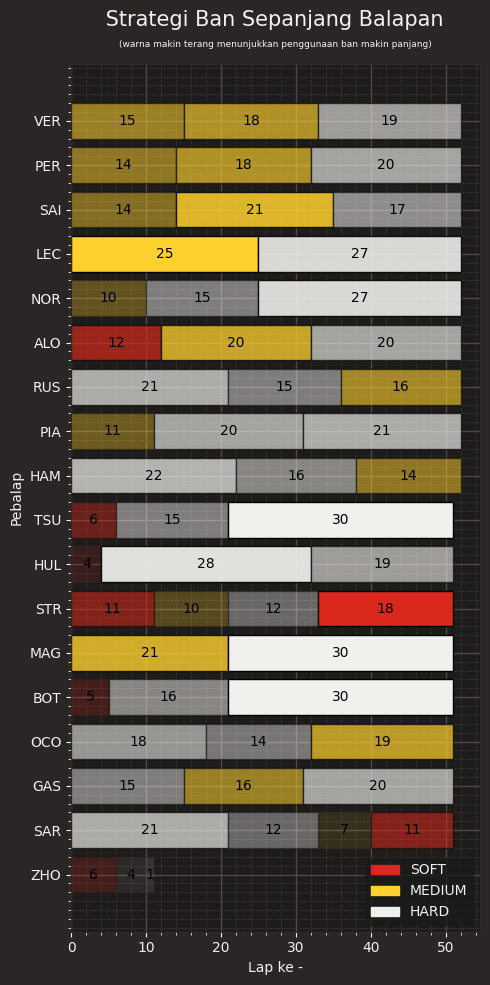

In [24]:
japgp_tyre=laps_corrected[['Driver','DriverNumber','LapNumber','Compound','TyreLife','Stint','FreshTyre']]
japgp_tyre=japgp_tyre.drop(japgp_tyre[japgp_tyre['LapNumber']<2].index)
japgp_tyre=japgp_tyre.groupby(['Driver','DriverNumber','Compound','Stint','FreshTyre']).agg({'LapNumber':'count','TyreLife':'max'}).sort_values(by=['Driver','DriverNumber','Stint']).reset_index()
tyregroup=japgp_tyre[['Driver','Compound','TyreLife']].groupby('Compound')
tyreAlphas=pd.Series()
for i,group in tyregroup:
    alphas=group['TyreLife']
    tyreAlphas=pd.concat([tyreAlphas,(alphas-(alphas.min()-2))/(alphas.max()-(alphas.min()-2))])
japgp_tyre=japgp_tyre.merge(pd.DataFrame(tyreAlphas),left_index=True,right_index=True).rename(columns={0:'alpha'})
fig,ax=plt.subplots(figsize=(5,10))
for driver in japgp24_race.drivers:
    driver_stints = japgp_tyre.loc[japgp_tyre["DriverNumber"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars

        bars=ax.barh(
            y=row['Driver'],
            width=row["LapNumber"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True,
            label=row['Compound'],
            alpha=row['alpha']
        )
        
        ax.bar_label(bars, label_type='center', color='black')
        
        previous_stint_end += row["LapNumber"]

ax.invert_yaxis()
tyres=pd.DataFrame(fastf1.plotting.COMPOUND_COLORS,index=[0]).T.reset_index(names='Compound')
tyresLegend=tyres[tyres['Compound'].isin(japgp_tyre['Compound'])]
colors = tyresLegend.set_index('Compound').to_dict()[0]
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)

ax.set_xlabel('Lap ke -')
ax.set_ylabel('Pebalap')

fig.suptitle('         Strategi Ban Sepanjang Balapan',fontsize=15)
ax.set_title('(warna makin terang menunjukkan penggunaan ban makin panjang)',fontsize=6.5)
fig.tight_layout()
#fig.legend(driver_stints['Compound'].unique())
plt.show()

In [25]:
median_scores=japgp_tyre[['TyreLife','Compound']].groupby('Compound').median().to_dict()['TyreLife']

C:\Users\haryo\AppData\Local\Temp\ipykernel_10812\2437362589.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pits=japgp24_race.laps.pick_drivers(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']).dropna(subset='PitInTime')[japgp24_race.laps['LapNumber']>1][['Driver','DriverNumber','LapNumber','Team']]


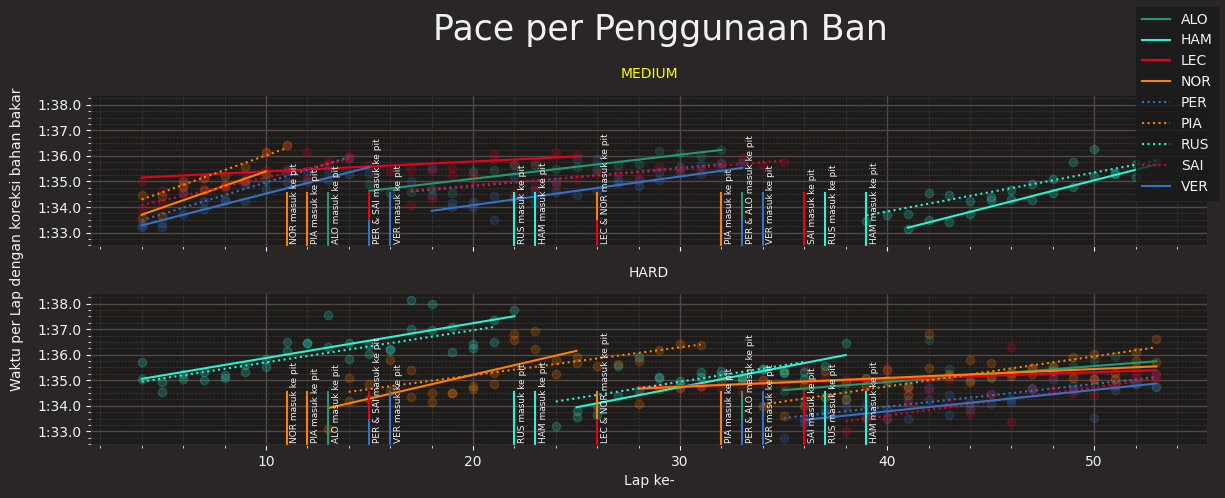

In [26]:
import datetime
pits=japgp24_race.laps.pick_drivers(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']).dropna(subset='PitInTime')[japgp24_race.laps['LapNumber']>1][['Driver','DriverNumber','LapNumber','Team']]

fig,ax=plt.subplots(2,1,sharey=True,sharex=True,figsize=(12,5))
for i,row in laps_corrected[(laps_corrected['LapNumber']>1) & (laps_corrected['IsAccurate']==True) &(laps_corrected['LapTime']<timedelta(minutes=2,seconds=0)) & (laps_corrected['Driver'].isin(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']))].iterrows():
    if row['Compound']=='MEDIUM':
        ax[0].scatter(row['LapNumber'],row['fuel_corrected_laptime'],color='#'+japgp24_race.get_driver(row['DriverNumber']).TeamColor,alpha=0.2)
    if row['Compound']=='HARD':
        ax[1].scatter(row['LapNumber'],row['fuel_corrected_laptime'],color='#'+japgp24_race.get_driver(row['DriverNumber']).TeamColor,alpha=0.2)
ax[0].set_title('MEDIUM',color='yellow',fontsize=10)
ax[1].set_xlabel('Lap ke-')
fig.text(-.01,0.23,'Waktu per Lap dengan koreksi bahan bakar',rotation=90)
ax[1].set_title('HARD',fontsize=10)
dfTeamNum=pd.DataFrame(laps_corrected)[['Driver','Team','DriverNumber']].drop_duplicates().set_index('Driver').groupby('Team').rank().reset_index()
laps_corrected_plus=dfTeamNum.rename(columns={'DriverNumber':'TeamNum'}).merge(laps_corrected, on='Driver')
stintgroups=laps_corrected_plus[(laps_corrected_plus['LapNumber']>1) & (laps_corrected_plus['IsAccurate']==True) &(laps_corrected_plus['LapTime']<timedelta(minutes=2,seconds=0)) & (laps_corrected_plus['Driver'].isin(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']))][['Stint','Compound','fuel_corrected_laptime','LapNumber','Driver','Team','TeamNum']].groupby(['Compound','Driver','Stint','Team','TeamNum'])
drvCache=[]
for i,group in stintgroups:
    if i[1] in drvCache:
        labelVar=''
    else:
        labelVar=i[1]
        drvCache.append(i[1])
    if i[4]==1:
        linestyleVar='-'
    else:
        linestyleVar=':'
   # xx = np.linspace(min(group['fuel_corrected_laptime']),max(group['fuel_corrected_laptime']), 100)
    y = group['fuel_corrected_laptime'].apply(lambda x: x.total_seconds())
    a, b = np.polyfit(group['LapNumber'],y, 1)
    
    if i[0]=='MEDIUM':
        ax[0].plot(group['LapNumber'], pd.Series(a*group['LapNumber']+b).apply(lambda x: datetime.timedelta(seconds=x)),color='#'+japgp24_race.get_driver(i[1]).TeamColor,linestyle=linestyleVar,label=labelVar)
    if i[0]=='HARD':
        ax[1].plot(group['LapNumber'], pd.Series(a*group['LapNumber']+b).apply(lambda x: datetime.timedelta(seconds=x)),color='#'+japgp24_race.get_driver(i[1]).TeamColor,linestyle=linestyleVar,label=labelVar)
pits_grouped=pits.groupby('LapNumber')
for ax in ax:

    for i,group in pits_grouped:
        
        group.reset_index(inplace=True)
        if len(group['Driver'])==2:
            ax.axvline(x=group['LapNumber'][0],color='#'+japgp24_race.get_driver(group['DriverNumber'][0]).TeamColor,ymax=0.35/2)
            ax.axvline(x=group['LapNumber'][0],color='#'+japgp24_race.get_driver(group['DriverNumber'][1]).TeamColor,ymin=0.35/2,ymax=0.35)
            ax.text(group['LapNumber'][0]+0.17, 0.001071, f"{group['Driver'][0]} & {group['Driver'][1]} masuk ke pit", rotation=90, verticalalignment='bottom',fontsize=6.5)
        else:
            for i,row in group.iterrows():
                ax.axvline(x=row['LapNumber'],color='#'+japgp24_race.get_driver(row['DriverNumber']).TeamColor,ymax=0.35)
                ax.text(row['LapNumber']+0.17, 0.001071, f"{row['Driver']} masuk ke pit", rotation=90, verticalalignment='bottom',fontsize=6.5)
fig.suptitle('       Pace per Penggunaan Ban',fontsize=25)

fig.tight_layout()
fig.legend()

plt.show()

f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 69.8% of the points cannot be placed; y

(250.0, 350.0)

f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.5% of the points cannot be placed; y

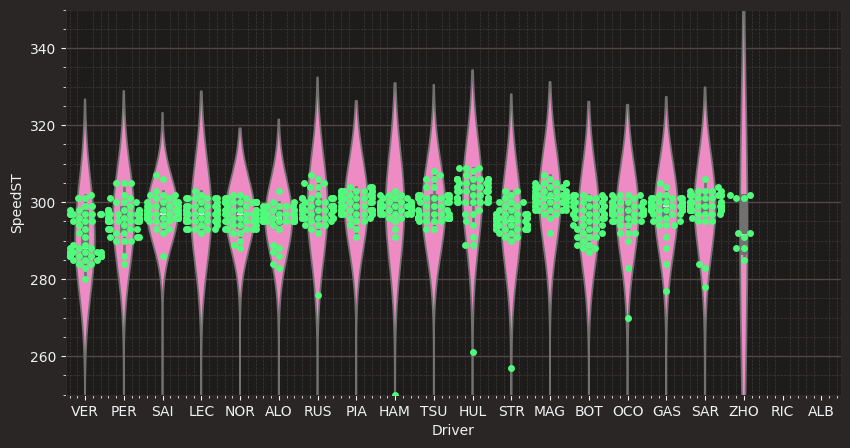

In [27]:
fig,ax=plt.subplots(figsize=(10,5))
sns.violinplot(x='Driver',y='SpeedST',data=laps_corrected,ax=ax)
sns.swarmplot(x='Driver',y='SpeedST',data=laps_corrected,ax=ax)
ax.set_ylim(250,350)

In [28]:
lap=[]
drivers=[]
throttleDuration=[]
for driver in japgp24_race.drivers:
    
    for laps in range(2,japgp24_race.total_laps):
        drivers.append(japgp24_race.get_driver(driver).Abbreviation)
        lap.append(laps)
        try:
            test=pd.DataFrame(japgp24_race.laps.pick_driver(driver).pick_lap(laps).get_telemetry())[['Throttle','Time']]
        except:
            throttleDuration.append(None)
            continue
        
        index=0
        isFullThrottle=[]
        for i,row in test.iterrows():
            if i==2 and row['Throttle']>=98:
                index+=1
                isFullThrottle.append(index)
            elif row['Throttle']>=98 and test['Throttle'][i-1]<98:
                index+=1
                isFullThrottle.append(index)
            elif row['Throttle']>=98:
                isFullThrottle.append(index)
            else:
                isFullThrottle.append(None)
        test['fullThrottleIndex']=isFullThrottle
        test_group=test.groupby('fullThrottleIndex')
        total_time=datetime.timedelta()
        for i,group in test_group:
            total_time+=getDuration(group['Time'])
        throttleDuration.append(total_time)
test_dic=zip(lap,drivers,throttleDuration)   

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [29]:
dfThrottle=pd.DataFrame(list(test_dic)).rename(columns={0:'LapNumber',1:'Driver',2:'FullThrottleDuration'})

In [30]:
dfThrottle['tc']=dfThrottle['Driver'].apply(lambda x: '#'+japgp24_race.get_driver(x).TeamColor)

In [31]:
dfThrottle=dfThrottle.merge(japgp24_race.laps[['LapTime','LapNumber','Driver']], on=['LapNumber','Driver']).dropna()
dfThrottle['PercentFullThrottle']=(dfThrottle['FullThrottleDuration']/dfThrottle['LapTime'])*100

C:\Users\haryo\AppData\Local\Temp\ipykernel_10812\1649333448.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pits=japgp24_race.laps.pick_drivers(['NOR','LEC','SAI','PIA','VER']).dropna(subset='PitInTime')[japgp24_race.laps['LapNumber']>1][['Driver','DriverNumber','LapNumber']]


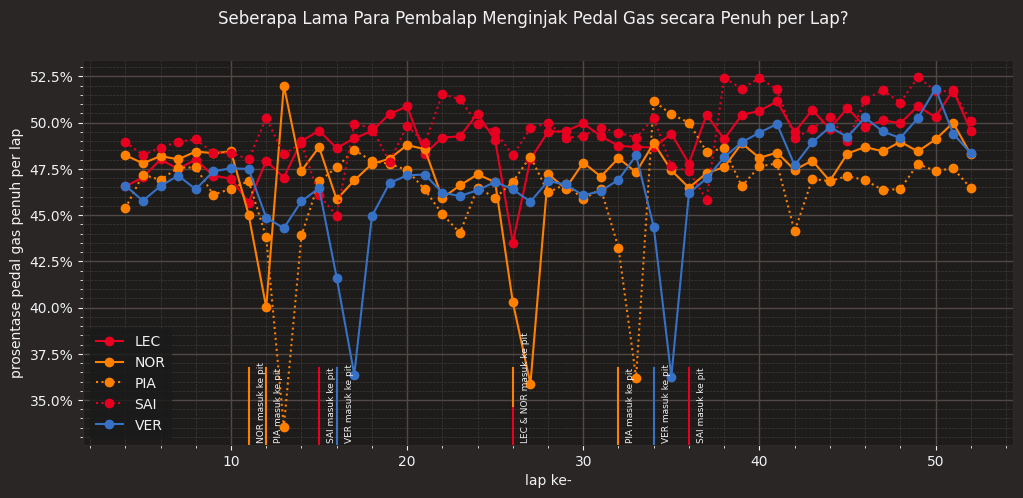

In [14]:
fig,ax=plt.subplots(figsize=(12,5))
#sns.lineplot(data=dfThrottle,x='LapNumber',y='FullThrottleDuration',hue='Driver',ax=ax,marker='o')
pits=japgp24_race.laps.pick_drivers(['NOR','LEC','SAI','PIA','VER']).dropna(subset='PitInTime')[japgp24_race.laps['LapNumber']>1][['Driver','DriverNumber','LapNumber']]
tcCache=[]
dfThrottleViz=dfThrottle[(dfThrottle['LapNumber']>=4) & (dfThrottle['Driver'].isin(['NOR','LEC','SAI','PIA','VER']))]
for i,group in dfThrottleViz.groupby(['Driver','tc']):
    if i[1] in tcCache:
        linestyleVar=':'
    else:
        linestyleVar='-'
    tcCache.append(i[1])
    ax.plot(group['LapNumber'],group['PercentFullThrottle'],color=i[1],label=i[0],marker='o',linestyle=linestyleVar)
    pits_grouped=pits.groupby('LapNumber')

for i,group in pits_grouped:
    group.reset_index(inplace=True)
    if len(group['Driver'])==2:
        ax.axvline(x=group['LapNumber'][0],color='#'+japgp24_race.get_driver(group['DriverNumber'][0]).TeamColor,ymax=0.2/2)
        ax.axvline(x=group['LapNumber'][0],color='#'+japgp24_race.get_driver(group['DriverNumber'][1]).TeamColor,ymin=0.2/2,ymax=0.2)
        ax.text(group['LapNumber'][0]+0.45, 32.7, f"{group['Driver'][0]} & {group['Driver'][1]} masuk ke pit", rotation=90, verticalalignment='bottom',fontsize=6.5)
    else:
        for i,row in group.iterrows():
            ax.axvline(x=row['LapNumber'],color='#'+japgp24_race.get_driver(row['DriverNumber']).TeamColor,ymax=0.2)
            ax.text(row['LapNumber']+0.45, 32.7, f"{row['Driver']} masuk ke pit", rotation=90, verticalalignment='bottom',fontsize=6.5)
from matplotlib.ticker import PercentFormatter
fig.suptitle('Seberapa Lama Para Pembalap Menginjak Pedal Gas secara Penuh per Lap?')
ax.yaxis.set_major_formatter(PercentFormatter())
ax.set_ylabel('prosentase pedal gas penuh per lap')
ax.set_xlabel('lap ke-')

ax.legend()

In [15]:
NOR=japgp24_race.laps.pick_drivers('NOR').pick_lap(20).get_telemetry()[['Throttle','Brake','Distance','Speed']]
LEC=japgp24_race.laps.pick_drivers('LEC').pick_lap(20).get_telemetry()[['Throttle','Brake','Distance','Speed']]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


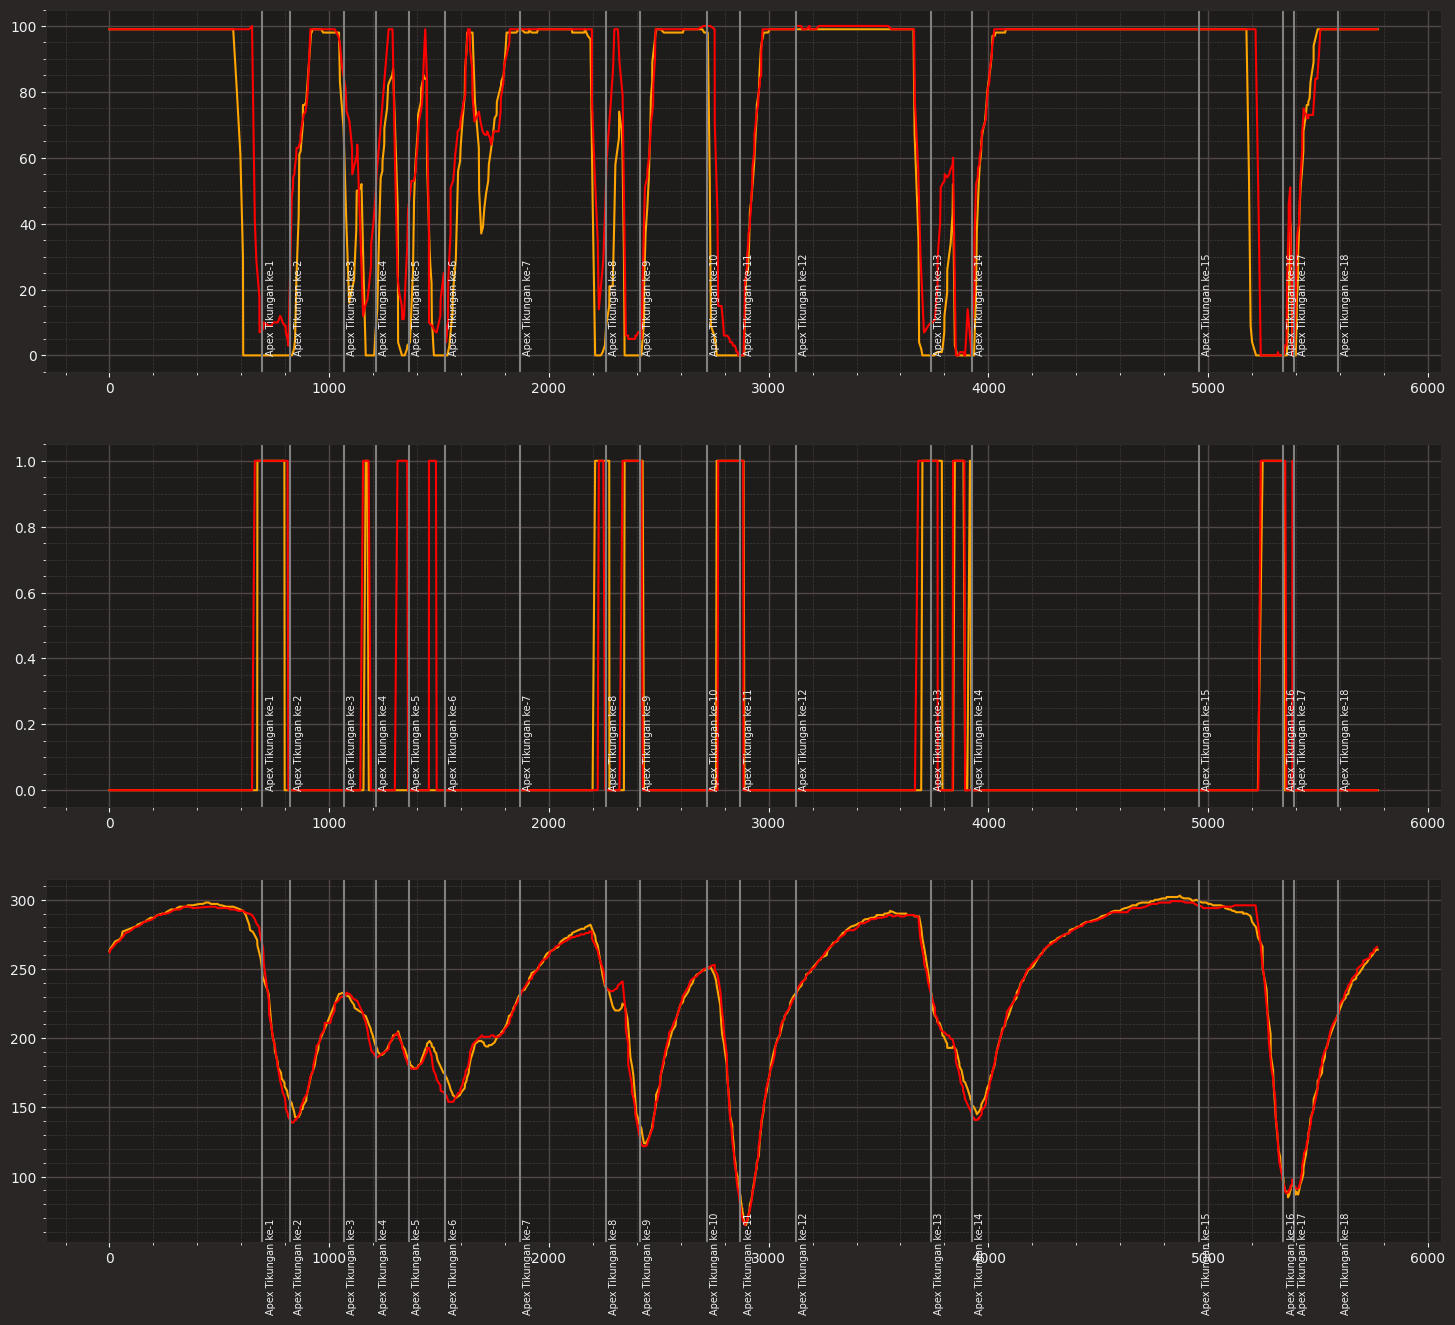

In [16]:
fig,axs=plt.subplots(3,1,figsize=(18,16))
axs[0].plot(NOR['Distance'],NOR['Throttle'],linestyle='-',color='orange')
axs[0].plot(LEC['Distance'],LEC['Throttle'],linestyle='-',color='red')
for i,dist in enumerate(japgp24_race.get_circuit_info().corners['Distance']):
        axs[0].axvline(x=dist,color='gray')
        axs[0].text(dist+15, 0, f"Apex Tikungan ke-{i+1}", rotation=90, verticalalignment='bottom',fontsize=7)
axs[1].plot(NOR['Distance'],NOR['Brake'],linestyle='-',color='orange')
axs[1].plot(LEC['Distance'],LEC['Brake'],linestyle='-',color='red')
for i,dist in enumerate(japgp24_race.get_circuit_info().corners['Distance']):
        axs[1].axvline(x=dist,color='gray')
        axs[1].text(dist+15, 0, f"Apex Tikungan ke-{i+1}", rotation=90, verticalalignment='bottom',fontsize=7)
axs[2].plot(NOR['Distance'],NOR['Speed'],linestyle='-',color='orange')
axs[2].plot(LEC['Distance'],LEC['Speed'],linestyle='-',color='red')
for i,dist in enumerate(japgp24_race.get_circuit_info().corners['Distance']):
        axs[2].axvline(x=dist,color='gray')
        axs[2].text(dist+15, 0, f"Apex Tikungan ke-{i+1}", rotation=90, verticalalignment='bottom',fontsize=7)

In [17]:
teamsColor={row['Team']:'#'+japgp24_race.get_driver(row['Driver']).TeamColor for i,row in pd.DataFrame(japgp24_race.laps[['Team','Driver']]).iterrows()} 

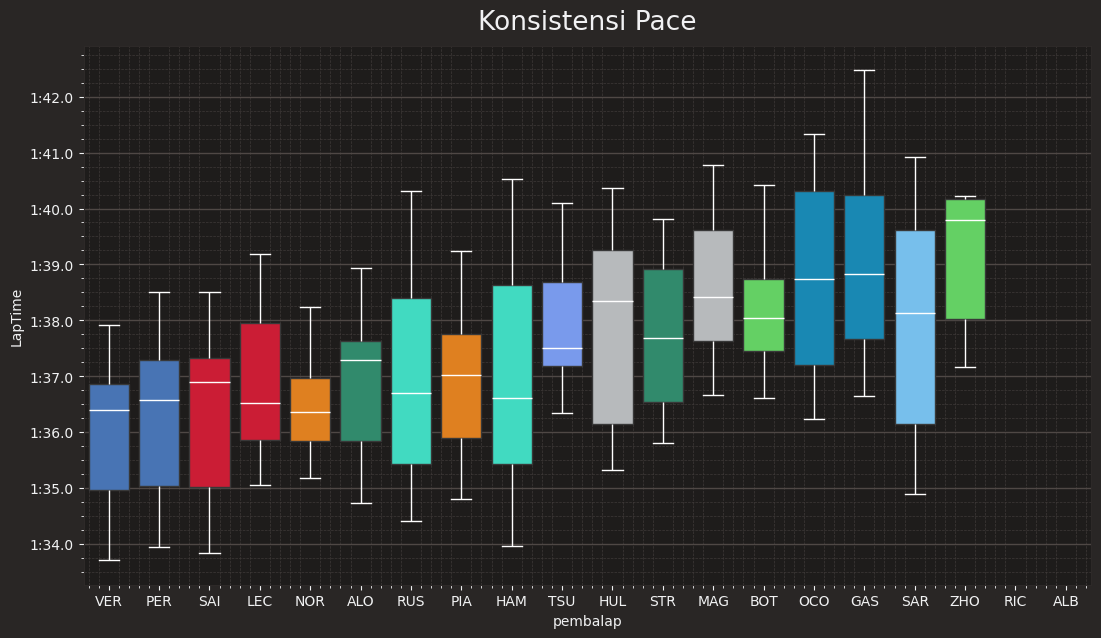

In [18]:
from scipy.interpolate import make_interp_spline
fig,axs=plt.subplots(figsize=(13,7))
sns.boxplot(data=japgp24_race.laps.pick_wo_box(),x='Driver',y='LapTime',hue='Team',legend=False,palette=teamsColor,ax=axs,showfliers=False)
lines=axs.lines
for i in lines:
    i.set_color('w')
axs.set_title('Konsistensi Pace')
axs.set_xlabel('pembalap')
axs.invert_yaxis()


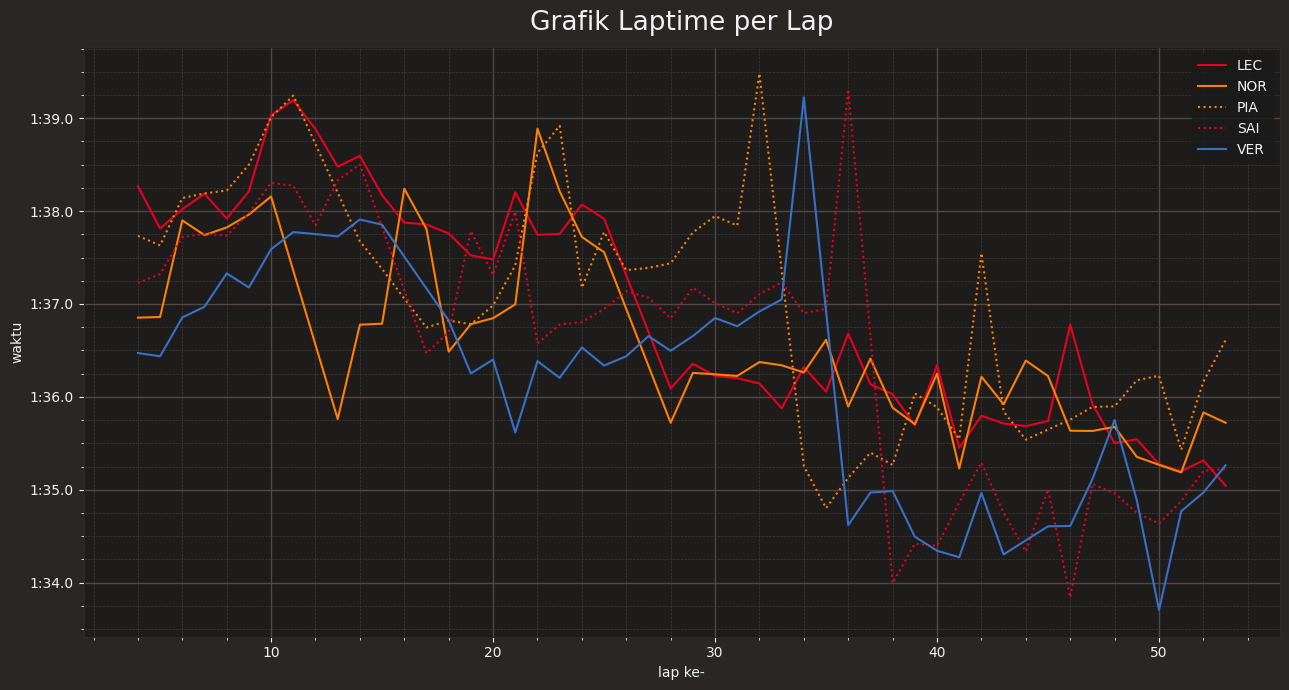

In [19]:
laps_corrected_lim=laps_corrected[laps_corrected['LapTime']<datetime.timedelta(minutes=1,seconds=40)]
fig,axs=plt.subplots(figsize=(13,7))
cacheTeam=[]
for index,group in laps_corrected_lim[laps_corrected_lim['Driver'].isin(['NOR','VER','LEC','SAI','PIA'])][['LapTime','LapNumber','Driver','DriverNumber','Team']].groupby(['Driver','DriverNumber','Team']):
    if index[2] in cacheTeam:
        linestyleVar=':'
    else:
        linestyleVar='-'
        cacheTeam.append(index[2])
    
    X_Y_Spline = make_interp_spline(group['LapNumber'], group['LapTime'])
    X_ = np.linspace(group['LapNumber'].min(), group['LapNumber'].max(), 500)
    Y_ = X_Y_Spline(X_)
    axs.plot(group['LapNumber'], group['LapTime'],color='#'+japgp24_race.get_driver(index[1]).TeamColor,linestyle=linestyleVar,label=index[0])
#sns.lineplot(data=laps_corrected_lim[laps_corrected_lim['LapNumber']>3],y='LapTime',x='LapNumber',hue='Driver',ax=axs[1],palette=teamsColor)
#axs[1].set_ylim(0.00107,0.00116)
#fig.suptitle('Konsistensi Pace')

axs.set_title('Grafik Laptime per Lap')
axs.set_ylabel('waktu')

axs.set_ylabel('waktu')
axs.set_xlabel('lap ke-')

axs.legend()
fig.tight_layout()

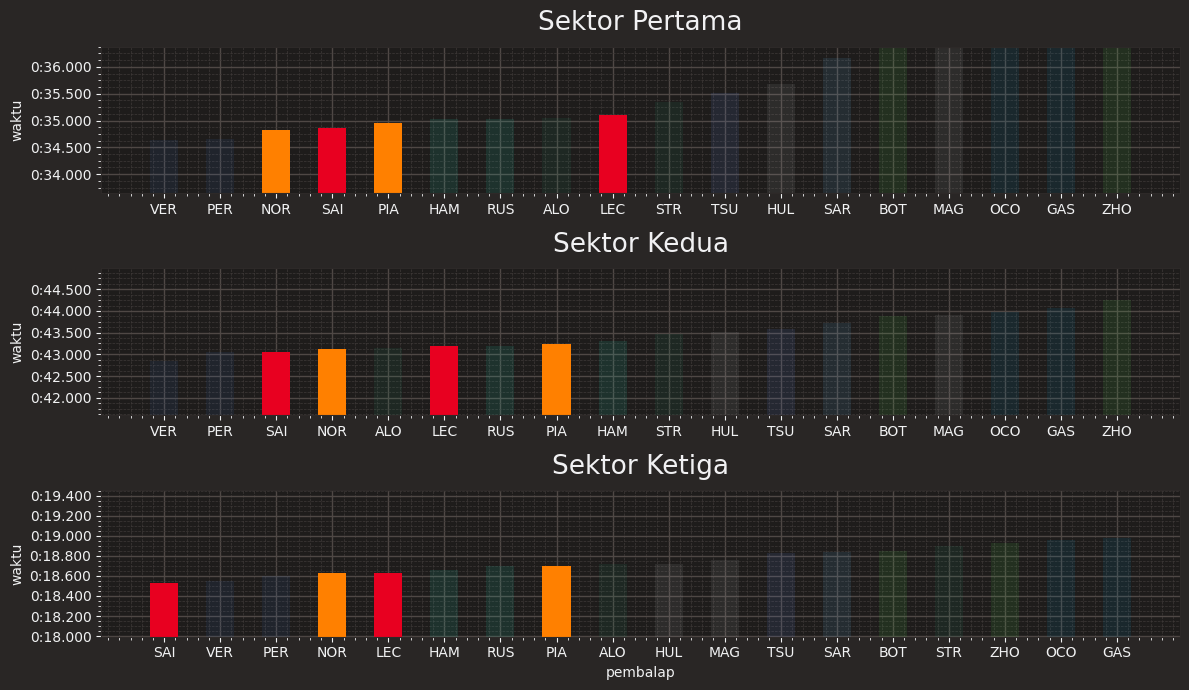

In [30]:
#TODO: SECTOR COMP BETWEEN QUALI AND RACING MCL AND FERRARI
fig,axs=plt.subplots(3,1,figsize=(12,7))
dfSectors=japgp24_race.laps.pick_accurate().pick_wo_box()[['Driver','Sector1Time','Sector2Time','Sector3Time','Team']].groupby(['Driver','Team']).mean().reset_index()
dfSectors['teamColors']=dfSectors['Driver'].apply(lambda x: '#'+japgp24_race.get_driver(x).TeamColor)
dfSectors.sort_values('Sector1Time',inplace=True)
for i,row in dfSectors.iterrows():
    if row['Team'] in ['Ferrari','McLaren']:
        alphaVar=1
    else:
        alphaVar=0.1
    axs[0].bar(x=row['Driver'],height=row['Sector1Time'],width=0.5,color=row['teamColors'],alpha=alphaVar)
    #bottom+=row['BestS1'].to_numpy()
    y1,y2=axs[0].get_ylim()
    y1=y2*0.925
    #y2=y2*0.955
    axs[0].set_ylim(y1,y2)
dfSectors.sort_values('Sector2Time',inplace=True)
for i,row in dfSectors.iterrows():
    if row['Team'] in ['Ferrari','McLaren']:
        alphaVar=1
    else:
        alphaVar=0.1
    axs[1].bar(x=row['Driver'],height=row['Sector2Time'],width=0.5,color=row['teamColors'],alpha=alphaVar)
    #bottom+=row['BestS1'].to_numpy()
    y1,y2=axs[1].get_ylim()
    y1=y2*0.925
    #y2=y2*0.955
    axs[1].set_ylim(y1,y2)
dfSectors.sort_values('Sector3Time',inplace=True)
for i,row in dfSectors.iterrows():
    if row['Team'] in ['Ferrari','McLaren']:
        alphaVar=1
    else:
        alphaVar=0.1
    axs[2].bar(x=row['Driver'],height=row['Sector3Time'],width=0.5,color=row['teamColors'],alpha=alphaVar)
    #bottom+=row['BestS1'].to_numpy()
    y1,y2=axs[2].get_ylim()
    y1=y2*0.925
    #y2=y2*0.955
    axs[2].set_ylim(y1,y2)
axs[1].set_ylabel('waktu')
axs[0].set_ylabel('waktu')
axs[2].set_ylabel('waktu')
axs[0].set_title('Sektor Pertama')
axs[1].set_title('Sektor Kedua')
axs[2].set_title('Sektor Ketiga')
axs[2].set_xlabel('pembalap')
fig.tight_layout()



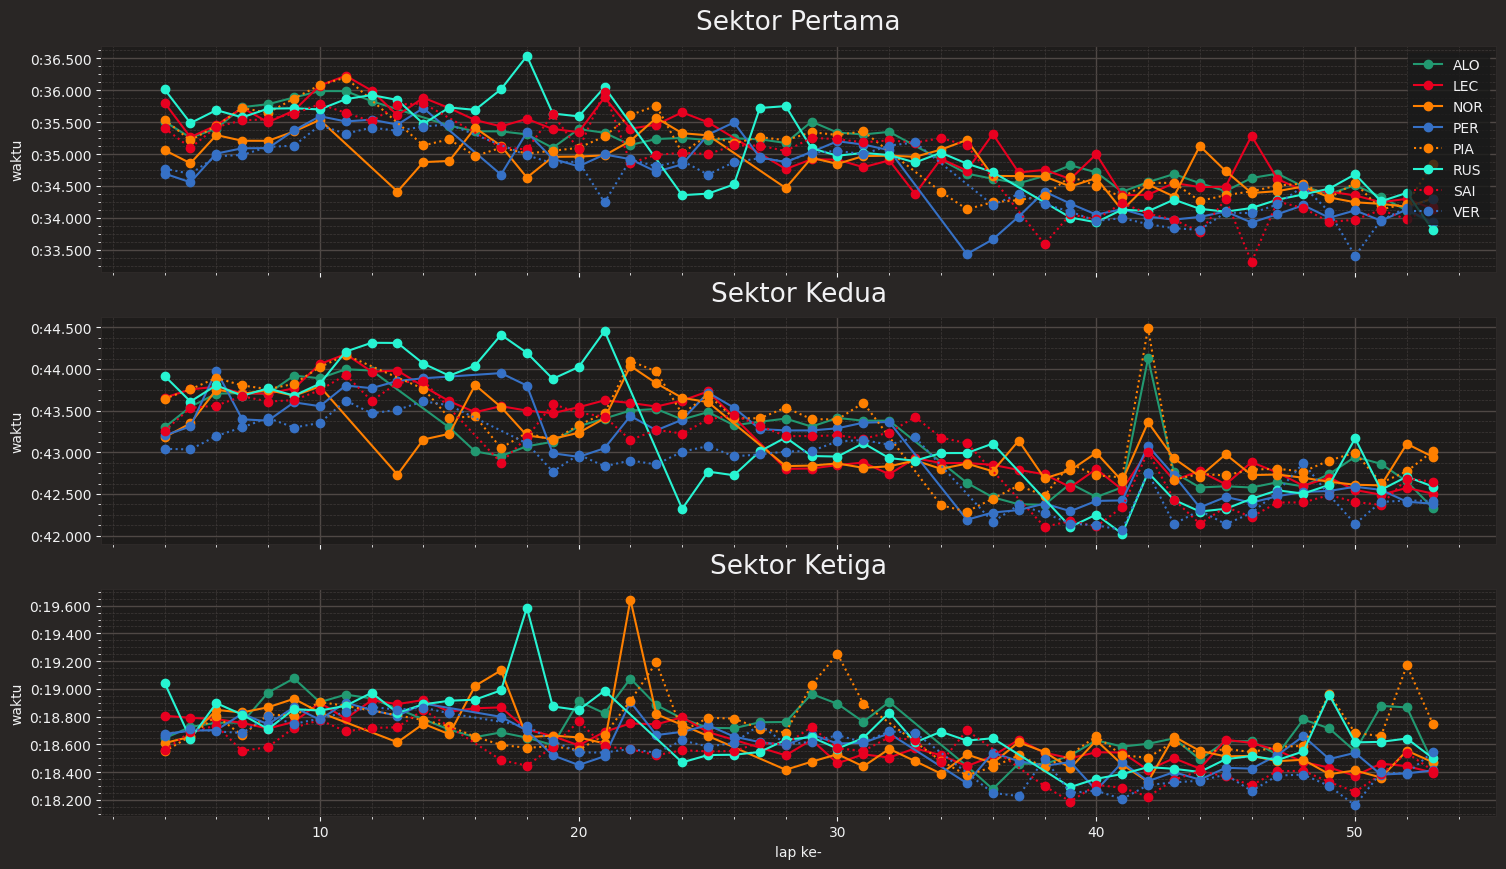

In [29]:
ranks=pd.DataFrame()
for Lap,group in pd.DataFrame(japgp24_race.laps.pick_accurate().pick_wo_box()[['Driver','LapNumber','Sector1Time','Sector2Time','Sector3Time','Team']]).groupby('LapNumber'):
    group['LapNumber']=Lap
    group.set_index(['LapNumber','Driver','Team'],inplace=True)
    ranks=pd.concat([ranks,group.rank(method='dense')])
ranks=ranks.reset_index()

fig,axs=plt.subplots(3,1,figsize=(18,10),sharex=True)
teamCache=[]
for i,group in japgp24_race.laps.pick_accurate().pick_wo_box()[['Driver','LapNumber','Sector1Time','Sector2Time','Sector3Time','Team']].groupby(['Driver','Team']):
    if i[0] not in ['VER','PER','SAI','LEC','PIA','NOR','ALO','RUS']:
        continue
    if i[1] in teamCache:
        linestyleVar=':'
    else:
        linestyleVar='-'
        teamCache.append(i[1])
    axs[0].plot(group['LapNumber'],group['Sector1Time'],marker='o',linestyle=linestyleVar,color='#'+japgp24_race.get_driver(i[0]).TeamColor,label=i[0])
    
teamCache=[]
for i,group in japgp24_race.laps.pick_accurate().pick_wo_box()[['Driver','LapNumber','Sector1Time','Sector2Time','Sector3Time','Team']].groupby(['Driver','Team']):
    if i[0] not in ['VER','PER','SAI','LEC','PIA','NOR','ALO','RUS']:
        continue
    if i[1] in teamCache:
        linestyleVar=':'
    else:
        linestyleVar='-'
        teamCache.append(i[1])
    axs[1].plot(group['LapNumber'],group['Sector2Time'],marker='o',linestyle=linestyleVar,color='#'+japgp24_race.get_driver(i[0]).TeamColor,label=i[0])
    
teamCache=[]
for i,group in japgp24_race.laps.pick_accurate().pick_wo_box()[['Driver','LapNumber','Sector1Time','Sector2Time','Sector3Time','Team']].groupby(['Driver','Team']):
    if i[0] not in ['VER','PER','SAI','LEC','PIA','NOR','ALO','RUS']:
        continue
    if i[1] in teamCache:
        linestyleVar=':'
    else:
        linestyleVar='-'
        teamCache.append(i[1])
    axs[2].plot(group['LapNumber'],group['Sector3Time'],marker='o',linestyle=linestyleVar,color='#'+japgp24_race.get_driver(i[0]).TeamColor,label=i[0])
axs[1].set_ylabel('waktu')
axs[0].set_ylabel('waktu')
axs[2].set_ylabel('waktu')
axs[0].set_title('Sektor Pertama')
axs[1].set_title('Sektor Kedua')
axs[2].set_title('Sektor Ketiga')
axs[2].set_xlabel('lap ke-')
axs[0].legend()


In [87]:
#SPEED DOMINANCE
alorus_telem=pd.DataFrame()
for drv in japgp24_race.drivers:
    try:
        tmp_df=pd.DataFrame(japgp24_race.laps.pick_driver(drv).pick_fastest().get_telemetry())
    except:
        continue
    tmp_df['drvNum']=float(japgp24_race.get_driver(drv).DriverNumber)
    tmp_df['tc']='#'+japgp24_race.get_driver(drv).TeamColor
    tmp_df['drv']=japgp24_race.get_driver(drv).Abbreviation
    alorus_telem=pd.concat([alorus_telem,tmp_df])

#alorus_telem=alorus_telem.query("DRS in [0,1,2,3,8]")

alorus_telem.loc[:,'miniSect']=np.round(alorus_telem['RelativeDistance'].to_numpy()/(1/20))+1

alorus_speed=alorus_telem[['Speed','miniSect','drv','drvNum','tc']]

dfSpeed=alorus_speed.sort_values('Speed').drop_duplicates(subset='miniSect', keep='last').sort_values('miniSect').reset_index(drop=True)
listProp=dfSpeed[['drv','tc']].value_counts(['drv','tc'],normalize=True).reset_index()

single_lap = pd.DataFrame(japgp24_race.laps.pick_driver('PER').pick_fastest().get_telemetry())[['X','Y','RelativeDistance']]
single_lap['miniSect']=single_lap['RelativeDistance'].apply(lambda x: int(x/(1/20))+1)
single_lap=single_lap.merge(dfSpeed,on='miniSect')
single_lap=single_lap.merge(single_lap[['drv']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'id'}),on='drv')#id dari 0
single_lap['tc']=single_lap['drv'].apply(lambda x:'#'+japgp24_race.get_driver(x).TeamColor)
single_lap=single_lap.merge(single_lap[['tc']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'idTeam'}),on='tc')#id dari 0

circuit_info = japgp24_race.get_circuit_info()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

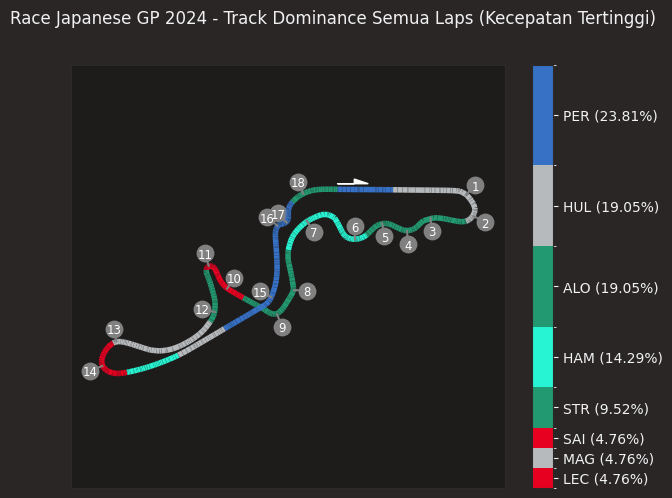

In [88]:
from matplotlib.colors import BoundaryNorm, ListedColormap
circRot=circuit_info.rotation
x,y=rotate_matrix(single_lap['X'].values,single_lap['Y'].values,circRot)


listProp.sort_values('proportion',inplace=True)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_avg=single_lap['idTeam'].to_numpy().astype(float)

#teamColor=single_lap[['id','tc']].drop_duplicates()
cmap = ListedColormap(single_lap['tc'].drop_duplicates().to_list())
lc_comp = LineCollection(segments, norm=plt.Normalize(0, cmap.N), cmap=cmap)
lc_comp.set_array(fastest_avg)
lc_comp.set_linewidth(4)


fig,ax=plt.subplots(figsize=(7,5.5))
    

fig.suptitle(
        f"Race Japanese GP 2024 - Track Dominance Semua Laps (Kecepatan Tertinggi)"
    )
        
ax.add_collection(lc_comp)
ax.axis('equal')
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

offset_vector = [700, 0] 
# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=math.radians(circRot))

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=math.radians(circRot))

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')
    

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
plt.arrow(x[0],y[0]+300,+900,0,color='white',shape='right',head_width=500)
bounds=[i*10 for i in(listProp.sort_values('proportion')['proportion'].to_list())]
bounds.insert(0,0)
boundsx=[]
mem=0
for i in bounds:
    i+=mem
    mem=i
    boundsx.append(i)


cmap = ListedColormap(listProp['tc'].to_list())
norm = BoundaryNorm(boundsx, cmap.N)

cbar=fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ax=ax,spacing='proportional')
initial=0
ticksList=[]
for i in listProp['proportion']:
    if i!=0:
        ticksList.append((((i*10)/2)+initial))
        initial+=i*10

cbar.set_ticks(ticksList)
#listProp['bounds']=boundsx
labels=[]
for j,k in listProp.iterrows():
    label=f'{k["drv"]} ({round(k["proportion"]*100,2)}%)'
    labels.append(label)

cbar.set_ticklabels(labels)#ambil driver name dari variabel!!!
plt.xticks([])
plt.yticks([])
plt.show()

In [89]:
drvLaps=japgp24_race.laps[['DriverNumber','LapNumber']].groupby('DriverNumber').max()
all_race=pd.DataFrame()
for drv in japgp24_race.drivers:
    laps=japgp24_race.laps.pick_driver(drv)
    
    for i in range(1,int(drvLaps[drvLaps.index==drv]['LapNumber'].iloc[0])):
        try:
            df_temp=pd.DataFrame(laps.pick_lap(i).pick_accurate().pick_wo_box().get_telemetry())
            df_temp['drvName']=japgp24_race.get_driver(drv).Abbreviation
            df_temp['teamName']=japgp24_race.get_driver(drv).TeamName
            df_temp['teamColor']='#'+japgp24_race.get_driver(drv).TeamColor
            df_temp['LapNumber']=i
            all_race=pd.concat([all_race,df_temp])
        except:
            continue


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [90]:
all_race['miniSect']=(np.round(all_race['RelativeDistance'].to_numpy()/(1/20))+1).astype(int)
first_set=all_race[['drvName','Time','miniSect','LapNumber','teamColor']].groupby(['drvName','miniSect','LapNumber','teamColor']).agg(getDuration).reset_index()
theoretical_best_minisectors=first_set[['drvName','Time','miniSect','teamColor']].groupby(['drvName','miniSect','teamColor']).min().reset_index()
sum_tbest_minisectors=theoretical_best_minisectors.groupby('drvName').agg(IdealmSTime=('Time','sum'))
dfTime=theoretical_best_minisectors.sort_values('Time',ascending=False).drop_duplicates(subset='miniSect', keep='last').sort_values('miniSect').reset_index(drop=True)

listProp=dfTime[['drvName','teamColor']].value_counts(['drvName','teamColor'],normalize=True).reset_index()

single_lap = pd.DataFrame(japgp24_race.laps.pick_driver('PER').pick_fastest().get_telemetry())[['X','Y','RelativeDistance']]
single_lap['miniSect']=single_lap['RelativeDistance'].apply(lambda x: int(x/(1/20))+1)
single_lap=single_lap.merge(dfTime,on='miniSect')
single_lap=single_lap.merge(single_lap[['drvName']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'id'}),on='drvName')#id dari 0
single_lap['tc']=single_lap['drvName'].apply(lambda x:'#'+japgp24_race.get_driver(x).TeamColor)
single_lap=single_lap.merge(single_lap[['tc']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'idTeam'}),on='tc')#id dari 0

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


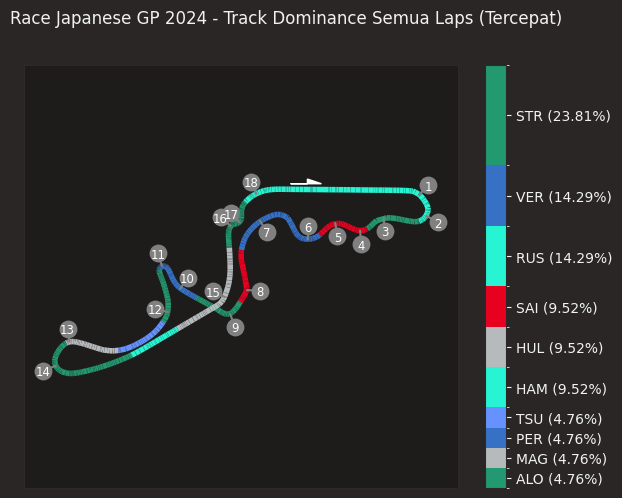

In [91]:
from matplotlib.colors import BoundaryNorm, ListedColormap
circRot=circuit_info.rotation
x,y=rotate_matrix(single_lap['X'].values,single_lap['Y'].values,circRot)


listProp.sort_values('proportion',inplace=True)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_avg=single_lap['idTeam'].to_numpy().astype(float)

#teamColor=single_lap[['id','tc']].drop_duplicates()
cmap = ListedColormap(single_lap['teamColor'].drop_duplicates().to_list())
lc_comp = LineCollection(segments, norm=plt.Normalize(0, cmap.N), cmap=cmap)
lc_comp.set_array(fastest_avg)
lc_comp.set_linewidth(4)


fig,ax=plt.subplots(figsize=(7,5.5))
    

fig.suptitle(
        f"Race Japanese GP 2024 - Track Dominance Semua Laps (Tercepat)"
    )
        
ax.add_collection(lc_comp)
ax.axis('equal')
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

offset_vector = [700, 0] 
# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=math.radians(circRot))

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=math.radians(circRot))

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')
    

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
plt.arrow(x[0],y[0]+300,+900,0,color='white',shape='right',head_width=500)
bounds=[i*10 for i in(listProp.sort_values('proportion')['proportion'].to_list())]
bounds.insert(0,0)
boundsx=[]
mem=0
for i in bounds:
    i+=mem
    mem=i
    boundsx.append(i)


cmap = ListedColormap(listProp['teamColor'].to_list())
norm = BoundaryNorm(boundsx, cmap.N)

cbar=fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ax=ax,spacing='proportional')
initial=0
ticksList=[]
for i in listProp['proportion']:
    if i!=0:
        ticksList.append((((i*10)/2)+initial))
        initial+=i*10

cbar.set_ticks(ticksList)
#listProp['bounds']=boundsx
labels=[]
for j,k in listProp.iterrows():
    label=f'{k["drvName"]} ({round(k["proportion"]*100,2)}%)'
    labels.append(label)

cbar.set_ticklabels(labels)#ambil driver name dari variabel!!!
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
china2024_r=fastf1.get_session(2024,'china','r')
china2024_r.load()

req         WARNING 	DEFAULT CACHE ENABLED! (198.4 MB) C:\Users\haryo\AppData\Local\Temp\fastf1


core           INFO 	Loading data for Chinese Grand Prix - Race [v3.3.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']


In [4]:
laps_corrected=pd.DataFrame()
for drv in china2024_r.drivers:
    df=(china2024_r.laps.pick_driver(drv)['LapNumber']-1)*(101/china2024_r.total_laps)*35

    df[:]=df[::-1]
    df=df.apply(lambda x: timedelta(milliseconds=x))


    laps=pd.DataFrame(china2024_r.laps.pick_driver(drv))
    laps['fuel_corrected_laptime']=(laps['LapTime'])-df
    
    laps_corrected=pd.concat([laps_corrected,laps])

C:\Users\haryo\AppData\Local\Temp\ipykernel_26264\2840589874.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pits=china2024_r.laps.pick_drivers(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']).dropna(subset='PitInTime')[china2024_r.laps['LapNumber']>1][['Driver','DriverNumber','LapNumber','Team']]


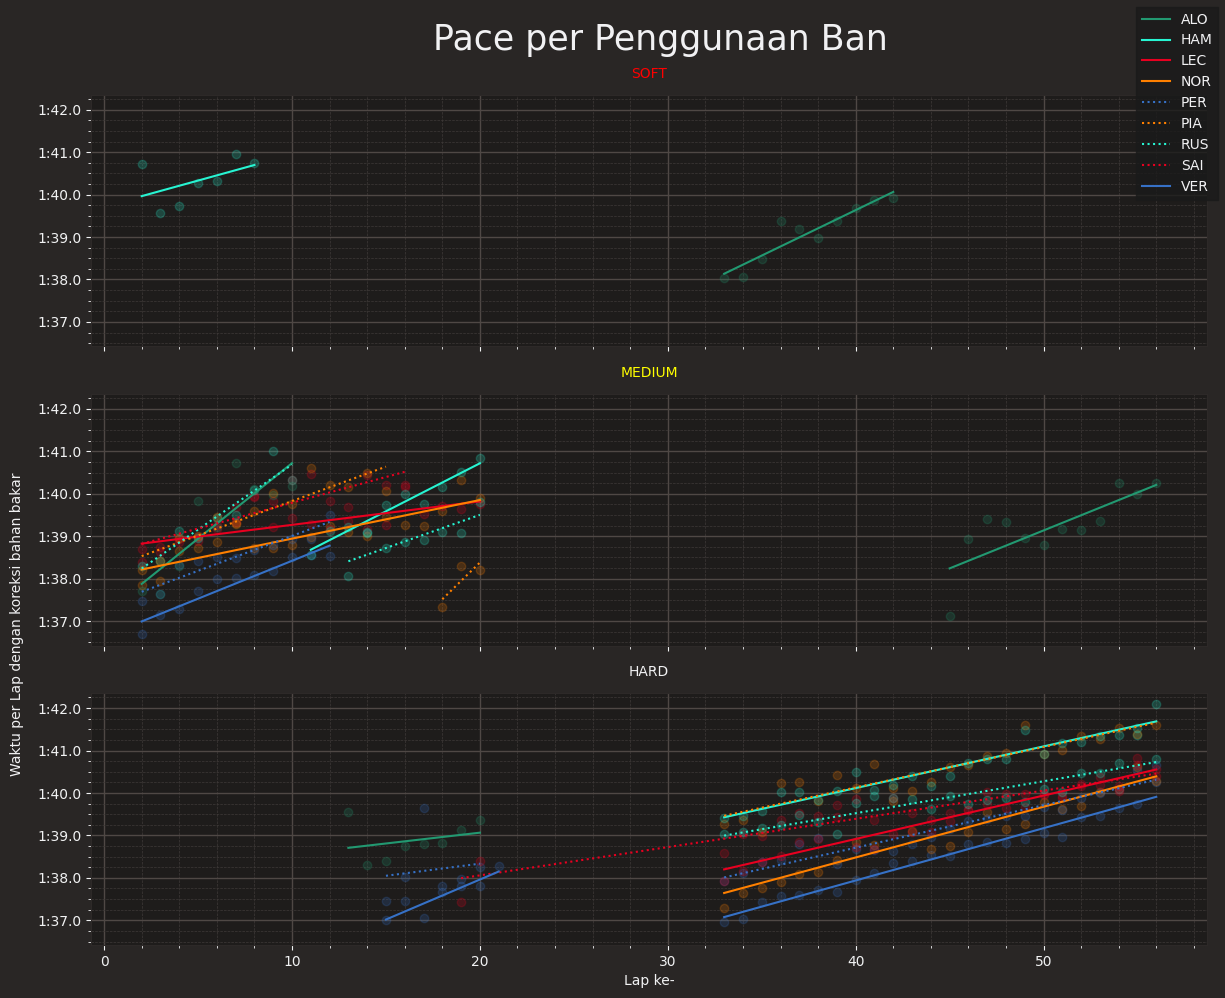

In [5]:
import datetime
pits=china2024_r.laps.pick_drivers(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']).dropna(subset='PitInTime')[china2024_r.laps['LapNumber']>1][['Driver','DriverNumber','LapNumber','Team']]

fig,ax=plt.subplots(3,1,sharey=True,sharex=True,figsize=(12,10))
for i,row in laps_corrected[(laps_corrected['LapNumber']>1) & (laps_corrected['IsAccurate']==True) &(laps_corrected['LapTime']<timedelta(minutes=2,seconds=0)) & (laps_corrected['Driver'].isin(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']))].iterrows():
    if row['Compound']=='SOFT':
        ax[0].scatter(row['LapNumber'],row['fuel_corrected_laptime'],color='#'+china2024_r.get_driver(row['DriverNumber']).TeamColor,alpha=0.2)
    if row['Compound']=='HARD':
        ax[2].scatter(row['LapNumber'],row['fuel_corrected_laptime'],color='#'+china2024_r.get_driver(row['DriverNumber']).TeamColor,alpha=0.2)
    if row['Compound']=='MEDIUM':
        ax[1].scatter(row['LapNumber'],row['fuel_corrected_laptime'],color='#'+china2024_r.get_driver(row['DriverNumber']).TeamColor,alpha=0.2)
ax[0].set_title('SOFT',color='red',fontsize=10)
ax[2].set_xlabel('Lap ke-')
fig.text(-.01,0.23,'Waktu per Lap dengan koreksi bahan bakar',rotation=90)
ax[1].set_title('MEDIUM',color='yellow',fontsize=10)
ax[2].set_title('HARD',fontsize=10)
dfTeamNum=pd.DataFrame(laps_corrected)[['Driver','Team','DriverNumber']].drop_duplicates().set_index('Driver').groupby('Team').rank().reset_index()
laps_corrected_plus=dfTeamNum.rename(columns={'DriverNumber':'TeamNum'}).merge(laps_corrected, on='Driver')
stintgroups=laps_corrected_plus[(laps_corrected_plus['LapNumber']>1) & (laps_corrected_plus['IsAccurate']==True) &(laps_corrected_plus['LapTime']<timedelta(minutes=2,seconds=0)) & (laps_corrected_plus['Driver'].isin(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']))][['Stint','Compound','fuel_corrected_laptime','LapNumber','Driver','Team','TeamNum']].groupby(['Compound','Driver','Stint','Team','TeamNum'])
drvCache=[]
for i,group in stintgroups:
    if i[1] in drvCache:
        labelVar=''
    else:
        labelVar=i[1]
        drvCache.append(i[1])
    if i[4]==1:
        linestyleVar='-'
    else:
        linestyleVar=':'
   # xx = np.linspace(min(group['fuel_corrected_laptime']),max(group['fuel_corrected_laptime']), 100)
    y = group['fuel_corrected_laptime'].apply(lambda x: x.total_seconds())
    a, b = np.polyfit(group['LapNumber'],y, 1)
    
    if i[0]=='MEDIUM':
        ax[1].plot(group['LapNumber'], pd.Series(a*group['LapNumber']+b).apply(lambda x: datetime.timedelta(seconds=x)),color='#'+china2024_r.get_driver(i[1]).TeamColor,linestyle=linestyleVar,label=labelVar)
    if i[0]=='HARD':
        ax[2].plot(group['LapNumber'], pd.Series(a*group['LapNumber']+b).apply(lambda x: datetime.timedelta(seconds=x)),color='#'+china2024_r.get_driver(i[1]).TeamColor,linestyle=linestyleVar,label=labelVar)
    if i[0]=='SOFT':
        ax[0].plot(group['LapNumber'], pd.Series(a*group['LapNumber']+b).apply(lambda x: datetime.timedelta(seconds=x)),color='#'+china2024_r.get_driver(i[1]).TeamColor,linestyle=linestyleVar,label=labelVar)
        
fig.suptitle('       Pace per Penggunaan Ban',fontsize=25)

fig.tight_layout()
fig.legend()

plt.show()


C:\Users\haryo\AppData\Local\Temp\ipykernel_26264\2273035730.py:8: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  tyreAlphas=pd.concat([tyreAlphas,(alphas-(alphas.min()-2))/(alphas.max()-(alphas.min()-2))])


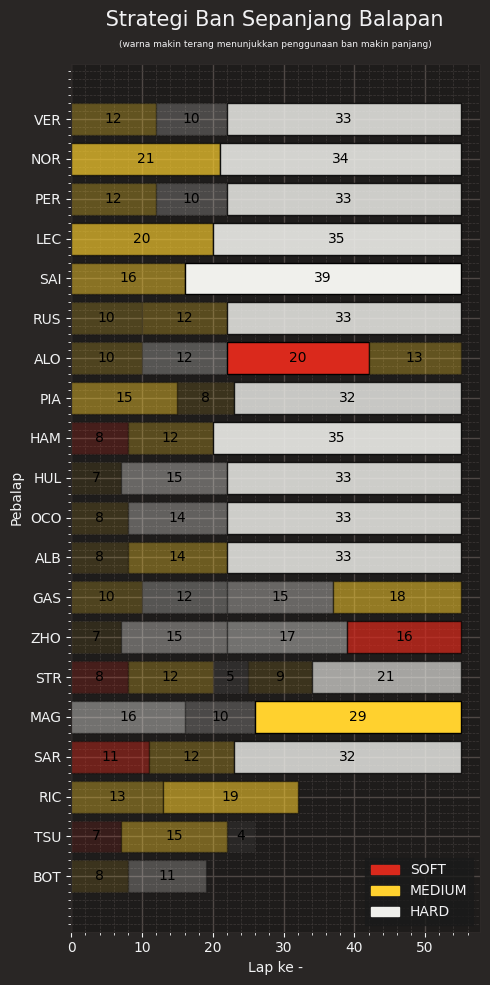

In [6]:
chinagp_tyre=laps_corrected[['Driver','DriverNumber','LapNumber','Compound','TyreLife','Stint','FreshTyre']]
chinagp_tyre=chinagp_tyre.drop(chinagp_tyre[chinagp_tyre['LapNumber']<2].index)
chinagp_tyre=chinagp_tyre.groupby(['Driver','DriverNumber','Compound','Stint','FreshTyre']).agg({'LapNumber':'count','TyreLife':'max'}).sort_values(by=['Driver','DriverNumber','Stint']).reset_index()
tyregroup=chinagp_tyre[['Driver','Compound','TyreLife']].groupby('Compound')
tyreAlphas=pd.Series()
for i,group in tyregroup:
    alphas=group['TyreLife']
    tyreAlphas=pd.concat([tyreAlphas,(alphas-(alphas.min()-2))/(alphas.max()-(alphas.min()-2))])
chinagp_tyre=chinagp_tyre.merge(pd.DataFrame(tyreAlphas),left_index=True,right_index=True).rename(columns={0:'alpha'})
fig,ax=plt.subplots(figsize=(5,10))
for driver in china2024_r.drivers:
    driver_stints = chinagp_tyre.loc[chinagp_tyre["DriverNumber"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars

        bars=ax.barh(
            y=row['Driver'],
            width=row["LapNumber"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True,
            label=row['Compound'],
            alpha=row['alpha']
        )
        
        ax.bar_label(bars, label_type='center', color='black')
        
        previous_stint_end += row["LapNumber"]

ax.invert_yaxis()
tyres=pd.DataFrame(fastf1.plotting.COMPOUND_COLORS,index=[0]).T.reset_index(names='Compound')
tyresLegend=tyres[tyres['Compound'].isin(chinagp_tyre['Compound'])]
colors = tyresLegend.set_index('Compound').to_dict()[0]
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)

ax.set_xlabel('Lap ke -')
ax.set_ylabel('Pebalap')

fig.suptitle('         Strategi Ban Sepanjang Balapan',fontsize=15)
ax.set_title('(warna makin terang menunjukkan penggunaan ban makin panjang)',fontsize=6.5)
fig.tight_layout()
#fig.legend(driver_stints['Compound'].unique())
plt.show()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

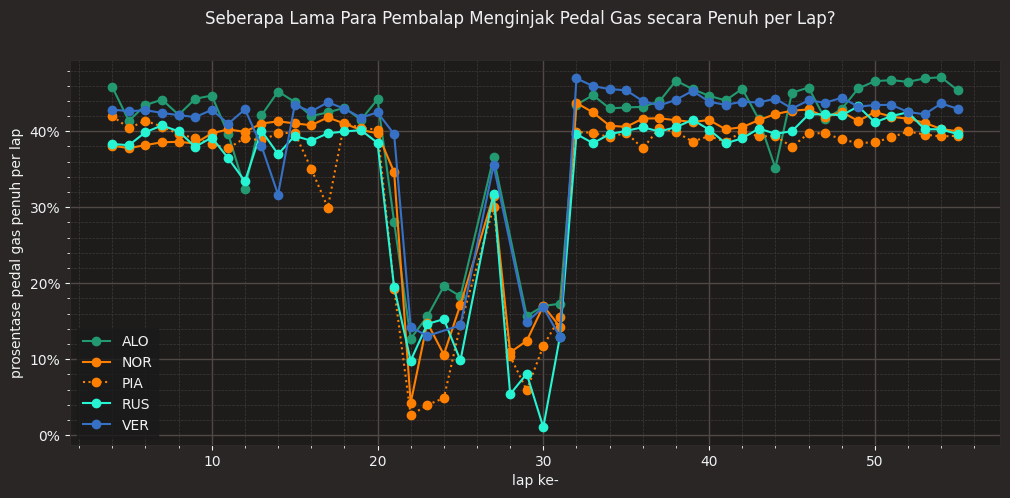

In [7]:
lap=[]
drivers=[]
throttleDuration=[]
for driver in china2024_r.drivers:
    for laps in range(2,china2024_r.total_laps):
        drivers.append(china2024_r.get_driver(driver).Abbreviation)
        lap.append(laps)
        try:
            test=pd.DataFrame(china2024_r.laps.pick_driver(driver).pick_lap(laps).get_telemetry())[['Throttle','Time']]
        except:
            throttleDuration.append(None)
            continue
        
        index=0
        isFullThrottle=[]
        for i,row in test.iterrows():
            if i==2 and row['Throttle']>=98:
                index+=1
                isFullThrottle.append(index)
            elif i==1 and row['Throttle']>=98:
                index+=1
                isFullThrottle.append(index)
            elif row['Throttle']>=98 and test['Throttle'][i-1]<98:
                index+=1
                isFullThrottle.append(index)
            elif row['Throttle']>=98:
                isFullThrottle.append(index)
            else:
                isFullThrottle.append(None)
        test['fullThrottleIndex']=isFullThrottle
        test_group=test.groupby('fullThrottleIndex')
        total_time=datetime.timedelta()
        for i,group in test_group:
            total_time+=getDuration(group['Time'])
        throttleDuration.append(total_time)
test_dic=zip(lap,drivers,throttleDuration)
dfThrottle=pd.DataFrame(list(test_dic)).rename(columns={0:'LapNumber',1:'Driver',2:'FullThrottleDuration'}) 
dfThrottle['tc']=dfThrottle['Driver'].apply(lambda x: '#'+china2024_r.get_driver(x).TeamColor)
dfThrottle=dfThrottle.merge(china2024_r.laps[['LapTime','LapNumber','Driver']], on=['LapNumber','Driver']).dropna()
dfThrottle['PercentFullThrottle']=(dfThrottle['FullThrottleDuration']/dfThrottle['LapTime'])*100 

fig,ax=plt.subplots(figsize=(12,5))
#sns.lineplot(data=dfThrottle,x='LapNumber',y='FullThrottleDuration',hue='Driver',ax=ax,marker='o')
pits=china2024_r.laps.pick_drivers(['NOR','PIA','VER','RUS','ALO']).dropna(subset='PitInTime')[china2024_r.laps['LapNumber']>1][['Driver','DriverNumber','LapNumber']]
tcCache=[]
dfThrottleViz=dfThrottle[(dfThrottle['LapNumber']>=4) & (dfThrottle['Driver'].isin(['NOR','PIA','VER','RUS','ALO']))]
for i,group in dfThrottleViz.groupby(['Driver','tc']):
    if i[1] in tcCache:
        linestyleVar=':'
    else:
        linestyleVar='-'
    tcCache.append(i[1])
    ax.plot(group['LapNumber'],group['PercentFullThrottle'],color=i[1],label=i[0],marker='o',linestyle=linestyleVar)


from matplotlib.ticker import PercentFormatter
fig.suptitle('Seberapa Lama Para Pembalap Menginjak Pedal Gas secara Penuh per Lap?')
ax.yaxis.set_major_formatter(PercentFormatter())
ax.set_ylabel('prosentase pedal gas penuh per lap')
ax.set_xlabel('lap ke-')

ax.legend()

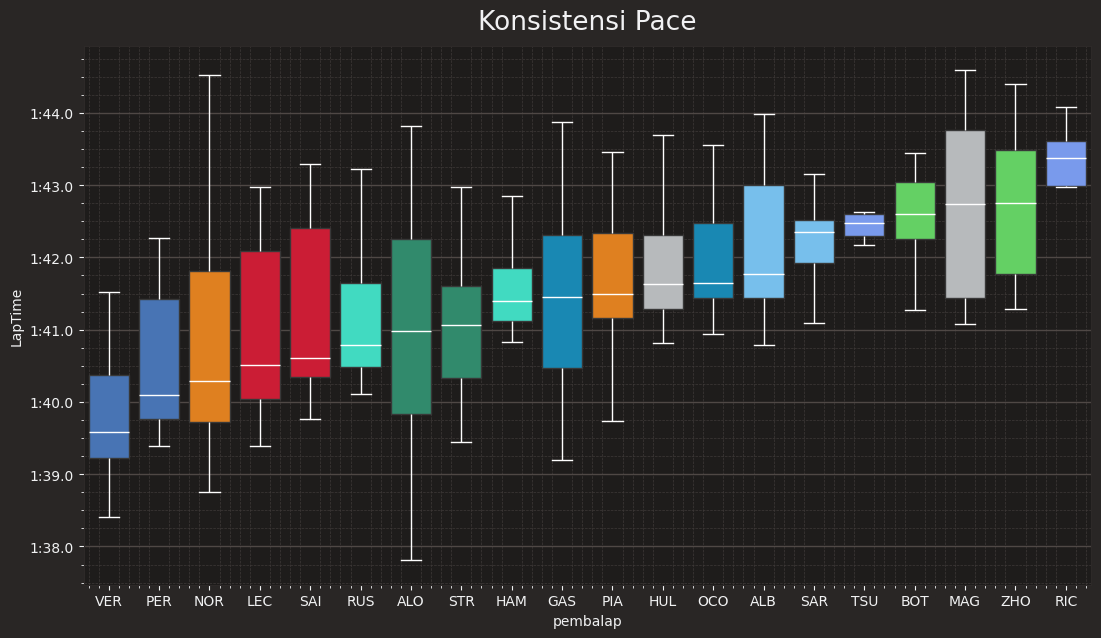

In [8]:
from scipy.interpolate import make_interp_spline
teamsColor={row['Team']:'#'+china2024_r.get_driver(row['Driver']).TeamColor for i,row in pd.DataFrame(china2024_r.laps[['Team','Driver']]).iterrows()} 
fig,axs=plt.subplots(figsize=(13,7))
df=china2024_r.laps.pick_wo_box().pick_track_status('1').pick_compounds(['HARD','MEDIUM'])
sns.boxplot(data=df[df['LapNumber']!='RIC'],x='Driver',y='LapTime',hue='Team',legend=False,palette=teamsColor,ax=axs,showfliers=False,order=df[['Driver','LapTime']].groupby('Driver').median().sort_values('LapTime').index)
lines=axs.lines
for i in lines:
    i.set_color('w')
axs.set_title('Konsistensi Pace')
axs.set_xlabel('pembalap')
axs.invert_yaxis()

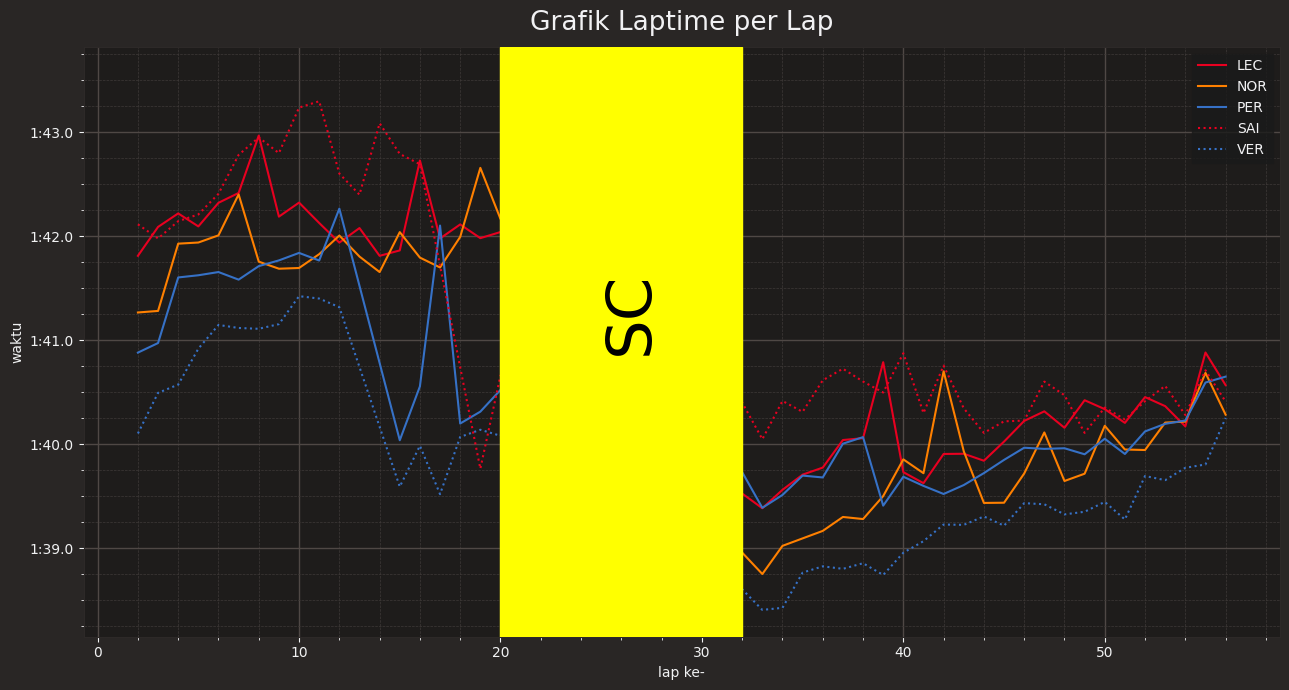

In [9]:
laps_corrected_lim=laps_corrected[(laps_corrected['LapTime']<datetime.timedelta(minutes=1,seconds=45))&(laps_corrected['LapNumber']>1)]
fig,axs=plt.subplots(figsize=(13,7))
cacheTeam=[]
for index,group in laps_corrected_lim[laps_corrected_lim['Driver'].isin(['NOR','VER','PER','SAI','LEC'])][['LapTime','LapNumber','Driver','DriverNumber','Team']].groupby(['Driver','DriverNumber','Team']):
    if index[2] in cacheTeam:
        linestyleVar=':'
    else:
        linestyleVar='-'
        cacheTeam.append(index[2])
    
    #X_Y_Spline = make_interp_spline(group['LapNumber'], group['LapTime'])
    #X_ = np.linspace(group['LapNumber'].min(), group['LapNumber'].max(), 500)
    #Y_ = X_Y_Spline(X_)
    axs.plot(group['LapNumber'], group['LapTime'],color='#'+china2024_r.get_driver(index[1]).TeamColor,linestyle=linestyleVar,label=index[0])
#sns.lineplot(data=laps_corrected_lim[laps_corrected_lim['LapNumber']>3],y='LapTime',x='LapNumber',hue='Driver',ax=axs[1],palette=teamsColor)
#axs[1].set_ylim(0.00107,0.00116)
#fig.suptitle('Konsistensi Pace')
axs.axvspan(20, 32, color='yellow',zorder=3)
ymin,ymax=axs.get_ylim()
axs.text(((30-20)/2)+20,((ymax-ymin)/2)+ymin,'SC',c='black',rotation=90,horizontalalignment='left',fontsize=45)
axs.set_title('Grafik Laptime per Lap')
axs.set_ylabel('waktu')

axs.set_ylabel('waktu')
axs.set_xlabel('lap ke-')

axs.legend()
fig.tight_layout()

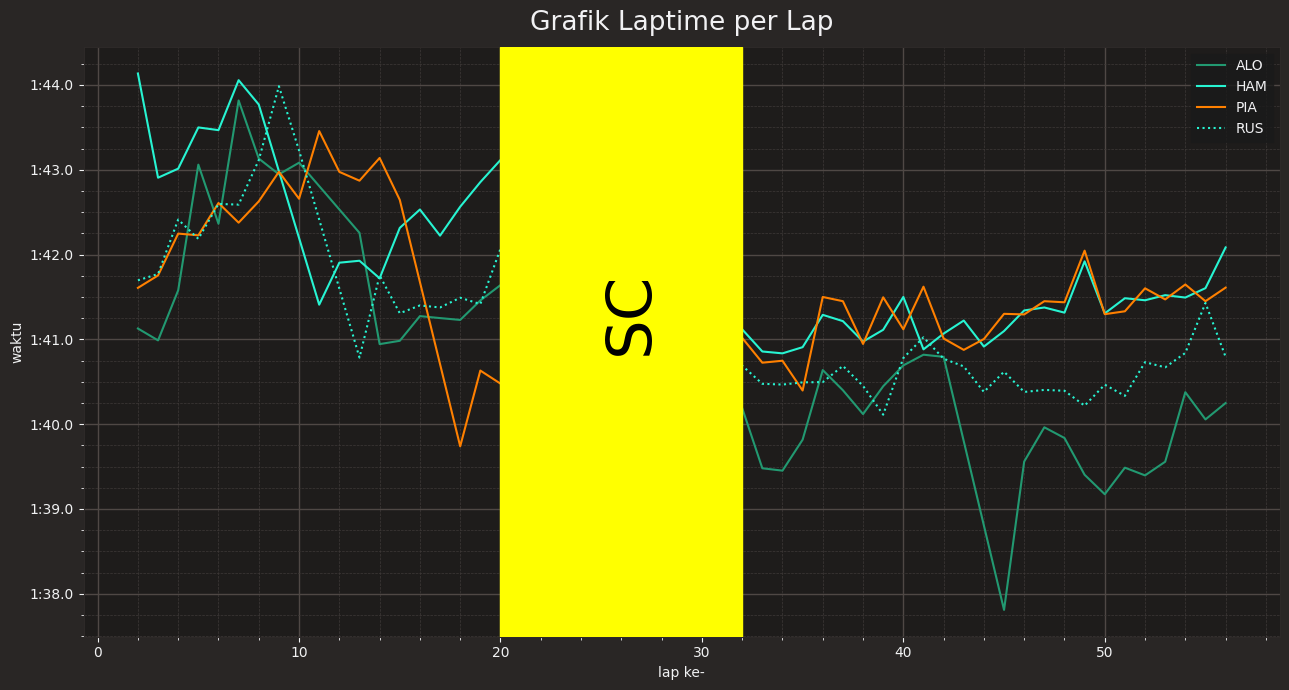

In [14]:
laps_corrected_lim=laps_corrected[(laps_corrected['LapTime']<datetime.timedelta(minutes=1,seconds=45))&(laps_corrected['LapNumber']>1)]
fig,axs=plt.subplots(figsize=(13,7))
cacheTeam=[]
for index,group in laps_corrected_lim[laps_corrected_lim['Driver'].isin(['PIA','RUS','ALO','HAM'])][['LapTime','LapNumber','Driver','DriverNumber','Team']].groupby(['Driver','DriverNumber','Team']):
    if index[2] in cacheTeam:
        linestyleVar=':'
    else:
        linestyleVar='-'
        cacheTeam.append(index[2])
    
    #X_Y_Spline = make_interp_spline(group['LapNumber'], group['LapTime'])
    #X_ = np.linspace(group['LapNumber'].min(), group['LapNumber'].max(), 500)
    #Y_ = X_Y_Spline(X_)
    axs.plot(group['LapNumber'], group['LapTime'],color='#'+china2024_r.get_driver(index[1]).TeamColor,linestyle=linestyleVar,label=index[0])
#sns.lineplot(data=laps_corrected_lim[laps_corrected_lim['LapNumber']>3],y='LapTime',x='LapNumber',hue='Driver',ax=axs[1],palette=teamsColor)
#axs[1].set_ylim(0.00107,0.00116)
#fig.suptitle('Konsistensi Pace')
axs.axvspan(20, 32, color='yellow',zorder=3)
ymin,ymax=axs.get_ylim()
axs.text(((30-20)/2)+20,((ymax-ymin)/2)+ymin,'SC',c='black',rotation=90,horizontalalignment='left',fontsize=45)
axs.set_title('Grafik Laptime per Lap')
axs.set_ylabel('waktu')

axs.set_ylabel('waktu')
axs.set_xlabel('lap ke-')

axs.legend()
fig.tight_layout()

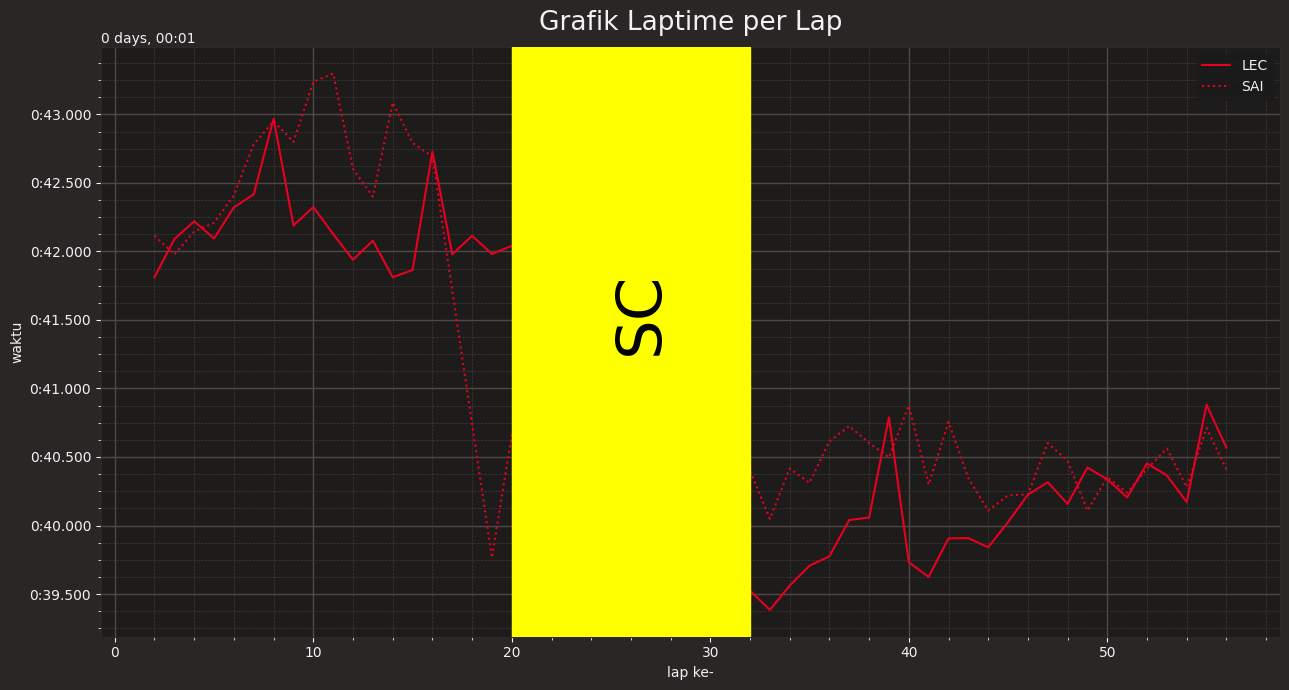

In [11]:
laps_corrected_lim=laps_corrected[(laps_corrected['LapTime']<datetime.timedelta(minutes=1,seconds=45))&(laps_corrected['LapNumber']>1)]
fig,axs=plt.subplots(figsize=(13,7))
cacheTeam=[]
for index,group in laps_corrected_lim[laps_corrected_lim['Driver'].isin(['LEC','SAI'])][['LapTime','LapNumber','Driver','DriverNumber','Team']].groupby(['Driver','DriverNumber','Team']):
    if index[2] in cacheTeam:
        linestyleVar=':'
    else:
        linestyleVar='-'
        cacheTeam.append(index[2])
    
    #X_Y_Spline = make_interp_spline(group['LapNumber'], group['LapTime'])
    #X_ = np.linspace(group['LapNumber'].min(), group['LapNumber'].max(), 500)
    #Y_ = X_Y_Spline(X_)
    axs.plot(group['LapNumber'], group['LapTime'],color='#'+china2024_r.get_driver(index[1]).TeamColor,linestyle=linestyleVar,label=index[0])
#sns.lineplot(data=laps_corrected_lim[laps_corrected_lim['LapNumber']>3],y='LapTime',x='LapNumber',hue='Driver',ax=axs[1],palette=teamsColor)
#axs[1].set_ylim(0.00107,0.00116)
#fig.suptitle('Konsistensi Pace')
axs.axvspan(20, 32, color='yellow',zorder=3)
ymin,ymax=axs.get_ylim()
axs.text(((30-20)/2)+20,((ymax-ymin)/2)+ymin,'SC',c='black',rotation=90,horizontalalignment='left',fontsize=45)
axs.set_title('Grafik Laptime per Lap')
axs.set_ylabel('waktu')

axs.set_ylabel('waktu')
axs.set_xlabel('lap ke-')

axs.legend()
fig.tight_layout()

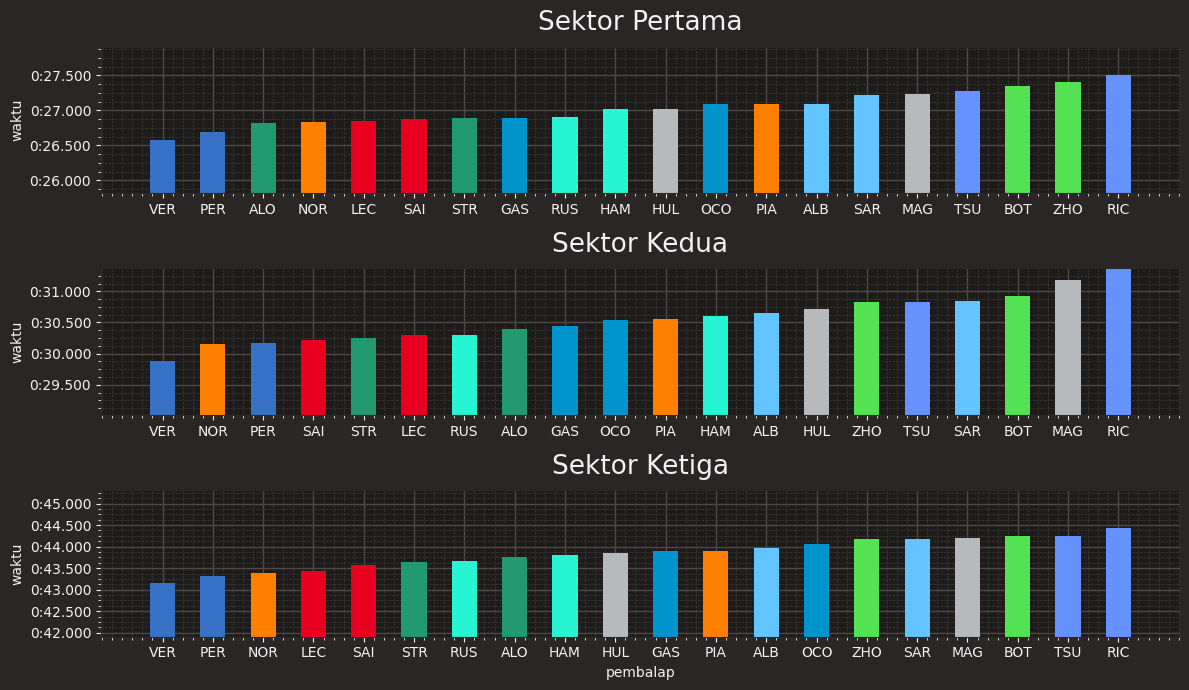

In [12]:
fig,axs=plt.subplots(3,1,figsize=(12,7))
dfSectors=china2024_r.laps.pick_accurate().pick_wo_box().pick_track_status('1').pick_compounds(['HARD','MEDIUM'])[['Driver','Sector1Time','Sector2Time','Sector3Time','Team']].groupby(['Driver','Team']).median().reset_index()
dfSectors['teamColors']=dfSectors['Driver'].apply(lambda x: '#'+china2024_r.get_driver(x).TeamColor)
dfSectors.sort_values('Sector1Time',inplace=True)
for i,row in dfSectors.iterrows():
    if row['Team'] in ['Ferrari','McLaren']:
        alphaVar=1
    else:
        alphaVar=0.1
    axs[0].bar(x=row['Driver'],height=row['Sector1Time'],width=0.5,color=row['teamColors'])#,alpha=alphaVar)
    #bottom+=row['BestS1'].to_numpy()
    y1,y2=axs[0].get_ylim()
    y1=y2*0.925
    #y2=y2*0.955
    axs[0].set_ylim(y1,y2)
dfSectors.sort_values('Sector2Time',inplace=True)
for i,row in dfSectors.iterrows():
    if row['Team'] in ['Ferrari','McLaren']:
        alphaVar=1
    else:
        alphaVar=0.1
    axs[1].bar(x=row['Driver'],height=row['Sector2Time'],width=0.5,color=row['teamColors'])#,alpha=alphaVar)
    #bottom+=row['BestS1'].to_numpy()
    y1,y2=axs[1].get_ylim()
    y1=y2*0.925
    #y2=y2*0.955
    axs[1].set_ylim(y1,y2)
dfSectors.sort_values('Sector3Time',inplace=True)
for i,row in dfSectors.iterrows():
    if row['Team'] in ['Ferrari','McLaren']:
        alphaVar=1
    else:
        alphaVar=0.1
    axs[2].bar(x=row['Driver'],height=row['Sector3Time'],width=0.5,color=row['teamColors'])#,alpha=alphaVar)
    #bottom+=row['BestS1'].to_numpy()
    y1,y2=axs[2].get_ylim()
    y1=y2*0.925
    #y2=y2*0.955
    axs[2].set_ylim(y1,y2)
axs[1].set_ylabel('waktu')
axs[0].set_ylabel('waktu')
axs[2].set_ylabel('waktu')
axs[0].set_title('Sektor Pertama')
axs[1].set_title('Sektor Kedua')
axs[2].set_title('Sektor Ketiga')
axs[2].set_xlabel('pembalap')
fig.tight_layout()

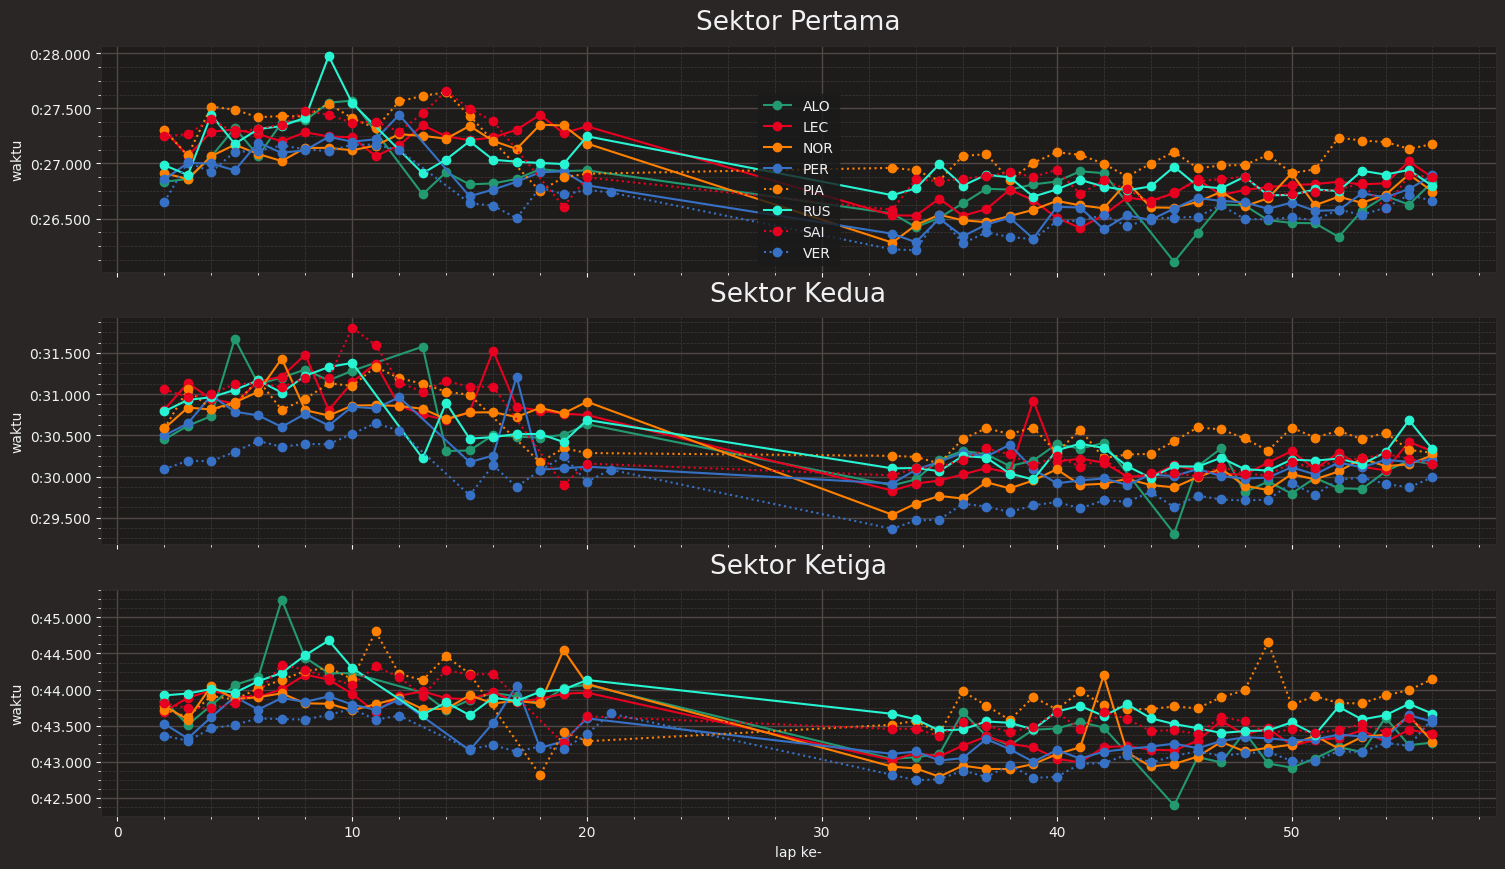

In [13]:
ranks=pd.DataFrame()
for Lap,group in pd.DataFrame(china2024_r.laps.pick_accurate().pick_wo_box()[['Driver','LapNumber','Sector1Time','Sector2Time','Sector3Time','Team']]).groupby('LapNumber'):
    group['LapNumber']=Lap
    group.set_index(['LapNumber','Driver','Team'],inplace=True)
    ranks=pd.concat([ranks,group.rank(method='dense')])
ranks=ranks.reset_index()

fig,axs=plt.subplots(3,1,figsize=(18,10),sharex=True)
teamCache=[]
for i,group in china2024_r.laps.pick_accurate().pick_wo_box()[['Driver','LapNumber','Sector1Time','Sector2Time','Sector3Time','Team']].groupby(['Driver','Team']):
    if i[0] not in ['VER','PER','SAI','LEC','PIA','NOR','ALO','RUS']:
        continue
    if i[1] in teamCache:
        linestyleVar=':'
    else:
        linestyleVar='-'
        teamCache.append(i[1])
    axs[0].plot(group['LapNumber'],group['Sector1Time'],marker='o',linestyle=linestyleVar,color='#'+china2024_r.get_driver(i[0]).TeamColor,label=i[0])
    
teamCache=[]
for i,group in china2024_r.laps.pick_accurate().pick_wo_box()[['Driver','LapNumber','Sector1Time','Sector2Time','Sector3Time','Team']].groupby(['Driver','Team']):
    if i[0] not in ['VER','PER','SAI','LEC','PIA','NOR','ALO','RUS']:
        continue
    if i[1] in teamCache:
        linestyleVar=':'
    else:
        linestyleVar='-'
        teamCache.append(i[1])
    axs[1].plot(group['LapNumber'],group['Sector2Time'],marker='o',linestyle=linestyleVar,color='#'+china2024_r.get_driver(i[0]).TeamColor,label=i[0])
    
teamCache=[]
for i,group in china2024_r.laps.pick_accurate().pick_wo_box()[['Driver','LapNumber','Sector1Time','Sector2Time','Sector3Time','Team']].groupby(['Driver','Team']):
    if i[0] not in ['VER','PER','SAI','LEC','PIA','NOR','ALO','RUS']:
        continue
    if i[1] in teamCache:
        linestyleVar=':'
    else:
        linestyleVar='-'
        teamCache.append(i[1])
    axs[2].plot(group['LapNumber'],group['Sector3Time'],marker='o',linestyle=linestyleVar,color='#'+china2024_r.get_driver(i[0]).TeamColor,label=i[0])
axs[1].set_ylabel('waktu')
axs[0].set_ylabel('waktu')
axs[2].set_ylabel('waktu')
axs[0].set_title('Sektor Pertama')
axs[1].set_title('Sektor Kedua')
axs[2].set_title('Sektor Ketiga')
axs[2].set_xlabel('lap ke-')
axs[0].legend()

In [12]:
#PoC geopandas untuk custom made segment
test=china2024_r.laps.pick_fastest().get_telemetry()[['Time','Speed','X','Y']]
test['geometry']=gpd.points_from_xy(test.X, test.Y, crs="EPSG:4326")
test=gpd.GeoDataFrame(test)
test.set_geometry('geometry',inplace=True)
test2=gpd.sjoin(test,gpd.read_file(r'../../data/raw/shanghai_poi.geojson')[['AUTO','geometry']],how='left')
test2

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


Time  Speed           X            Y  \
2          0 days 00:00:00    269  129.123066 -1476.987807   
3   0 days 00:00:00.278000    271   18.043641 -1505.600791   
4   0 days 00:00:00.308000    271   -7.000000 -1512.000000   
5   0 days 00:00:00.528000    271 -231.000000 -1569.000000   
6   0 days 00:00:00.558000    272 -254.075765 -1574.800690   
..                     ...    ...         ...          ...   
753 0 days 00:01:37.559000    262  359.811186 -1422.538703   
754 0 days 00:01:37.608000    263  323.000000 -1431.000000   
755 0 days 00:01:37.759000    265  220.571000 -1454.596285   
756 0 days 00:01:37.787000    266  202.000000 -1459.000000   
757 0 days 00:01:37.810000    267  186.680084 -1462.675214   

                           geometry  index_right  AUTO  
2     POINT (129.12307 -1476.98781)           12     1  
3      POINT (18.04364 -1505.60079)           12     1  
4      POINT (-7.00000 -1512.00000)           12     1  
5    POINT (-231.00000 -1569.00000)           12     1  
6    POINT (-254.07576 -1574.80069)           12     1  
..                              ...          ...   ...  
753   POINT (359.81119 -1422.53870)           12     1  
754   POINT (323.00000 -1431.00000)           12     1  
755   POINT (220.57100 -1454.59629)           12     1  
756   POINT (202.00000 -1459.00000)           12     1  
757   POINT (186.68008 -1462.67521)           12     1  

[756 rows x 7 columns]

In [127]:
#SPEED DOMINANCE
chinagp_telem=pd.DataFrame()
for drv in china2024_r.drivers:
    try:
        tmp_df=pd.DataFrame(china2024_r.laps.pick_driver(drv).pick_fastest().get_telemetry())
    except:
        continue
    tmp_df['drvNum']=float(china2024_r.get_driver(drv).DriverNumber)
    tmp_df['tc']='#'+china2024_r.get_driver(drv).TeamColor
    tmp_df['drv']=china2024_r.get_driver(drv).Abbreviation
    chinagp_telem=pd.concat([chinagp_telem,tmp_df])
chinagp_telem=all_race
#alorus_telem=alorus_telem.query("DRS in [0,1,2,3,8]")
chinagp_telem['geometry']=gpd.points_from_xy(chinagp_telem.X, chinagp_telem.Y, crs="EPSG:4326")
chinagp_telem=gpd.GeoDataFrame(chinagp_telem)
chinagp_telem.set_geometry('geometry',inplace=True)
chinagp_telem=gpd.sjoin_nearest(chinagp_telem,gpd.read_file(r'../../data/raw/shanghai_poi.geojson')[['AUTO','geometry']],how='left').rename(columns={'AUTO':'miniSect'})
#chinagp_telem.loc[:,'miniSect']=np.round(chinagp_telem['RelativeDistance'].to_numpy()/(1/20))+1

chinagp_speed=chinagp_telem[['Speed','miniSect','drvName','teamColor']]

dfSpeed=chinagp_speed.sort_values('Speed').drop_duplicates(subset='miniSect', keep='last').sort_values('miniSect').reset_index(drop=True)
listProp=dfSpeed[['drvName','teamColor']].value_counts(['drvName','teamColor'],normalize=True).reset_index()

single_lap = pd.DataFrame(china2024_r.laps.pick_driver('PER').pick_fastest().get_telemetry())[['X','Y','RelativeDistance']]
single_lap['geometry']=gpd.points_from_xy(single_lap.X, single_lap.Y, crs="EPSG:4326")
single_lap=gpd.GeoDataFrame(single_lap)
single_lap.set_geometry('geometry',inplace=True)
single_lap=gpd.sjoin_nearest(single_lap,gpd.read_file(r'../../data/raw/shanghai_poi.geojson')[['AUTO','geometry']],how='left').rename(columns={'AUTO':'miniSect'})
#single_lap['miniSect']=single_lap['RelativeDistance'].apply(lambda x: int(x/(1/20))+1)
single_lap=single_lap.merge(dfSpeed,on='miniSect')
single_lap=single_lap.merge(single_lap[['drvName']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'id'}),on='drvName')#id dari 0
single_lap['teamColor']=single_lap['drvName'].apply(lambda x:'#'+china2024_r.get_driver(x).TeamColor)
single_lap=single_lap.merge(single_lap[['teamColor']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'idTeam'}),on='teamColor')#id dari 0

circuit_info = china2024_r.get_circuit_info()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [128]:
dfSpeed

Speed  miniSect drvName teamColor
0     329         1     STR   #229971
1     324         2     ALO   #229971
2     213         3     NOR   #FF8000
3     288         4     STR   #229971
4     258         5     LEC   #E80020
5     261         6     STR   #229971
6     270         7     ALO   #229971
7     270         8     ALO   #229971
8     201         9     VER   #3671C6
9     279        10     ALB   #64C4FF
10    187        11     VER   #3671C6
11    263        12     RUS   #27F4D2
12    348        13     STR   #229971
13    194        14     SAI   #E80020
14    252        15     ALO   #229971
15    235        16     VER   #3671C6

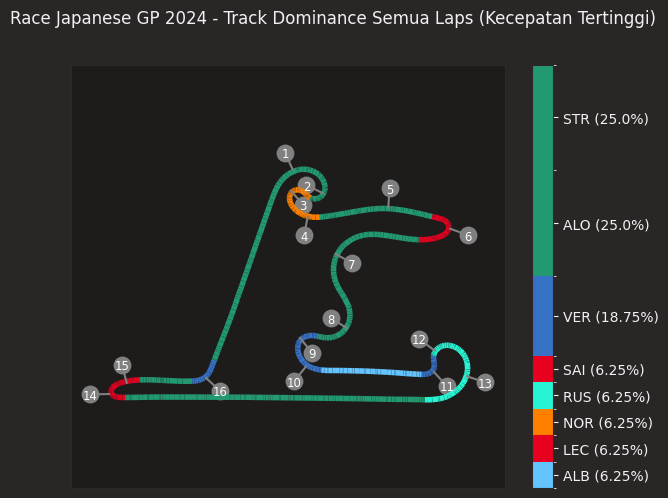

In [131]:
from matplotlib.colors import BoundaryNorm, ListedColormap
circRot=circuit_info.rotation
x,y=rotate_matrix(single_lap['X'].values,single_lap['Y'].values,circRot)


listProp.sort_values('proportion',inplace=True)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_avg=single_lap['idTeam'].to_numpy().astype(float)

#teamColor=single_lap[['id','tc']].drop_duplicates()
cmap = ListedColormap(single_lap['teamColor'].drop_duplicates().to_list())
lc_comp = LineCollection(segments, norm=plt.Normalize(0, cmap.N), cmap=cmap)
lc_comp.set_array(fastest_avg)
lc_comp.set_linewidth(4)


fig,ax=plt.subplots(figsize=(7,5.5))
    

fig.suptitle(
        f"Race Japanese GP 2024 - Track Dominance Semua Laps (Kecepatan Tertinggi)"
    )
        
ax.add_collection(lc_comp)
ax.axis('equal')
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

offset_vector = [700, 0] 
# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=math.radians(circRot))

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=math.radians(circRot))

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')
    

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
#plt.arrow(x[0],y[0]+300,+900,0,color='white',shape='right',head_width=500)
bounds=[i*10 for i in(listProp.sort_values('proportion')['proportion'].to_list())]
bounds.insert(0,0)
boundsx=[]
mem=0
for i in bounds:
    i+=mem
    mem=i
    boundsx.append(i)


cmap = ListedColormap(listProp['teamColor'].to_list())
norm = BoundaryNorm(boundsx, cmap.N)

cbar=fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ax=ax,spacing='proportional')
initial=0
ticksList=[]
for i in listProp['proportion']:
    if i!=0:
        ticksList.append((((i*10)/2)+initial))
        initial+=i*10

cbar.set_ticks(ticksList)
#listProp['bounds']=boundsx
labels=[]
for j,k in listProp.iterrows():
    label=f'{k["drvName"]} ({round(k["proportion"]*100,2)}%)'
    labels.append(label)

cbar.set_ticklabels(labels)#ambil driver name dari variabel!!!
plt.xticks([])
plt.yticks([])
plt.show()

In [74]:
drvLaps=china2024_r.laps[['DriverNumber','LapNumber']].groupby('DriverNumber').max()
all_race=pd.DataFrame()
for drv in china2024_r.drivers:
    laps=china2024_r.laps.pick_driver(drv).pick_compounds(['HARD','MEDIUM'])
    
    for i in range(1,int(drvLaps[drvLaps.index==drv]['LapNumber'].iloc[0])):
        try:
            df_temp=pd.DataFrame(laps.pick_lap(i).pick_accurate().pick_wo_box().get_telemetry())
            df_temp['drvName']=china2024_r.get_driver(drv).Abbreviation
            df_temp['teamName']=china2024_r.get_driver(drv).TeamName
            df_temp['teamColor']='#'+china2024_r.get_driver(drv).TeamColor
            df_temp['LapNumber']=i
            all_race=pd.concat([all_race,df_temp])
        except:
            continue

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [75]:
poi=gpd.read_file(r'../../data/raw/shanghai_poi.geojson')

all_race_geom=all_race.copy()
all_race_geom['geometry']=gpd.points_from_xy(all_race_geom.X, all_race_geom.Y, crs='epsg:4326')

all_race_geom=gpd.GeoDataFrame(all_race_geom)

all_race_geom.set_geometry('geometry',inplace=True)

all_race_geom=gpd.sjoin_nearest(all_race_geom,poi[['AUTO','geometry']],how='inner',distance_col='distance').rename(columns={'AUTO':'miniSect'})
def grSectOne(x):
    if x>timedelta(minutes=1):
        return 'b'
    else:
        return 'a'
all_race_geom['group']=all_race_geom['Time'].apply(lambda x: grSectOne(x))
data=[]

for i,group in all_race_geom[['miniSect','drvName','Time','LapNumber','group','teamColor']].groupby(['drvName','LapNumber','miniSect','teamColor']):
    #print(i)
    if i[2]==1:
        time=group.groupby(['drvName','miniSect','LapNumber','teamColor','group']).agg(getDuration).sum().iloc[0]
        
    else:
        time=getDuration(group['Time'])
        

    data.append(i+(time,))
first_set=pd.DataFrame(data,columns=['drvName','LapNumber','miniSect','teamColor','Time'])
#all_race['miniSect']=(np.round(all_race['RelativeDistance'].to_numpy()/(1/20))+1).astype(int)

theoretical_best_minisectors=first_set[['drvName','Time','miniSect','teamColor']].groupby(['drvName','miniSect','teamColor']).min().reset_index()
sum_tbest_minisectors=theoretical_best_minisectors.groupby('drvName').agg(IdealmSTime=('Time','sum'))
dfTime=theoretical_best_minisectors.sort_values('Time',ascending=False).drop_duplicates(subset='miniSect', keep='last').sort_values('miniSect').reset_index(drop=True)

listProp=dfTime[['drvName','teamColor']].value_counts(['drvName','teamColor'],normalize=True).reset_index()

single_lap = pd.DataFrame(china2024_r.laps.pick_driver('PER').pick_fastest().get_telemetry())[['X','Y','RelativeDistance']]

single_lap['geometry']=gpd.points_from_xy(single_lap.X, single_lap.Y, crs='epsg:4326')
single_lap=gpd.GeoDataFrame(single_lap)
single_lap.set_geometry('geometry',inplace=True)

single_lap=gpd.sjoin_nearest(single_lap,poi[['AUTO','geometry']],how='inner',distance_col='distance',max_distance=3).rename(columns={'AUTO':'miniSect'})
#single_lap['miniSect']=single_lap['RelativeDistance'].apply(lambda x: int(x/(1/20))+1)
single_lap=single_lap.merge(dfTime,on='miniSect')
single_lap=single_lap.merge(single_lap[['drvName']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'id'}),on='drvName')#id dari 0
single_lap['tc']=single_lap['drvName'].apply(lambda x:'#'+china2024_r.get_driver(x).TeamColor)
single_lap=single_lap.merge(single_lap[['tc']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'idTeam'}),on='tc')#id dari 0

f:\f1analytics\.venv\lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(
f:\f1analytics\.venv\lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


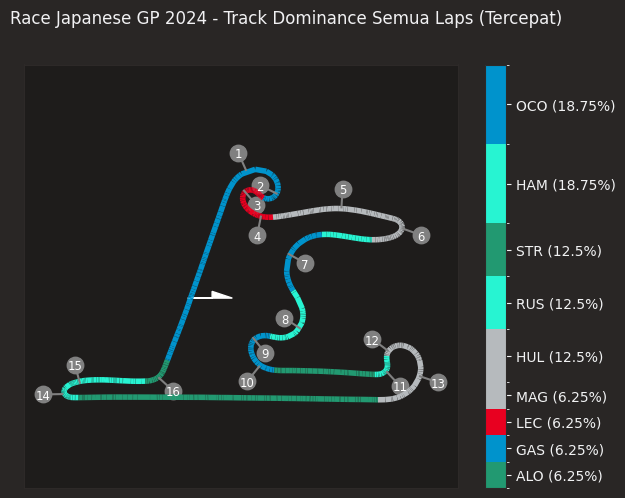

In [76]:
from matplotlib.colors import BoundaryNorm, ListedColormap
circuit_info=china2024_r.get_circuit_info()
circRot=circuit_info.rotation
x,y=rotate_matrix(single_lap['X'].values,single_lap['Y'].values,circRot)


listProp.sort_values('proportion',inplace=True)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_avg=single_lap['idTeam'].to_numpy().astype(float)

#teamColor=single_lap[['id','tc']].drop_duplicates()
cmap = ListedColormap(single_lap['teamColor'].drop_duplicates().to_list())
lc_comp = LineCollection(segments, norm=plt.Normalize(0, cmap.N), cmap=cmap)
lc_comp.set_array(fastest_avg)
lc_comp.set_linewidth(4)


fig,ax=plt.subplots(figsize=(7,5.5))
    

fig.suptitle(
        f"Race Japanese GP 2024 - Track Dominance Semua Laps (Tercepat)"
    )
        
ax.add_collection(lc_comp)
ax.axis('equal')
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

offset_vector = [700, 0] 
# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=math.radians(circRot))

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=math.radians(circRot))

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')
    

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
plt.arrow(x[0],y[0]+300,+900,0,color='white',shape='right',head_width=500)
bounds=[i*10 for i in(listProp.sort_values('proportion')['proportion'].to_list())]
bounds.insert(0,0)
boundsx=[]
mem=0
for i in bounds:
    i+=mem
    mem=i
    boundsx.append(i)


cmap = ListedColormap(listProp['teamColor'].to_list())
norm = BoundaryNorm(boundsx, cmap.N)

cbar=fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ax=ax,spacing='proportional')
initial=0
ticksList=[]
for i in listProp['proportion']:
    if i!=0:
        ticksList.append((((i*10)/2)+initial))
        initial+=i*10

cbar.set_ticks(ticksList)
#listProp['bounds']=boundsx
labels=[]
for j,k in listProp.iterrows():
    label=f'{k["drvName"]} ({round(k["proportion"]*100,2)}%)'
    labels.append(label)

cbar.set_ticklabels(labels)#ambil driver name dari variabel!!!
plt.xticks([])
plt.yticks([])
plt.show()

<Axes: >

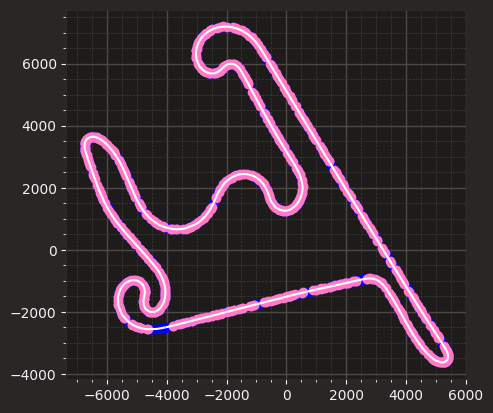

In [77]:
ax=poi.plot(color='white')
all_race_geom[(all_race_geom['drvName']=='VER')&(all_race_geom['LapNumber']==47)].plot(ax=ax,color='b')
all_race_geom[(all_race_geom['drvName']=='GAS')&(all_race_geom['LapNumber']==47)].plot(ax=ax)

In [78]:
#PROBLEM: tiap minisector memiliki sampling rate yang berbeda, buat model weighting/penambahan penalti ke getDuration apabila titik sampling lebih sedikit dari sampling tertinggi per minisektor 
test=pd.DataFrame(all_race_geom[['drvName','miniSect','LapNumber']].value_counts()).reset_index()
test.groupby(['drvName','miniSect']).max().reset_index().sort_values('count').drop_duplicates('miniSect',keep='last')

drvName  miniSect  LapNumber  count
287     TSU        16         20     26
53      GAS         6         55     28
14      ALB        15         55     30
202     RIC        11         20     33
86      HUL         7         55     38
311     ZHO         8         39     48
249     SAR        10         55     52
163     PER         4         55     53
264     STR         9         55     54
180     PIA         5         55     59
29      ALO        14         55     61
305     ZHO         2         39     73
306     ZHO         3         39     74
48      GAS         1         55     79
123     MAG        12         55     81
300     VER        13         55    117

In [79]:
#TODO: speed gained on DRS
drsSpeed=all_race[['drvName','teamName','teamColor','DRS','Speed','DistanceToDriverAhead','Throttle','Brake']]

no_drs=drsSpeed[(drsSpeed['DRS'].isin([0,1,8]))&(drsSpeed['Throttle']>98)&(drsSpeed['Brake']==0)]
no_drs_slipstream=no_drs[no_drs['DistanceToDriverAhead']<5]
no_drs_no_slipstream=no_drs[no_drs['DistanceToDriverAhead']>5]

with_drs=drsSpeed[~drsSpeed['DRS'].isin([0,1,2,3,8])]
drs_slipstream=with_drs[with_drs['DistanceToDriverAhead']<5]
drs_no_slipstream=with_drs[with_drs['DistanceToDriverAhead']>5]
no_drs.drop([646,653,644,643,642,666,641,651,630,637,636],inplace=True)

C:\Users\haryo\AppData\Local\Temp\ipykernel_48796\813827883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_drs.drop([646,653,644,643,642,666,641,651,630,637,636],inplace=True)


In [80]:
maxspeed_no_drs=no_drs[['drvName','teamName','teamColor','Speed']].groupby(['drvName','teamName','teamColor']).max()
maxspeed_drs=with_drs[['drvName','teamName','teamColor','Speed']].groupby(['drvName','teamName','teamColor']).max()


In [119]:
result=maxspeed_drs-maxspeed_no_drs
result.rename(columns=({'Speed':'SpeedGain'}),inplace=True)
result['SpeedGainStr']='+'+result['SpeedGain'].astype(str)
maxspeed_drs.merge(result,on='drvName')

Speed  SpeedGain SpeedGainStr
drvName                               
ALB        338         18          +18
ALO        336         23          +23
BOT        342         13          +13
GAS        339         28          +28
HAM        337         21          +21
HUL        340         21          +21
LEC        336         10          +10
MAG        346         27          +27
NOR        332         18          +18
OCO        330         19          +19
PER        335         21          +21
PIA        330         16          +16
RIC        340         19          +19
RUS        337         22          +22
SAI        334         16          +16
SAR        330         12          +12
STR        348         18          +18
TSU        330         15          +15
VER        332         16          +16
ZHO        340         16          +16

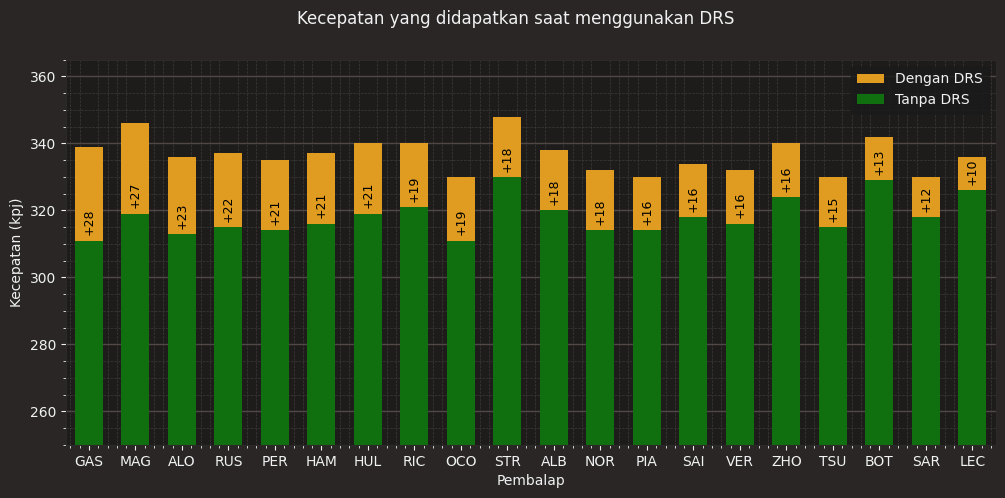

In [123]:
teamsColor={row['teamName']:row['teamColor'] for i,row in drsSpeed[['teamName','teamColor']].drop_duplicates().iterrows()} 
maxspeed_no_drs.sort_values('Speed',inplace=True,ascending=False)
fig,ax=plt.subplots(figsize=(12,5))

sns.barplot(data=maxspeed_drs,x='drvName',y='Speed',color='orange',ax=ax,label='Dengan DRS',order=result.sort_values('SpeedGain',ascending=False).reset_index()['drvName'],width=0.6)


sns.barplot(data=maxspeed_no_drs,x='drvName',y='Speed',ax=ax,color='green', label='Tanpa DRS',order=result.sort_values('SpeedGain',ascending=False).reset_index()['drvName'],width=0.6)
ax.bar_label(ax.containers[1], labels=result.sort_values('SpeedGain',ascending=False)['SpeedGainStr'],fontsize=9,rotation=90,padding=4,color='black')
ax.set_xlabel('Pembalap')
ax.set_ylabel('Kecepatan (kpj)')

ax.set_ylim(250,365)
fig.suptitle('Kecepatan yang didapatkan saat menggunakan DRS')
plt.show()

In [93]:
result.sort_values('SpeedGain',ascending=False).reset_index()['drvName']

0     GAS
1     MAG
2     ALO
3     RUS
4     PER
5     HAM
6     HUL
7     RIC
8     OCO
9     STR
10    ALB
11    NOR
12    PIA
13    SAI
14    VER
15    ZHO
16    TSU
17    BOT
18    SAR
19    LEC
Name: drvName, dtype: object

C:\Users\haryo\AppData\Local\Temp\ipykernel_1964\2814752935.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pits=china2024_r.laps.pick_drivers(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']).dropna(subset='PitInTime')[china2024_r.laps['LapNumber']>1][['Driver','DriverNumber','LapNumber','Team']]


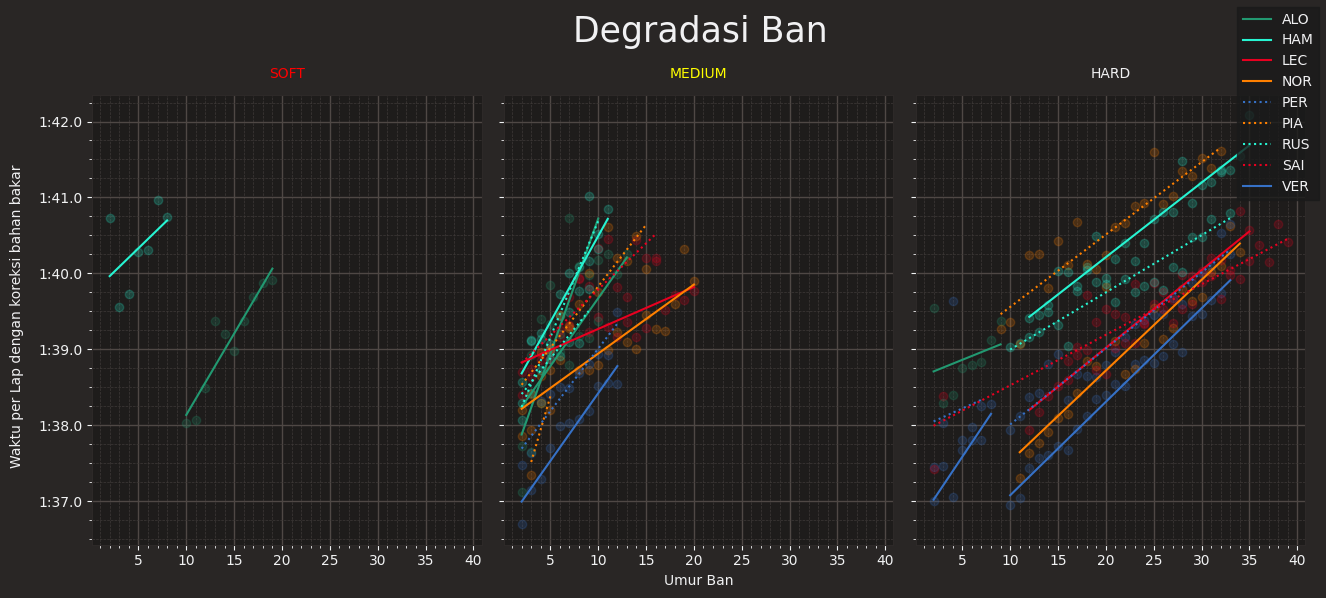

In [47]:
#TODO: preprocess TyreLife jadi 1 tiap stint pembalap

import datetime
pits=china2024_r.laps.pick_drivers(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']).dropna(subset='PitInTime')[china2024_r.laps['LapNumber']>1][['Driver','DriverNumber','LapNumber','Team']]

fig,ax=plt.subplots(1,3,sharey=True,sharex=True,figsize=(13,6))
for i,row in laps_corrected[(laps_corrected['LapNumber']>1) & (laps_corrected['IsAccurate']==True) &(laps_corrected['LapTime']<timedelta(minutes=2,seconds=0)) & (laps_corrected['Driver'].isin(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']))].iterrows():
    if row['Compound']=='SOFT':
        ax[0].scatter(row['TyreLife'],row['fuel_corrected_laptime'],color='#'+china2024_r.get_driver(row['DriverNumber']).TeamColor,alpha=0.2)
    if row['Compound']=='HARD':
        ax[2].scatter(row['TyreLife'],row['fuel_corrected_laptime'],color='#'+china2024_r.get_driver(row['DriverNumber']).TeamColor,alpha=0.2)
    if row['Compound']=='MEDIUM':
        ax[1].scatter(row['TyreLife'],row['fuel_corrected_laptime'],color='#'+china2024_r.get_driver(row['DriverNumber']).TeamColor,alpha=0.2)
ax[0].set_title('SOFT',color='red',fontsize=10)
ax[1].set_xlabel('Umur Ban')
fig.text(-.01,0.23,'Waktu per Lap dengan koreksi bahan bakar',rotation=90)
ax[1].set_title('MEDIUM',color='yellow',fontsize=10)
ax[2].set_title('HARD',fontsize=10)
dfTeamNum=pd.DataFrame(laps_corrected)[['Driver','Team','DriverNumber']].drop_duplicates().set_index('Driver').groupby('Team').rank().reset_index()
laps_corrected_plus=dfTeamNum.rename(columns={'DriverNumber':'TeamNum'}).merge(laps_corrected, on='Driver')
stintgroups=laps_corrected_plus[(laps_corrected_plus['LapNumber']>1) & (laps_corrected_plus['IsAccurate']==True) &(laps_corrected_plus['LapTime']<timedelta(minutes=2,seconds=0)) & (laps_corrected_plus['Driver'].isin(['NOR','LEC','VER','ALO','RUS','PER','SAI','PIA','HAM']))][['Stint','Compound','fuel_corrected_laptime','LapNumber','Driver','Team','TeamNum','TyreLife']].groupby(['Compound','Driver','Stint','Team','TeamNum'])
drvCache=[]
for i,group in stintgroups:
    if i[1] in drvCache:
        labelVar=''
    else:
        labelVar=i[1]
        drvCache.append(i[1])
    if i[4]==1:
        linestyleVar='-'
    else:
        linestyleVar=':'
   # xx = np.linspace(min(group['fuel_corrected_laptime']),max(group['fuel_corrected_laptime']), 100)
    y = group['fuel_corrected_laptime'].apply(lambda x: x.total_seconds())
    a, b = np.polyfit(group['TyreLife'],y, 1)

    
    if i[0]=='MEDIUM':
        ax[1].plot(group['TyreLife'], pd.Series(a*group['TyreLife']+b).apply(lambda x: datetime.timedelta(seconds=x)),color='#'+china2024_r.get_driver(i[1]).TeamColor,linestyle=linestyleVar,label=labelVar)
    if i[0]=='HARD':
        ax[2].plot(group['TyreLife'], pd.Series(a*group['TyreLife']+b).apply(lambda x: datetime.timedelta(seconds=x)),color='#'+china2024_r.get_driver(i[1]).TeamColor,linestyle=linestyleVar,label=labelVar)
    if i[0]=='SOFT':
        ax[0].plot(group['TyreLife'], pd.Series(a*group['TyreLife']+b).apply(lambda x: datetime.timedelta(seconds=x)),color='#'+china2024_r.get_driver(i[1]).TeamColor,linestyle=linestyleVar,label=labelVar)
        
fig.suptitle('     Degradasi Ban',fontsize=25)

fig.tight_layout()
fig.legend()

plt.show()